In [1]:
import json
import numpy as np
import os
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import torch

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
df = np.load('../qm9_filtered.npy', allow_pickle = True)

In [4]:
df_X_0 = []
df_y_0 = []
df_X_1 = []
df_y_1 = []

for line in df:
    num = len(line['chiral_centers'])
    if num > 1:
        continue
    elif num == 0:
        df_X_0.append(line['xyz'].flatten())
        df_y_0.append(num)
    elif num == 1:
        df_X_1.append(line['xyz'].flatten())
        df_y_1.append(num)
    
df_X_0 = np.array(df_X_0)
df_y_0 = np.array(df_y_0)
df_X_1 = np.array(df_X_1)
df_y_1 = np.array(df_y_1)

idx_0 = np.random.choice(np.arange(len(df_y_0)), 22500, replace=False)
df_X_0 = df_X_0[idx_0]
df_y_0 = df_y_0[idx_0]

idx_1 = np.random.choice(np.arange(len(df_y_1)), 22500, replace=False)
df_X_1 = df_X_1[idx_1]
df_y_1 = df_y_1[idx_1]

df_X = np.concatenate((df_X_0, df_X_1), axis=0)
df_y = np.concatenate((df_y_0, df_y_1), axis=0)

In [5]:
print(len(df_X), len(df_y))

45000 45000


In [6]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(df_X, df_y, test_size = 0.2)

X_train = torch.from_numpy(X_train_raw).type('torch.FloatTensor')
X_train = X_train.to(device)

y_train = torch.from_numpy(y_train_raw).type('torch.LongTensor')
y_train = y_train.to(device)

X_test = torch.from_numpy(X_test_raw).type('torch.FloatTensor')
X_test = X_test.to(device)

y_test = torch.from_numpy(y_test_raw).type('torch.LongTensor')
y_test = y_test.to(device)

In [7]:
import torch.nn as nn

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.hidden1 = nn.Linear(27*8,500)
        self.hidden2 = nn.Linear(500, 200)
        self.output = nn.Linear(200, 2)
        self.dropout = nn.Dropout(0.05)
        self.Tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self,x):
        x = self.hidden1(x)
        x = self.dropout(x)
        x = self.Tanh(x)
        
        x = self.hidden2(x)
        x = self.dropout(x)
        x = self.Tanh(x)

        x = self.output(x)
        x = self.softmax(x)
        return x
    
    def predict(self,x):
        y_pred = self.forward(x).cpu().detach().numpy()
        y_pred = [np.argmax(sample) for sample in y_pred]
        
        return y_pred
    

net = Net()
net.to(device)

Net(
  (hidden1): Linear(in_features=216, out_features=500, bias=True)
  (hidden2): Linear(in_features=500, out_features=200, bias=True)
  (output): Linear(in_features=200, out_features=2, bias=True)
  (dropout): Dropout(p=0.05, inplace=False)
  (Tanh): Tanh()
  (softmax): Softmax(dim=1)
)

In [7]:
net = Net()
net.to(device)
net.load_state_dict(torch.load('torch_01_dict.dict'))

<All keys matched successfully>

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.0001)
epochs = 200
losses = []
train_accuracies = []
test_accuracies = []
f1s = []

epoch: 0
train_acc: 0.4906111111111111
test_acc: 0.49344444444444446
f1: 0.45118331465303974

epoch: 1
train_acc: 0.5201111111111111
test_acc: 0.5191111111111111
f1: 0.48207560157293644

epoch: 2
train_acc: 0.5464444444444444
test_acc: 0.5448888888888889
f1: 0.5149191005373557

epoch: 3
train_acc: 0.5724444444444444
test_acc: 0.569
f1: 0.5485685662431942

epoch: 4
train_acc: 0.5891666666666666
test_acc: 0.5882222222222222
f1: 0.5744667212737816

epoch: 5
train_acc: 0.6005
test_acc: 0.598
f1: 0.5888246592567244

epoch: 6
train_acc: 0.6071388888888889
test_acc: 0.6051111111111112
f1: 0.5990273418615242

epoch: 7
train_acc: 0.61025
test_acc: 0.6075555555555555
f1: 0.6026039863302146

epoch: 8
train_acc: 0.6131388888888889
test_acc: 0.61
f1: 0.6063331235577932

epoch: 9
train_acc: 0.61425
test_acc: 0.613
f1: 0.6101046345207901

epoch: 10
train_acc: 0.6169166666666667
test_acc: 0.6138888888888889
f1: 0.6111629920051358

epoch: 11
train_acc: 0.617
test_acc: 0.6151111111111112
f1: 0.612832181

epoch: 91
train_acc: 0.7035555555555556
test_acc: 0.6917777777777778
f1: 0.6910396305459343

epoch: 92
train_acc: 0.7041666666666667
test_acc: 0.6922222222222222
f1: 0.6915381205568498

epoch: 93
train_acc: 0.7039166666666666
test_acc: 0.6963333333333334
f1: 0.6956743064327198

epoch: 94
train_acc: 0.7044722222222223
test_acc: 0.6946666666666667
f1: 0.6938669873650765

epoch: 95
train_acc: 0.7065555555555556
test_acc: 0.6948888888888889
f1: 0.6941977670037343

epoch: 96
train_acc: 0.7051666666666667
test_acc: 0.6971111111111111
f1: 0.6964880777791584

epoch: 97
train_acc: 0.7059722222222222
test_acc: 0.6944444444444444
f1: 0.6937059711080857

epoch: 98
train_acc: 0.7063055555555555
test_acc: 0.6966666666666667
f1: 0.6960178238996498

epoch: 99
train_acc: 0.7091388888888889
test_acc: 0.7004444444444444
f1: 0.699797461388556

epoch: 100
train_acc: 0.7082777777777778
test_acc: 0.6962222222222222
f1: 0.6955973604725676

epoch: 101
train_acc: 0.7094444444444444
test_acc: 0.6971111111111111


epoch: 182
train_acc: 0.7394166666666667
test_acc: 0.7308888888888889
f1: 0.7306340983769769

epoch: 183
train_acc: 0.74
test_acc: 0.7288888888888889
f1: 0.7286542465551076

epoch: 184
train_acc: 0.74075
test_acc: 0.726
f1: 0.7257133539361525

epoch: 185
train_acc: 0.7413611111111111
test_acc: 0.7306666666666667
f1: 0.7304476266791395

epoch: 186
train_acc: 0.7409166666666667
test_acc: 0.7285555555555555
f1: 0.7283151984195924

epoch: 187
train_acc: 0.7415833333333334
test_acc: 0.7265555555555555
f1: 0.726331411071684

epoch: 188
train_acc: 0.7416666666666667
test_acc: 0.728
f1: 0.7277752810321231

epoch: 189
train_acc: 0.7425277777777778
test_acc: 0.7315555555555555
f1: 0.7313232211791558

epoch: 190
train_acc: 0.7413611111111111
test_acc: 0.7273333333333334
f1: 0.7270637270376903

epoch: 191
train_acc: 0.7411944444444445
test_acc: 0.7313333333333333
f1: 0.731097232772203

epoch: 192
train_acc: 0.7420833333333333
test_acc: 0.7287777777777777
f1: 0.7285191071924518

epoch: 193
train_ac

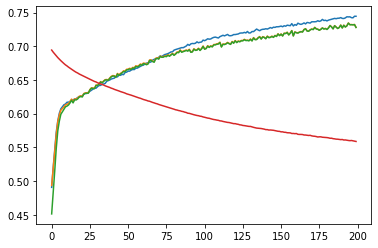

epoch: 0
train_acc: 0.7447222222222222
test_acc: 0.733
f1: 0.7328267840235552

epoch: 1
train_acc: 0.7436666666666667
test_acc: 0.7323333333333333
f1: 0.732130864843299

epoch: 2
train_acc: 0.7442777777777778
test_acc: 0.7327777777777778
f1: 0.7325116614709439

epoch: 3
train_acc: 0.7446666666666667
test_acc: 0.7302222222222222
f1: 0.7300361653558842

epoch: 4
train_acc: 0.7456666666666667
test_acc: 0.7311111111111112
f1: 0.7309562369227653

epoch: 5
train_acc: 0.7461944444444445
test_acc: 0.7363333333333333
f1: 0.7361205934151028

epoch: 6
train_acc: 0.7450555555555556
test_acc: 0.7344444444444445
f1: 0.7342517291353049

epoch: 7
train_acc: 0.7467222222222222
test_acc: 0.7318888888888889
f1: 0.7316331854385033

epoch: 8
train_acc: 0.7459722222222223
test_acc: 0.7326666666666667
f1: 0.7324978231489058

epoch: 9
train_acc: 0.7467777777777778
test_acc: 0.7326666666666667
f1: 0.7324281551778878

epoch: 10
train_acc: 0.7459166666666667
test_acc: 0.7344444444444445
f1: 0.7342943645543593

e

epoch: 91
train_acc: 0.7703611111111112
test_acc: 0.7521111111111111
f1: 0.7520556599200355

epoch: 92
train_acc: 0.7701666666666667
test_acc: 0.7526666666666667
f1: 0.7525774481068915

epoch: 93
train_acc: 0.7693611111111112
test_acc: 0.7565555555555555
f1: 0.7564886398614288

epoch: 94
train_acc: 0.7700555555555556
test_acc: 0.7481111111111111
f1: 0.7480565070741777

epoch: 95
train_acc: 0.7693611111111112
test_acc: 0.7525555555555555
f1: 0.7525069017817324

epoch: 96
train_acc: 0.7700555555555556
test_acc: 0.7532222222222222
f1: 0.7531363954446365

epoch: 97
train_acc: 0.7708888888888888
test_acc: 0.7514444444444445
f1: 0.7514160248667

epoch: 98
train_acc: 0.77
test_acc: 0.7531111111111111
f1: 0.7530835192063517

epoch: 99
train_acc: 0.7701666666666667
test_acc: 0.753
f1: 0.7529717582828226

epoch: 100
train_acc: 0.7716111111111111
test_acc: 0.7527777777777778
f1: 0.7527172000880367

epoch: 101
train_acc: 0.76925
test_acc: 0.7524444444444445
f1: 0.7523676208683415

epoch: 102
train

epoch: 182
train_acc: 0.7890833333333334
test_acc: 0.763
f1: 0.763004105100884

epoch: 183
train_acc: 0.7896944444444445
test_acc: 0.7658888888888888
f1: 0.7658710930688633

epoch: 184
train_acc: 0.7901388888888888
test_acc: 0.7633333333333333
f1: 0.76330926830097

epoch: 185
train_acc: 0.7921111111111111
test_acc: 0.7655555555555555
f1: 0.765545656680136

epoch: 186
train_acc: 0.79
test_acc: 0.7656666666666667
f1: 0.7656702397131209

epoch: 187
train_acc: 0.7921111111111111
test_acc: 0.7663333333333333
f1: 0.766337149909668

epoch: 188
train_acc: 0.7926111111111112
test_acc: 0.766
f1: 0.7659953777631692

epoch: 189
train_acc: 0.7911666666666667
test_acc: 0.7661111111111111
f1: 0.7660890352180849

epoch: 190
train_acc: 0.7918333333333333
test_acc: 0.7673333333333333
f1: 0.7673266347912499

epoch: 191
train_acc: 0.7924722222222222
test_acc: 0.7664444444444445
f1: 0.7664417340432931

epoch: 192
train_acc: 0.7913333333333333
test_acc: 0.7641111111111111
f1: 0.7640952071774247

epoch: 193


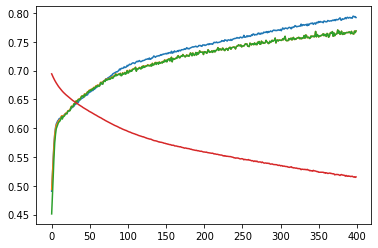

epoch: 0
train_acc: 0.7956388888888889
test_acc: 0.7663333333333333
f1: 0.766338073180834

epoch: 1
train_acc: 0.7950555555555555
test_acc: 0.7696666666666667
f1: 0.7696699055629964

epoch: 2
train_acc: 0.7955277777777777
test_acc: 0.7685555555555555
f1: 0.7685337103844516

epoch: 3
train_acc: 0.7933888888888889
test_acc: 0.7684444444444445
f1: 0.7684370346139745

epoch: 4
train_acc: 0.7929444444444445
test_acc: 0.7687777777777778
f1: 0.7687817828011906

epoch: 5
train_acc: 0.7938333333333333
test_acc: 0.7646666666666667
f1: 0.764665643983337

epoch: 6
train_acc: 0.7940833333333334
test_acc: 0.768
f1: 0.7679933206514468

epoch: 7
train_acc: 0.7967222222222222
test_acc: 0.7715555555555556
f1: 0.7715345379100315

epoch: 8
train_acc: 0.7951388888888888
test_acc: 0.7678888888888888
f1: 0.7678858943645251

epoch: 9
train_acc: 0.7952222222222223
test_acc: 0.7696666666666667
f1: 0.7696716118078588

epoch: 10
train_acc: 0.7963055555555556
test_acc: 0.7684444444444445
f1: 0.7684370346139745

ep

epoch: 91
train_acc: 0.8080833333333334
test_acc: 0.7764444444444445
f1: 0.7764482090320968

epoch: 92
train_acc: 0.8085
test_acc: 0.7814444444444445
f1: 0.7814462658672284

epoch: 93
train_acc: 0.8089166666666666
test_acc: 0.7745555555555556
f1: 0.7745526470395511

epoch: 94
train_acc: 0.8089444444444445
test_acc: 0.7724444444444445
f1: 0.7724213058593363

epoch: 95
train_acc: 0.8083333333333333
test_acc: 0.7804444444444445
f1: 0.7804164264718848

epoch: 96
train_acc: 0.8083611111111111
test_acc: 0.7801111111111111
f1: 0.78011218340911

epoch: 97
train_acc: 0.8102777777777778
test_acc: 0.7758888888888889
f1: 0.7758937447208112

epoch: 98
train_acc: 0.8080277777777778
test_acc: 0.7732222222222223
f1: 0.7732270910779118

epoch: 99
train_acc: 0.8086666666666666
test_acc: 0.7762222222222223
f1: 0.7762249296636158

epoch: 100
train_acc: 0.8095833333333333
test_acc: 0.7777777777777778
f1: 0.7777551815032581

epoch: 101
train_acc: 0.8096388888888889
test_acc: 0.7743333333333333
f1: 0.7743109

epoch: 181
train_acc: 0.8193888888888889
test_acc: 0.7842222222222223
f1: 0.7842138680782622

epoch: 182
train_acc: 0.8190833333333334
test_acc: 0.7825555555555556
f1: 0.7825570025015612

epoch: 183
train_acc: 0.8192222222222222
test_acc: 0.784
f1: 0.7840046081310756

epoch: 184
train_acc: 0.8191666666666667
test_acc: 0.783
f1: 0.7829954001193906

epoch: 185
train_acc: 0.8206111111111111
test_acc: 0.7864444444444444
f1: 0.7864205778193555

epoch: 186
train_acc: 0.8183055555555555
test_acc: 0.7806666666666666
f1: 0.7806690062263815

epoch: 187
train_acc: 0.8188055555555556
test_acc: 0.7832222222222223
f1: 0.7832224443525404

epoch: 188
train_acc: 0.8196111111111111
test_acc: 0.7802222222222223
f1: 0.7802269651654861

epoch: 189
train_acc: 0.81825
test_acc: 0.784
f1: 0.7839969279945387

epoch: 190
train_acc: 0.8201666666666667
test_acc: 0.7812222222222223
f1: 0.7812141273715907

epoch: 191
train_acc: 0.8207777777777778
test_acc: 0.7798888888888889
f1: 0.7798871578905852

epoch: 192
train

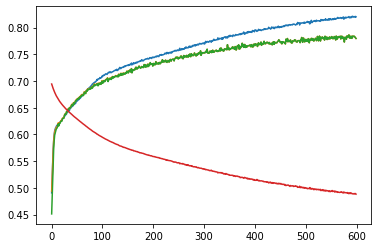

epoch: 0
train_acc: 0.8221388888888889
test_acc: 0.7775555555555556
f1: 0.7775585434607464

epoch: 1
train_acc: 0.8215
test_acc: 0.7842222222222223
f1: 0.7842222222222223

epoch: 2
train_acc: 0.8206666666666667
test_acc: 0.7854444444444444
f1: 0.7854405109149993

epoch: 3
train_acc: 0.8208055555555556
test_acc: 0.7782222222222223
f1: 0.778221751286671

epoch: 4
train_acc: 0.82125
test_acc: 0.7783333333333333
f1: 0.7783202054942291

epoch: 5
train_acc: 0.8229722222222222
test_acc: 0.787
f1: 0.7869906252591465

epoch: 6
train_acc: 0.8205555555555556
test_acc: 0.7825555555555556
f1: 0.7825196743158419

epoch: 7
train_acc: 0.8246388888888889
test_acc: 0.7847777777777778
f1: 0.7847822496774062

epoch: 8
train_acc: 0.8236944444444444
test_acc: 0.7874444444444444
f1: 0.7874417022112671

epoch: 9
train_acc: 0.8227777777777778
test_acc: 0.7827777777777778
f1: 0.782779931230926

epoch: 10
train_acc: 0.8224166666666667
test_acc: 0.7827777777777778
f1: 0.7827657713540038

epoch: 11
train_acc: 0.82

epoch: 92
train_acc: 0.8310277777777778
test_acc: 0.7854444444444444
f1: 0.7854485210366894

epoch: 93
train_acc: 0.8308611111111112
test_acc: 0.7895555555555556
f1: 0.7895598788145997

epoch: 94
train_acc: 0.828
test_acc: 0.7891111111111111
f1: 0.7891050395576849

epoch: 95
train_acc: 0.82875
test_acc: 0.7852222222222223
f1: 0.785217669447405

epoch: 96
train_acc: 0.8307777777777777
test_acc: 0.7835555555555556
f1: 0.7835464166885805

epoch: 97
train_acc: 0.8311111111111111
test_acc: 0.7873333333333333
f1: 0.7873379543491311

epoch: 98
train_acc: 0.8308611111111112
test_acc: 0.7917777777777778
f1: 0.7917793407310016

epoch: 99
train_acc: 0.8301111111111111
test_acc: 0.7865555555555556
f1: 0.7865599905992041

epoch: 100
train_acc: 0.83075
test_acc: 0.7878888888888889
f1: 0.7878787781233257

epoch: 101
train_acc: 0.8310555555555555
test_acc: 0.7845555555555556
f1: 0.7845548613456018

epoch: 102
train_acc: 0.8297777777777777
test_acc: 0.7901111111111111
f1: 0.7901155551220785

epoch: 103

epoch: 183
train_acc: 0.8359722222222222
test_acc: 0.7897777777777778
f1: 0.7897815152278372

epoch: 184
train_acc: 0.8396944444444444
test_acc: 0.7916666666666666
f1: 0.7916706251587794

epoch: 185
train_acc: 0.83875
test_acc: 0.788
f1: 0.7880046065298548

epoch: 186
train_acc: 0.8351666666666666
test_acc: 0.7928888888888889
f1: 0.7928822612862039

epoch: 187
train_acc: 0.8372777777777778
test_acc: 0.7923333333333333
f1: 0.7923201936573524

epoch: 188
train_acc: 0.8378055555555556
test_acc: 0.7948888888888889
f1: 0.7948896992045495

epoch: 189
train_acc: 0.8363055555555555
test_acc: 0.7897777777777778
f1: 0.7897818474223068

epoch: 190
train_acc: 0.8385
test_acc: 0.7888888888888889
f1: 0.7888914430788827

epoch: 191
train_acc: 0.8376111111111111
test_acc: 0.7887777777777778
f1: 0.7887733003722279

epoch: 192
train_acc: 0.8371944444444445
test_acc: 0.7894444444444444
f1: 0.7894380471530075

epoch: 193
train_acc: 0.8377777777777777
test_acc: 0.7931111111111111
f1: 0.7931064216108716

ep

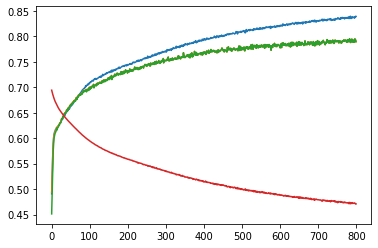

epoch: 0
train_acc: 0.8383611111111111
test_acc: 0.7934444444444444
f1: 0.7934489198988538

epoch: 1
train_acc: 0.8375555555555556
test_acc: 0.7938888888888889
f1: 0.793892642175737

epoch: 2
train_acc: 0.8380555555555556
test_acc: 0.7928888888888889
f1: 0.7928893082249865

epoch: 3
train_acc: 0.8378888888888889
test_acc: 0.7888888888888889
f1: 0.7888864389544514

epoch: 4
train_acc: 0.8389166666666666
test_acc: 0.7936666666666666
f1: 0.7936705871572551

epoch: 5
train_acc: 0.8396111111111111
test_acc: 0.7957777777777778
f1: 0.7957660889987554

epoch: 6
train_acc: 0.8382777777777778
test_acc: 0.7903333333333333
f1: 0.790336530117128

epoch: 7
train_acc: 0.8393611111111111
test_acc: 0.7907777777777778
f1: 0.7907693132303593

epoch: 8
train_acc: 0.8395
test_acc: 0.7934444444444444
f1: 0.7934458189322443

epoch: 9
train_acc: 0.8366388888888889
test_acc: 0.79
f1: 0.7899990874072271

epoch: 10
train_acc: 0.8381944444444445
test_acc: 0.7915555555555556
f1: 0.7915583554107692

epoch: 11
train

epoch: 91
train_acc: 0.8441944444444445
test_acc: 0.7961111111111111
f1: 0.7961137163652616

epoch: 92
train_acc: 0.8430277777777778
test_acc: 0.7915555555555556
f1: 0.7915586127529693

epoch: 93
train_acc: 0.8429444444444445
test_acc: 0.7898888888888889
f1: 0.7898895192222923

epoch: 94
train_acc: 0.8428611111111111
test_acc: 0.7986666666666666
f1: 0.7986709618465007

epoch: 95
train_acc: 0.8416388888888889
test_acc: 0.7941111111111111
f1: 0.7941134572326043

epoch: 96
train_acc: 0.8432777777777778
test_acc: 0.796
f1: 0.7959681736094845

epoch: 97
train_acc: 0.8436111111111111
test_acc: 0.8014444444444444
f1: 0.8014487073326789

epoch: 98
train_acc: 0.8452222222222222
test_acc: 0.7967777777777778
f1: 0.7967812979490906

epoch: 99
train_acc: 0.8438611111111111
test_acc: 0.795
f1: 0.7950044417500728

epoch: 100
train_acc: 0.8440555555555556
test_acc: 0.7923333333333333
f1: 0.7923289312970511

epoch: 101
train_acc: 0.846
test_acc: 0.7971111111111111
f1: 0.7971039473201859

epoch: 102
tra

epoch: 182
train_acc: 0.8483333333333334
test_acc: 0.7946666666666666
f1: 0.7946637463651787

epoch: 183
train_acc: 0.8498055555555556
test_acc: 0.8013333333333333
f1: 0.8013320088883003

epoch: 184
train_acc: 0.8494722222222222
test_acc: 0.8003333333333333
f1: 0.8003317631142765

epoch: 185
train_acc: 0.8489722222222222
test_acc: 0.8015555555555556
f1: 0.8015551341673317

epoch: 186
train_acc: 0.8505277777777778
test_acc: 0.7972222222222223
f1: 0.797226435550473

epoch: 187
train_acc: 0.8482777777777778
test_acc: 0.7988888888888889
f1: 0.7988903984648414

epoch: 188
train_acc: 0.84925
test_acc: 0.8008888888888889
f1: 0.8008865779646448

epoch: 189
train_acc: 0.8497222222222223
test_acc: 0.8004444444444444
f1: 0.8004481596578923

epoch: 190
train_acc: 0.8498611111111111
test_acc: 0.797
f1: 0.7969962783229952

epoch: 191
train_acc: 0.8498611111111111
test_acc: 0.7981111111111111
f1: 0.7981068315498885

epoch: 192
train_acc: 0.8490277777777778
test_acc: 0.7964444444444444
f1: 0.796446615

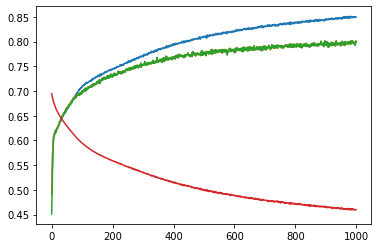

epoch: 0
train_acc: 0.8514166666666667
test_acc: 0.7966666666666666
f1: 0.7966614452417048

epoch: 1
train_acc: 0.8513888888888889
test_acc: 0.7976666666666666
f1: 0.7976710706304906

epoch: 2
train_acc: 0.8498055555555556
test_acc: 0.7966666666666666
f1: 0.7966698799978823

epoch: 3
train_acc: 0.8485555555555555
test_acc: 0.7961111111111111
f1: 0.7961154280831201

epoch: 4
train_acc: 0.8512222222222222
test_acc: 0.797
f1: 0.7969757264499291

epoch: 5
train_acc: 0.8493611111111111
test_acc: 0.7958888888888889
f1: 0.7958862555996329

epoch: 6
train_acc: 0.8503888888888889
test_acc: 0.7987777777777778
f1: 0.7987783814933453

epoch: 7
train_acc: 0.8510833333333333
test_acc: 0.7961111111111111
f1: 0.7961148240621715

epoch: 8
train_acc: 0.8500277777777778
test_acc: 0.7948888888888889
f1: 0.7948929911566918

epoch: 9
train_acc: 0.8501388888888889
test_acc: 0.7984444444444444
f1: 0.798421918920037

epoch: 10
train_acc: 0.8492777777777778
test_acc: 0.7951111111111111
f1: 0.7951024601507919

e

epoch: 92
train_acc: 0.8538888888888889
test_acc: 0.7997777777777778
f1: 0.7997816537220146

epoch: 93
train_acc: 0.85325
test_acc: 0.8015555555555556
f1: 0.8015584660857162

epoch: 94
train_acc: 0.8548611111111111
test_acc: 0.8008888888888889
f1: 0.8008797640766883

epoch: 95
train_acc: 0.8540833333333333
test_acc: 0.7983333333333333
f1: 0.7983371650344853

epoch: 96
train_acc: 0.8555833333333334
test_acc: 0.7997777777777778
f1: 0.7997816537220146

epoch: 97
train_acc: 0.8545555555555555
test_acc: 0.8023333333333333
f1: 0.8023355857619012

epoch: 98
train_acc: 0.8547222222222223
test_acc: 0.8007777777777778
f1: 0.8007821140255187

epoch: 99
train_acc: 0.8548055555555556
test_acc: 0.7995555555555556
f1: 0.7995497847007711

epoch: 100
train_acc: 0.8571111111111112
test_acc: 0.8
f1: 0.8000018271627497

epoch: 101
train_acc: 0.8535277777777778
test_acc: 0.7993333333333333
f1: 0.7993376142907174

epoch: 102
train_acc: 0.8543611111111111
test_acc: 0.7985555555555556
f1: 0.7985599202671447



epoch: 182
train_acc: 0.8579722222222222
test_acc: 0.8016666666666666
f1: 0.8016672616667327

epoch: 183
train_acc: 0.8593055555555555
test_acc: 0.7972222222222223
f1: 0.7972068081873163

epoch: 184
train_acc: 0.8595833333333334
test_acc: 0.8014444444444444
f1: 0.8014247425307219

epoch: 185
train_acc: 0.8577777777777778
test_acc: 0.8017777777777778
f1: 0.8017694083020676

epoch: 186
train_acc: 0.8581388888888889
test_acc: 0.8003333333333333
f1: 0.8003361410017871

epoch: 187
train_acc: 0.8597777777777778
test_acc: 0.8025555555555556
f1: 0.802553007994615

epoch: 188
train_acc: 0.8597777777777778
test_acc: 0.8052222222222222
f1: 0.805224961144203

epoch: 189
train_acc: 0.8599722222222222
test_acc: 0.8028888888888889
f1: 0.8028925587148252

epoch: 190
train_acc: 0.8580277777777777
test_acc: 0.8018888888888889
f1: 0.8018931813768997

epoch: 191
train_acc: 0.8596944444444444
test_acc: 0.8024444444444444
f1: 0.8024462492752049

epoch: 192
train_acc: 0.8593888888888889
test_acc: 0.799333333

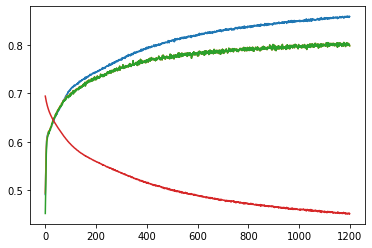

epoch: 0
train_acc: 0.8586666666666667
test_acc: 0.8008888888888889
f1: 0.8008870796803264

epoch: 1
train_acc: 0.8595555555555555
test_acc: 0.7988888888888889
f1: 0.7988930204945771

epoch: 2
train_acc: 0.8605555555555555
test_acc: 0.8012222222222222
f1: 0.8012259991514968

epoch: 3
train_acc: 0.8591111111111112
test_acc: 0.8021111111111111
f1: 0.802113893925142

epoch: 4
train_acc: 0.8595555555555555
test_acc: 0.8071111111111111
f1: 0.8071145403993263

epoch: 5
train_acc: 0.8576388888888888
test_acc: 0.801
f1: 0.8010016583349916

epoch: 6
train_acc: 0.8573055555555555
test_acc: 0.8094444444444444
f1: 0.8094442444787356

epoch: 7
train_acc: 0.8613055555555555
test_acc: 0.8004444444444444
f1: 0.8004486327072355

epoch: 8
train_acc: 0.8580555555555556
test_acc: 0.7986666666666666
f1: 0.7986608694509771

epoch: 9
train_acc: 0.8604722222222222
test_acc: 0.8048888888888889
f1: 0.8048896596983689

epoch: 10
train_acc: 0.8591111111111112
test_acc: 0.8043333333333333
f1: 0.8043240064301606

e

epoch: 91
train_acc: 0.8620277777777777
test_acc: 0.8053333333333333
f1: 0.8053371018413751

epoch: 92
train_acc: 0.8626944444444444
test_acc: 0.8042222222222222
f1: 0.8042051285596826

epoch: 93
train_acc: 0.8642222222222222
test_acc: 0.8037777777777778
f1: 0.8037749870567671

epoch: 94
train_acc: 0.8637222222222222
test_acc: 0.8048888888888889
f1: 0.8048769411083018

epoch: 95
train_acc: 0.8625277777777778
test_acc: 0.8065555555555556
f1: 0.8065544928048846

epoch: 96
train_acc: 0.8634444444444445
test_acc: 0.8046666666666666
f1: 0.8046692904115845

epoch: 97
train_acc: 0.8629166666666667
test_acc: 0.8047777777777778
f1: 0.8047807543273948

epoch: 98
train_acc: 0.8645
test_acc: 0.8035555555555556
f1: 0.8035450783508833

epoch: 99
train_acc: 0.8628333333333333
test_acc: 0.8007777777777778
f1: 0.8007729644490557

epoch: 100
train_acc: 0.86425
test_acc: 0.8066666666666666
f1: 0.8066681178612289

epoch: 101
train_acc: 0.8650277777777777
test_acc: 0.8051111111111111
f1: 0.8051143929633686

epoch: 181
train_acc: 0.8646111111111111
test_acc: 0.8092222222222222
f1: 0.8092243961513121

epoch: 182
train_acc: 0.8645
test_acc: 0.8064444444444444
f1: 0.8064483155985683

epoch: 183
train_acc: 0.8658055555555556
test_acc: 0.8075555555555556
f1: 0.8075583780853642

epoch: 184
train_acc: 0.8663611111111111
test_acc: 0.8038888888888889
f1: 0.8038918789913785

epoch: 185
train_acc: 0.8659166666666667
test_acc: 0.8056666666666666
f1: 0.8056676143418564

epoch: 186
train_acc: 0.86725
test_acc: 0.8035555555555556
f1: 0.8035516751592037

epoch: 187
train_acc: 0.8653055555555556
test_acc: 0.8033333333333333
f1: 0.8033270399552471

epoch: 188
train_acc: 0.8666111111111111
test_acc: 0.8052222222222222
f1: 0.80522559598774

epoch: 189
train_acc: 0.8670555555555556
test_acc: 0.806
f1: 0.8060036119030919

epoch: 190
train_acc: 0.8650833333333333
test_acc: 0.8083333333333333
f1: 0.808328702551378

epoch: 191
train_acc: 0.8669166666666667
test_acc: 0.8056666666666666
f1: 0.8056660404814119

epoch

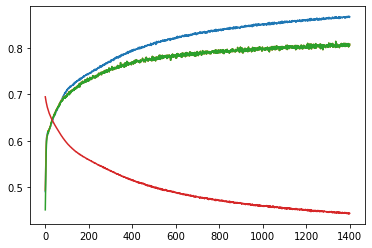

epoch: 0
train_acc: 0.8673333333333333
test_acc: 0.8096666666666666
f1: 0.8096561464600556

epoch: 1
train_acc: 0.8668333333333333
test_acc: 0.804
f1: 0.8039917243524928

epoch: 2
train_acc: 0.8674444444444445
test_acc: 0.8032222222222222
f1: 0.8032241729974272

epoch: 3
train_acc: 0.8655555555555555
test_acc: 0.8076666666666666
f1: 0.8076695991694481

epoch: 4
train_acc: 0.8661666666666666
test_acc: 0.8071111111111111
f1: 0.8071143594189004

epoch: 5
train_acc: 0.8665555555555555
test_acc: 0.8005555555555556
f1: 0.8005583602445984

epoch: 6
train_acc: 0.8663333333333333
test_acc: 0.8085555555555556
f1: 0.808557737081369

epoch: 7
train_acc: 0.8641111111111112
test_acc: 0.805
f1: 0.8050022220416733

epoch: 8
train_acc: 0.868
test_acc: 0.8035555555555556
f1: 0.8035498998619531

epoch: 9
train_acc: 0.8676944444444444
test_acc: 0.8078888888888889
f1: 0.8078886872908069

epoch: 10
train_acc: 0.8674444444444445
test_acc: 0.809
f1: 0.8089886883431477

epoch: 11
train_acc: 0.8680555555555556


epoch: 92
train_acc: 0.8696388888888889
test_acc: 0.8098888888888889
f1: 0.8098923508154642

epoch: 93
train_acc: 0.8682777777777778
test_acc: 0.8075555555555556
f1: 0.8075474300331733

epoch: 94
train_acc: 0.8699444444444444
test_acc: 0.8097777777777778
f1: 0.8097795156125708

epoch: 95
train_acc: 0.8700277777777777
test_acc: 0.811
f1: 0.8109872573757886

epoch: 96
train_acc: 0.8710833333333333
test_acc: 0.81
f1: 0.8100020266702697

epoch: 97
train_acc: 0.8701944444444445
test_acc: 0.8088888888888889
f1: 0.8088903234030539

epoch: 98
train_acc: 0.8705277777777778
test_acc: 0.8072222222222222
f1: 0.8072216010493137

epoch: 99
train_acc: 0.8711666666666666
test_acc: 0.8044444444444444
f1: 0.8044448403841075

epoch: 100
train_acc: 0.8684444444444445
test_acc: 0.8045555555555556
f1: 0.8045431892152396

epoch: 101
train_acc: 0.8693333333333333
test_acc: 0.807
f1: 0.8069900758375668

epoch: 102
train_acc: 0.8714166666666666
test_acc: 0.8105555555555556
f1: 0.8105561238889519

epoch: 103
tra

epoch: 182
train_acc: 0.8719166666666667
test_acc: 0.8105555555555556
f1: 0.810555749677643

epoch: 183
train_acc: 0.8724444444444445
test_acc: 0.8072222222222222
f1: 0.8072264182009341

epoch: 184
train_acc: 0.8734444444444445
test_acc: 0.8088888888888889
f1: 0.808892711248716

epoch: 185
train_acc: 0.8737777777777778
test_acc: 0.8105555555555556
f1: 0.8105595666930355

epoch: 186
train_acc: 0.8739722222222223
test_acc: 0.8094444444444444
f1: 0.8094367350982825

epoch: 187
train_acc: 0.8706666666666667
test_acc: 0.8103333333333333
f1: 0.8103242924340055

epoch: 188
train_acc: 0.8728055555555555
test_acc: 0.8107777777777778
f1: 0.8107799339811791

epoch: 189
train_acc: 0.8725
test_acc: 0.8082222222222222
f1: 0.8082178752418714

epoch: 190
train_acc: 0.8724444444444445
test_acc: 0.8107777777777778
f1: 0.8107806628455057

epoch: 191
train_acc: 0.8728611111111111
test_acc: 0.8093333333333333
f1: 0.8093374762958281

epoch: 192
train_acc: 0.8721666666666666
test_acc: 0.8093333333333333
f1: 

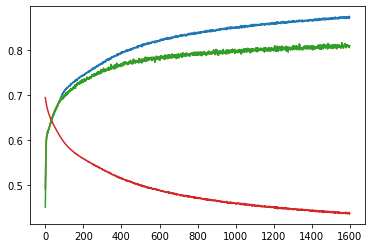

epoch: 0
train_acc: 0.8734444444444445
test_acc: 0.8096666666666666
f1: 0.8096530257700886

epoch: 1
train_acc: 0.8717222222222222
test_acc: 0.807
f1: 0.8070040101650255

epoch: 2
train_acc: 0.8725833333333334
test_acc: 0.8092222222222222
f1: 0.8092259790360482

epoch: 3
train_acc: 0.8731944444444445
test_acc: 0.811
f1: 0.810994257629164

epoch: 4
train_acc: 0.8726944444444444
test_acc: 0.8108888888888889
f1: 0.8108802223540866

epoch: 5
train_acc: 0.8728888888888889
test_acc: 0.8094444444444444
f1: 0.8094438304320306

epoch: 6
train_acc: 0.87275
test_acc: 0.8094444444444444
f1: 0.8094453737684488

epoch: 7
train_acc: 0.87175
test_acc: 0.8091111111111111
f1: 0.8091146649734181

epoch: 8
train_acc: 0.8733333333333333
test_acc: 0.8095555555555556
f1: 0.8095398022572713

epoch: 9
train_acc: 0.8724444444444445
test_acc: 0.8073333333333333
f1: 0.807323790250636

epoch: 10
train_acc: 0.8719444444444444
test_acc: 0.8072222222222222
f1: 0.807219221070556

epoch: 11
train_acc: 0.874
test_acc: 0

epoch: 92
train_acc: 0.8763055555555556
test_acc: 0.808
f1: 0.8079897598361574

epoch: 93
train_acc: 0.8765833333333334
test_acc: 0.8118888888888889
f1: 0.8118915340656792

epoch: 94
train_acc: 0.8743611111111111
test_acc: 0.8113333333333334
f1: 0.8113333333333334

epoch: 95
train_acc: 0.8770555555555556
test_acc: 0.808
f1: 0.8080035745483506

epoch: 96
train_acc: 0.8759444444444444
test_acc: 0.8104444444444444
f1: 0.8104478143449514

epoch: 97
train_acc: 0.8746111111111111
test_acc: 0.8127777777777778
f1: 0.8127695375908512

epoch: 98
train_acc: 0.8744722222222222
test_acc: 0.8126666666666666
f1: 0.8126494313795297

epoch: 99
train_acc: 0.8749722222222223
test_acc: 0.8107777777777778
f1: 0.8107701223745627

epoch: 100
train_acc: 0.87575
test_acc: 0.8114444444444444
f1: 0.8114484926376926

epoch: 101
train_acc: 0.8743333333333333
test_acc: 0.813
f1: 0.8130040517679609

epoch: 102
train_acc: 0.876
test_acc: 0.81
f1: 0.8100025521068314

epoch: 103
train_acc: 0.8753611111111111
test_acc: 

epoch: 182
train_acc: 0.8762222222222222
test_acc: 0.8105555555555556
f1: 0.8105435688527478

epoch: 183
train_acc: 0.87725
test_acc: 0.8155555555555556
f1: 0.8155594266670441

epoch: 184
train_acc: 0.8785277777777778
test_acc: 0.8115555555555556
f1: 0.8115462216061585

epoch: 185
train_acc: 0.8780555555555556
test_acc: 0.81
f1: 0.8100030026209721

epoch: 186
train_acc: 0.8778055555555555
test_acc: 0.8121111111111111
f1: 0.8121137531630618

epoch: 187
train_acc: 0.8771111111111111
test_acc: 0.8078888888888889
f1: 0.8078918180034522

epoch: 188
train_acc: 0.8785833333333334
test_acc: 0.8136666666666666
f1: 0.8136577846583641

epoch: 189
train_acc: 0.8785833333333334
test_acc: 0.8106666666666666
f1: 0.8106654044438835

epoch: 190
train_acc: 0.8793611111111111
test_acc: 0.8156666666666667
f1: 0.8156698595229097

epoch: 191
train_acc: 0.8785555555555555
test_acc: 0.8113333333333334
f1: 0.8113344234078919

epoch: 192
train_acc: 0.8778333333333334
test_acc: 0.8118888888888889
f1: 0.811892983

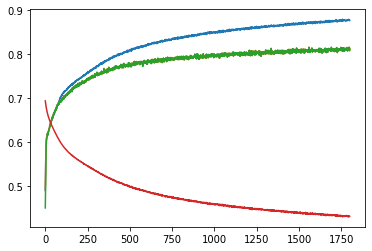

epoch: 0
train_acc: 0.8765555555555555
test_acc: 0.8135555555555556
f1: 0.8135588701470272

epoch: 1
train_acc: 0.8778333333333334
test_acc: 0.8106666666666666
f1: 0.8106696587521266

epoch: 2
train_acc: 0.8788611111111111
test_acc: 0.8157777777777778
f1: 0.8157724739655645

epoch: 3
train_acc: 0.8784722222222222
test_acc: 0.814
f1: 0.8140007348149599

epoch: 4
train_acc: 0.8787222222222222
test_acc: 0.8116666666666666
f1: 0.8116703752442664

epoch: 5
train_acc: 0.8781111111111111
test_acc: 0.8112222222222222
f1: 0.8112164866031449

epoch: 6
train_acc: 0.8788611111111111
test_acc: 0.811
f1: 0.810998046998047

epoch: 7
train_acc: 0.877
test_acc: 0.8142222222222222
f1: 0.8142256809287282

epoch: 8
train_acc: 0.8801944444444444
test_acc: 0.8127777777777778
f1: 0.8127758431462135

epoch: 9
train_acc: 0.8784444444444445
test_acc: 0.8108888888888889
f1: 0.8108871705445956

epoch: 10
train_acc: 0.8768055555555555
test_acc: 0.8145555555555556
f1: 0.8145594820574044

epoch: 11
train_acc: 0.88
t

epoch: 91
train_acc: 0.8815555555555555
test_acc: 0.8068888888888889
f1: 0.8068928561434118

epoch: 92
train_acc: 0.8802222222222222
test_acc: 0.8158888888888889
f1: 0.8158869862042429

epoch: 93
train_acc: 0.8821666666666667
test_acc: 0.814
f1: 0.8139978414788166

epoch: 94
train_acc: 0.8787777777777778
test_acc: 0.81
f1: 0.8099787659058783

epoch: 95
train_acc: 0.8813611111111112
test_acc: 0.811
f1: 0.8110012576674275

epoch: 96
train_acc: 0.8805833333333334
test_acc: 0.8114444444444444
f1: 0.8114482691413989

epoch: 97
train_acc: 0.8810833333333333
test_acc: 0.8103333333333333
f1: 0.8103374616045247

epoch: 98
train_acc: 0.8824444444444445
test_acc: 0.8122222222222222
f1: 0.8122222222222222

epoch: 99
train_acc: 0.87875
test_acc: 0.8113333333333334
f1: 0.8113260288346494

epoch: 100
train_acc: 0.88
test_acc: 0.8103333333333333
f1: 0.8103275707072212

epoch: 101
train_acc: 0.8795833333333334
test_acc: 0.8122222222222222
f1: 0.8122222222222222

epoch: 102
train_acc: 0.8813888888888889

epoch: 181
train_acc: 0.8835
test_acc: 0.8135555555555556
f1: 0.8135347188245987

epoch: 182
train_acc: 0.884
test_acc: 0.8137777777777778
f1: 0.8137615184256687

epoch: 183
train_acc: 0.88225
test_acc: 0.8094444444444444
f1: 0.8094471239944712

epoch: 184
train_acc: 0.8836111111111111
test_acc: 0.8123333333333334
f1: 0.8123282239341837

epoch: 185
train_acc: 0.8813611111111112
test_acc: 0.8166666666666667
f1: 0.8166601924485015

epoch: 186
train_acc: 0.8814166666666666
test_acc: 0.808
f1: 0.8080040296871397

epoch: 187
train_acc: 0.8833611111111112
test_acc: 0.8093333333333333
f1: 0.8093068925300108

epoch: 188
train_acc: 0.8841666666666667
test_acc: 0.8144444444444444
f1: 0.8144455165436864

epoch: 189
train_acc: 0.8841111111111111
test_acc: 0.8128888888888889
f1: 0.8128922154564894

epoch: 190
train_acc: 0.8836944444444444
test_acc: 0.8142222222222222
f1: 0.8142168729150298

epoch: 191
train_acc: 0.8822777777777778
test_acc: 0.8121111111111111
f1: 0.8121139758495302

epoch: 192
trai

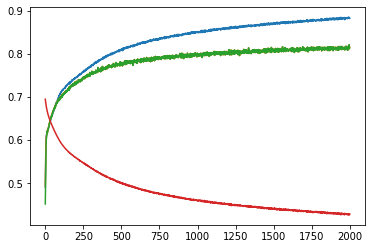

epoch: 0
train_acc: 0.8831388888888889
test_acc: 0.8157777777777778
f1: 0.8157781507709375

epoch: 1
train_acc: 0.8835277777777778
test_acc: 0.8195555555555556
f1: 0.8195594496929491

epoch: 2
train_acc: 0.882
test_acc: 0.8155555555555556
f1: 0.8155575229664606

epoch: 3
train_acc: 0.8842777777777778
test_acc: 0.8126666666666666
f1: 0.8126536409067753

epoch: 4
train_acc: 0.8837777777777778
test_acc: 0.8085555555555556
f1: 0.8085545037925422

epoch: 5
train_acc: 0.8833333333333333
test_acc: 0.8124444444444444
f1: 0.812443629388042

epoch: 6
train_acc: 0.8832222222222222
test_acc: 0.8148888888888889
f1: 0.8148925911522474

epoch: 7
train_acc: 0.8828333333333334
test_acc: 0.8167777777777778
f1: 0.8167817657713777

epoch: 8
train_acc: 0.8830277777777777
test_acc: 0.8105555555555556
f1: 0.8105485460480255

epoch: 9
train_acc: 0.8843333333333333
test_acc: 0.8152222222222222
f1: 0.8152183053755998

epoch: 10
train_acc: 0.8860833333333333
test_acc: 0.8117777777777778
f1: 0.8117677390986403

e

epoch: 91
train_acc: 0.8847777777777778
test_acc: 0.8133333333333334
f1: 0.8133347344867038

epoch: 92
train_acc: 0.8858888888888888
test_acc: 0.8116666666666666
f1: 0.8116705799404743

epoch: 93
train_acc: 0.8837777777777778
test_acc: 0.8141111111111111
f1: 0.8141146430317873

epoch: 94
train_acc: 0.88375
test_acc: 0.8124444444444444
f1: 0.8124479362486201

epoch: 95
train_acc: 0.8864722222222222
test_acc: 0.8155555555555556
f1: 0.8155580330393801

epoch: 96
train_acc: 0.8838888888888888
test_acc: 0.8158888888888889
f1: 0.8158926234338821

epoch: 97
train_acc: 0.8861388888888889
test_acc: 0.8111111111111111
f1: 0.8111152247809448

epoch: 98
train_acc: 0.8847222222222222
test_acc: 0.8128888888888889
f1: 0.8128923724186471

epoch: 99
train_acc: 0.88575
test_acc: 0.8165555555555556
f1: 0.8165585519616387

epoch: 100
train_acc: 0.8853055555555556
test_acc: 0.8142222222222222
f1: 0.8142259378190622

epoch: 101
train_acc: 0.8862222222222222
test_acc: 0.8121111111111111
f1: 0.812089628095480

epoch: 182
train_acc: 0.8880555555555556
test_acc: 0.8172222222222222
f1: 0.8172245578533326

epoch: 183
train_acc: 0.886
test_acc: 0.8136666666666666
f1: 0.8136690475992062

epoch: 184
train_acc: 0.8869166666666667
test_acc: 0.8145555555555556
f1: 0.8145486940493576

epoch: 185
train_acc: 0.8869722222222223
test_acc: 0.8141111111111111
f1: 0.8141035905652633

epoch: 186
train_acc: 0.8874444444444445
test_acc: 0.815
f1: 0.8149955302887215

epoch: 187
train_acc: 0.8901111111111111
test_acc: 0.8115555555555556
f1: 0.811556300027582

epoch: 188
train_acc: 0.8890555555555556
test_acc: 0.8131111111111111
f1: 0.8131133723727322

epoch: 189
train_acc: 0.8866944444444445
test_acc: 0.8152222222222222
f1: 0.8152261893084751

epoch: 190
train_acc: 0.8872222222222222
test_acc: 0.813
f1: 0.8129980676647344

epoch: 191
train_acc: 0.887
test_acc: 0.8155555555555556
f1: 0.8155591260702244

epoch: 192
train_acc: 0.8882222222222222
test_acc: 0.8144444444444444
f1: 0.814447166072289

epoch: 193
train_acc

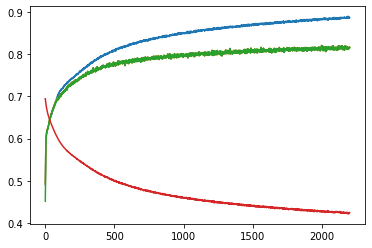

epoch: 0
train_acc: 0.8874444444444445
test_acc: 0.8137777777777778
f1: 0.8137724163849737

epoch: 1
train_acc: 0.8875277777777778
test_acc: 0.8144444444444444
f1: 0.8144378926750877

epoch: 2
train_acc: 0.8856388888888889
test_acc: 0.8143333333333334
f1: 0.8143183947464913

epoch: 3
train_acc: 0.8866111111111111
test_acc: 0.8107777777777778
f1: 0.8107815038589886

epoch: 4
train_acc: 0.8898055555555555
test_acc: 0.81
f1: 0.8100039033401807

epoch: 5
train_acc: 0.8885833333333333
test_acc: 0.8097777777777778
f1: 0.8097795156125708

epoch: 6
train_acc: 0.8880555555555556
test_acc: 0.8168888888888889
f1: 0.8168702695586847

epoch: 7
train_acc: 0.8860277777777777
test_acc: 0.8181111111111111
f1: 0.8180988479271992

epoch: 8
train_acc: 0.8868055555555555
test_acc: 0.8163333333333334
f1: 0.8163372765645879

epoch: 9
train_acc: 0.8868333333333334
test_acc: 0.8173333333333334
f1: 0.8173347045586855

epoch: 10
train_acc: 0.88875
test_acc: 0.8175555555555556
f1: 0.8175582314181108

epoch: 11
tr

epoch: 92
train_acc: 0.8891944444444444
test_acc: 0.8165555555555556
f1: 0.8165578995744125

epoch: 93
train_acc: 0.8888055555555555
test_acc: 0.8164444444444444
f1: 0.8164484328908554

epoch: 94
train_acc: 0.8886944444444445
test_acc: 0.8201111111111111
f1: 0.820114226984684

epoch: 95
train_acc: 0.8890833333333333
test_acc: 0.8145555555555556
f1: 0.8145576688379663

epoch: 96
train_acc: 0.8885833333333333
test_acc: 0.814
f1: 0.8140040140307863

epoch: 97
train_acc: 0.8905833333333333
test_acc: 0.8142222222222222
f1: 0.8142253506469512

epoch: 98
train_acc: 0.8906388888888889
test_acc: 0.8194444444444444
f1: 0.8194446294581641

epoch: 99
train_acc: 0.8911388888888889
test_acc: 0.8188888888888889
f1: 0.8188730757958472

epoch: 100
train_acc: 0.8907222222222222
test_acc: 0.8154444444444444
f1: 0.8154415712957885

epoch: 101
train_acc: 0.8910555555555556
test_acc: 0.8174444444444444
f1: 0.8174472279984152

epoch: 102
train_acc: 0.8891666666666667
test_acc: 0.8174444444444444
f1: 0.817445

epoch: 182
train_acc: 0.8915555555555555
test_acc: 0.8165555555555556
f1: 0.816558896082017

epoch: 183
train_acc: 0.8903333333333333
test_acc: 0.8187777777777778
f1: 0.8187779634746251

epoch: 184
train_acc: 0.8913055555555556
test_acc: 0.8163333333333334
f1: 0.8163348638904194

epoch: 185
train_acc: 0.8906944444444445
test_acc: 0.8208888888888889
f1: 0.8208902333289085

epoch: 186
train_acc: 0.8920277777777778
test_acc: 0.8225555555555556
f1: 0.8225587868219149

epoch: 187
train_acc: 0.8889166666666667
test_acc: 0.8156666666666667
f1: 0.8156704057192581

epoch: 188
train_acc: 0.8909444444444444
test_acc: 0.8168888888888889
f1: 0.81689214422068

epoch: 189
train_acc: 0.8899166666666667
test_acc: 0.818
f1: 0.8179983462702984

epoch: 190
train_acc: 0.8927777777777778
test_acc: 0.8174444444444444
f1: 0.8174483998890892

epoch: 191
train_acc: 0.8901666666666667
test_acc: 0.8147777777777778
f1: 0.8147812971411657

epoch: 192
train_acc: 0.8916666666666667
test_acc: 0.8205555555555556
f1: 0.

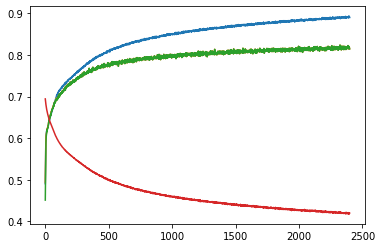

epoch: 0
train_acc: 0.8914166666666666
test_acc: 0.82
f1: 0.82

epoch: 1
train_acc: 0.8897222222222222
test_acc: 0.8205555555555556
f1: 0.8205532404972277

epoch: 2
train_acc: 0.8920833333333333
test_acc: 0.8191111111111111
f1: 0.8191028213821699

epoch: 3
train_acc: 0.8908055555555555
test_acc: 0.8136666666666666
f1: 0.8136702071420123

epoch: 4
train_acc: 0.8909444444444444
test_acc: 0.8186666666666667
f1: 0.818667383045409

epoch: 5
train_acc: 0.8901944444444444
test_acc: 0.8193333333333334
f1: 0.8193349838703505

epoch: 6
train_acc: 0.8905555555555555
test_acc: 0.8145555555555556
f1: 0.8145594820574044

epoch: 7
train_acc: 0.8910833333333333
test_acc: 0.8207777777777778
f1: 0.8207815017368644

epoch: 8
train_acc: 0.8925277777777778
test_acc: 0.8158888888888889
f1: 0.8158912414262879

epoch: 9
train_acc: 0.8908611111111111
test_acc: 0.8181111111111111
f1: 0.8181136687923903

epoch: 10
train_acc: 0.8932777777777777
test_acc: 0.8174444444444444
f1: 0.8174483097223796

epoch: 11
train_

epoch: 91
train_acc: 0.8930277777777778
test_acc: 0.8184444444444444
f1: 0.8184478246561582

epoch: 92
train_acc: 0.8932222222222223
test_acc: 0.8171111111111111
f1: 0.8171149495746713

epoch: 93
train_acc: 0.8916111111111111
test_acc: 0.8236666666666667
f1: 0.8236678400459773

epoch: 94
train_acc: 0.8930277777777778
test_acc: 0.818
f1: 0.8179958746501652

epoch: 95
train_acc: 0.8925833333333333
test_acc: 0.8191111111111111
f1: 0.8191150416139907

epoch: 96
train_acc: 0.8916388888888889
test_acc: 0.8178888888888889
f1: 0.8178928527063949

epoch: 97
train_acc: 0.8917222222222222
test_acc: 0.819
f1: 0.8189985764347093

epoch: 98
train_acc: 0.89325
test_acc: 0.816
f1: 0.8160039981036663

epoch: 99
train_acc: 0.8926944444444445
test_acc: 0.8168888888888889
f1: 0.8168921443422177

epoch: 100
train_acc: 0.8929166666666667
test_acc: 0.82
f1: 0.8200021777830474

epoch: 101
train_acc: 0.8933055555555556
test_acc: 0.8177777777777778
f1: 0.8177799824470356

epoch: 102
train_acc: 0.893055555555555

epoch: 182
train_acc: 0.8939444444444444
test_acc: 0.8213333333333334
f1: 0.8213231072415662

epoch: 183
train_acc: 0.8936111111111111
test_acc: 0.8184444444444444
f1: 0.818444058919048

epoch: 184
train_acc: 0.8955833333333333
test_acc: 0.822
f1: 0.8220026106771094

epoch: 185
train_acc: 0.8938611111111111
test_acc: 0.8147777777777778
f1: 0.8147817910262571

epoch: 186
train_acc: 0.8944444444444445
test_acc: 0.819
f1: 0.8190001854691381

epoch: 187
train_acc: 0.8960555555555556
test_acc: 0.8218888888888889
f1: 0.8218776192791524

epoch: 188
train_acc: 0.8946666666666667
test_acc: 0.8193333333333334
f1: 0.8193183888391617

epoch: 189
train_acc: 0.8950277777777778
test_acc: 0.8158888888888889
f1: 0.8158927143600733

epoch: 190
train_acc: 0.8946388888888889
test_acc: 0.819
f1: 0.8190039217647108

epoch: 191
train_acc: 0.8941111111111111
test_acc: 0.8196666666666667
f1: 0.8196700930308373

epoch: 192
train_acc: 0.895
test_acc: 0.8154444444444444
f1: 0.8154442507750318

epoch: 193
train_ac

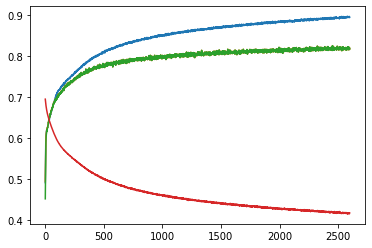

epoch: 0
train_acc: 0.8945833333333333
test_acc: 0.8177777777777778
f1: 0.8177794425260607

epoch: 1
train_acc: 0.8950833333333333
test_acc: 0.8156666666666667
f1: 0.8156701690315213

epoch: 2
train_acc: 0.8952222222222223
test_acc: 0.8146666666666667
f1: 0.8146699616279243

epoch: 3
train_acc: 0.89425
test_acc: 0.8168888888888889
f1: 0.8168852714326871

epoch: 4
train_acc: 0.8952222222222223
test_acc: 0.8152222222222222
f1: 0.815219838357207

epoch: 5
train_acc: 0.8953055555555556
test_acc: 0.8206666666666667
f1: 0.8206590947306822

epoch: 6
train_acc: 0.8951388888888889
test_acc: 0.8207777777777778
f1: 0.8207814131556138

epoch: 7
train_acc: 0.8953055555555556
test_acc: 0.8212222222222222
f1: 0.8212199155111624

epoch: 8
train_acc: 0.89475
test_acc: 0.8212222222222222
f1: 0.821224948173737

epoch: 9
train_acc: 0.8945555555555555
test_acc: 0.8183333333333334
f1: 0.8183246737724659

epoch: 10
train_acc: 0.8958055555555555
test_acc: 0.8201111111111111
f1: 0.8200846256298662

epoch: 11
t

epoch: 91
train_acc: 0.8974722222222222
test_acc: 0.8211111111111111
f1: 0.8211111111111112

epoch: 92
train_acc: 0.8965555555555556
test_acc: 0.8188888888888889
f1: 0.8188892555830084

epoch: 93
train_acc: 0.8971944444444444
test_acc: 0.8168888888888889
f1: 0.8168922979488898

epoch: 94
train_acc: 0.8964166666666666
test_acc: 0.8185555555555556
f1: 0.8185591285765097

epoch: 95
train_acc: 0.89425
test_acc: 0.8174444444444444
f1: 0.8174449921554757

epoch: 96
train_acc: 0.8961944444444444
test_acc: 0.8205555555555556
f1: 0.8205594081378157

epoch: 97
train_acc: 0.8971944444444444
test_acc: 0.822
f1: 0.8219898120652916

epoch: 98
train_acc: 0.89575
test_acc: 0.8173333333333334
f1: 0.8173156523195763

epoch: 99
train_acc: 0.8970277777777778
test_acc: 0.8173333333333334
f1: 0.8173347044619886

epoch: 100
train_acc: 0.8955555555555555
test_acc: 0.8191111111111111
f1: 0.8191149701838433

epoch: 101
train_acc: 0.8961388888888889
test_acc: 0.8228888888888889
f1: 0.8228868333011407

epoch: 102

epoch: 181
train_acc: 0.8966944444444445
test_acc: 0.825
f1: 0.8250037571622661

epoch: 182
train_acc: 0.8969444444444444
test_acc: 0.8185555555555556
f1: 0.8185560998889495

epoch: 183
train_acc: 0.8977777777777778
test_acc: 0.8245555555555556
f1: 0.8245490640526876

epoch: 184
train_acc: 0.8983888888888889
test_acc: 0.8191111111111111
f1: 0.8191107270013529

epoch: 185
train_acc: 0.8983611111111112
test_acc: 0.8175555555555556
f1: 0.8175582314181108

epoch: 186
train_acc: 0.8965
test_acc: 0.8235555555555556
f1: 0.823559389501787

epoch: 187
train_acc: 0.8980555555555556
test_acc: 0.8222222222222222
f1: 0.8222201591195382

epoch: 188
train_acc: 0.8993888888888889
test_acc: 0.8242222222222222
f1: 0.8242229166530863

epoch: 189
train_acc: 0.8984166666666666
test_acc: 0.8174444444444444
f1: 0.8174434415154654

epoch: 190
train_acc: 0.89825
test_acc: 0.8217777777777778
f1: 0.8217791155456386

epoch: 191
train_acc: 0.8997222222222222
test_acc: 0.8193333333333334
f1: 0.819337187617224

epoc

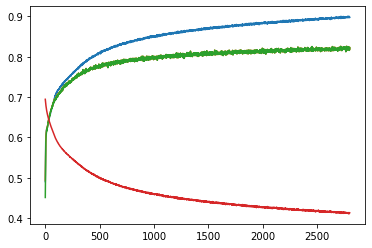

epoch: 0
train_acc: 0.8977777777777778
test_acc: 0.8203333333333334
f1: 0.8203212199745151

epoch: 1
train_acc: 0.8980555555555556
test_acc: 0.8175555555555556
f1: 0.8175551681426421

epoch: 2
train_acc: 0.8978055555555555
test_acc: 0.8192222222222222
f1: 0.8192261034304806

epoch: 3
train_acc: 0.8976111111111111
test_acc: 0.8187777777777778
f1: 0.8187771938394413

epoch: 4
train_acc: 0.8995277777777778
test_acc: 0.8196666666666667
f1: 0.8196593708830977

epoch: 5
train_acc: 0.8991666666666667
test_acc: 0.8191111111111111
f1: 0.8191124688954486

epoch: 6
train_acc: 0.8985
test_acc: 0.822
f1: 0.8220038765288666

epoch: 7
train_acc: 0.8968333333333334
test_acc: 0.8163333333333334
f1: 0.8163304736966299

epoch: 8
train_acc: 0.899
test_acc: 0.82
f1: 0.82000264001056

epoch: 9
train_acc: 0.8962222222222223
test_acc: 0.8196666666666667
f1: 0.8196700930308373

epoch: 10
train_acc: 0.8968055555555555
test_acc: 0.8195555555555556
f1: 0.819557480299718

epoch: 11
train_acc: 0.8966388888888889
te

epoch: 92
train_acc: 0.8990833333333333
test_acc: 0.8224444444444444
f1: 0.8224483025339141

epoch: 93
train_acc: 0.90075
test_acc: 0.8197777777777778
f1: 0.8197725891267466

epoch: 94
train_acc: 0.9013055555555556
test_acc: 0.8187777777777778
f1: 0.8187728444793138

epoch: 95
train_acc: 0.8993611111111111
test_acc: 0.8223333333333334
f1: 0.8223338663333926

epoch: 96
train_acc: 0.9003611111111111
test_acc: 0.8253333333333334
f1: 0.8253346444125585

epoch: 97
train_acc: 0.9005277777777778
test_acc: 0.8191111111111111
f1: 0.8191114773552991

epoch: 98
train_acc: 0.8976666666666666
test_acc: 0.8216666666666667
f1: 0.8216691743505109

epoch: 99
train_acc: 0.8985555555555556
test_acc: 0.8207777777777778
f1: 0.820777589705073

epoch: 100
train_acc: 0.9003611111111111
test_acc: 0.821
f1: 0.8210029236825844

epoch: 101
train_acc: 0.8993611111111111
test_acc: 0.8196666666666667
f1: 0.8196700930308373

epoch: 102
train_acc: 0.8990555555555556
test_acc: 0.8153333333333334
f1: 0.8153372091731227


epoch: 183
train_acc: 0.90025
test_acc: 0.8235555555555556
f1: 0.823534921403762

epoch: 184
train_acc: 0.8992777777777777
test_acc: 0.8213333333333334
f1: 0.8213160394950599

epoch: 185
train_acc: 0.8997222222222222
test_acc: 0.8222222222222222
f1: 0.8222243731190593

epoch: 186
train_acc: 0.9013055555555556
test_acc: 0.819
f1: 0.8190039217403082

epoch: 187
train_acc: 0.8999722222222222
test_acc: 0.8213333333333334
f1: 0.8213370832433099

epoch: 188
train_acc: 0.90225
test_acc: 0.8177777777777778
f1: 0.8177799824470356

epoch: 189
train_acc: 0.9032222222222223
test_acc: 0.8173333333333334
f1: 0.817333703176973

epoch: 190
train_acc: 0.9000833333333333
test_acc: 0.8182222222222222
f1: 0.8182214322741923

epoch: 191
train_acc: 0.9016388888888889
test_acc: 0.8233333333333334
f1: 0.823335217781128

epoch: 192
train_acc: 0.9013055555555556
test_acc: 0.8194444444444444
f1: 0.8194481960380924

epoch: 193
train_acc: 0.9008055555555555
test_acc: 0.8223333333333334
f1: 0.822336568646363

epoch

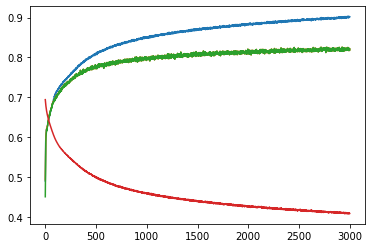

epoch: 0
train_acc: 0.9003888888888889
test_acc: 0.818
f1: 0.8180038827771101

epoch: 1
train_acc: 0.8992222222222223
test_acc: 0.8257777777777778
f1: 0.8257812622609387

epoch: 2
train_acc: 0.8998333333333334
test_acc: 0.8216666666666667
f1: 0.8216612483802518

epoch: 3
train_acc: 0.9024166666666666
test_acc: 0.8241111111111111
f1: 0.824114678874976

epoch: 4
train_acc: 0.9018888888888889
test_acc: 0.8224444444444444
f1: 0.8224481710340854

epoch: 5
train_acc: 0.9010555555555556
test_acc: 0.8203333333333334
f1: 0.8203372439452352

epoch: 6
train_acc: 0.8992777777777777
test_acc: 0.817
f1: 0.8170018143045485

epoch: 7
train_acc: 0.90175
test_acc: 0.8231111111111111
f1: 0.8231147450979928

epoch: 8
train_acc: 0.9018888888888889
test_acc: 0.8253333333333334
f1: 0.825337059615176

epoch: 9
train_acc: 0.9001111111111111
test_acc: 0.8204444444444444
f1: 0.8204472820090589

epoch: 10
train_acc: 0.9003611111111111
test_acc: 0.8201111111111111
f1: 0.820099729016187

epoch: 11
train_acc: 0.9016

epoch: 93
train_acc: 0.9026388888888889
test_acc: 0.818
f1: 0.8179992090862636

epoch: 94
train_acc: 0.9008055555555555
test_acc: 0.8221111111111111
f1: 0.8221032817109513

epoch: 95
train_acc: 0.90225
test_acc: 0.8226666666666667
f1: 0.8226615611876003

epoch: 96
train_acc: 0.9033055555555556
test_acc: 0.8218888888888889
f1: 0.8218897574556866

epoch: 97
train_acc: 0.9031944444444444
test_acc: 0.8228888888888889
f1: 0.8228924312386356

epoch: 98
train_acc: 0.9013055555555556
test_acc: 0.8206666666666667
f1: 0.8206702534624579

epoch: 99
train_acc: 0.9020833333333333
test_acc: 0.8186666666666667
f1: 0.8186516670267601

epoch: 100
train_acc: 0.9016388888888889
test_acc: 0.8235555555555556
f1: 0.8235515561321505

epoch: 101
train_acc: 0.9033611111111111
test_acc: 0.8205555555555556
f1: 0.8205593550166015

epoch: 102
train_acc: 0.904
test_acc: 0.8237777777777778
f1: 0.8237815372921223

epoch: 103
train_acc: 0.9035833333333333
test_acc: 0.8222222222222222
f1: 0.8222214495831963

epoch: 104

epoch: 183
train_acc: 0.9045833333333333
test_acc: 0.8253333333333334
f1: 0.8253298831166676

epoch: 184
train_acc: 0.9033611111111111
test_acc: 0.8198888888888889
f1: 0.8198927558242505

epoch: 185
train_acc: 0.9025555555555556
test_acc: 0.8194444444444444
f1: 0.8194406166304146

epoch: 186
train_acc: 0.9031111111111111
test_acc: 0.8221111111111111
f1: 0.8221148073656045

epoch: 187
train_acc: 0.9035277777777778
test_acc: 0.8198888888888889
f1: 0.8198920086115954

epoch: 188
train_acc: 0.9037777777777778
test_acc: 0.8205555555555556
f1: 0.8205580788635982

epoch: 189
train_acc: 0.9059722222222222
test_acc: 0.8238888888888889
f1: 0.8238798331620859

epoch: 190
train_acc: 0.9041666666666667
test_acc: 0.8185555555555556
f1: 0.8185581069871555

epoch: 191
train_acc: 0.9055
test_acc: 0.8192222222222222
f1: 0.8192247642793031

epoch: 192
train_acc: 0.9036111111111111
test_acc: 0.8205555555555556
f1: 0.8205594613224834

epoch: 193
train_acc: 0.9029166666666667
test_acc: 0.8252222222222222
f1

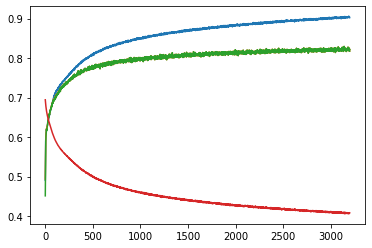

epoch: 0
train_acc: 0.9056388888888889
test_acc: 0.8205555555555556
f1: 0.8205522657316022

epoch: 1
train_acc: 0.9053611111111111
test_acc: 0.8226666666666667
f1: 0.8226646087217392

epoch: 2
train_acc: 0.9036111111111111
test_acc: 0.8238888888888889
f1: 0.8238927221028707

epoch: 3
train_acc: 0.9041111111111111
test_acc: 0.8247777777777778
f1: 0.8247800167346144

epoch: 4
train_acc: 0.9059166666666667
test_acc: 0.8218888888888889
f1: 0.8218917980528757

epoch: 5
train_acc: 0.9037222222222222
test_acc: 0.8222222222222222
f1: 0.8222235566540036

epoch: 6
train_acc: 0.9050833333333334
test_acc: 0.822
f1: 0.8220038677467649

epoch: 7
train_acc: 0.9039722222222222
test_acc: 0.825
f1: 0.8249998163580223

epoch: 8
train_acc: 0.9038888888888889
test_acc: 0.8277777777777777
f1: 0.8277784581619999

epoch: 9
train_acc: 0.90475
test_acc: 0.8218888888888889
f1: 0.8218894232222816

epoch: 10
train_acc: 0.9028055555555555
test_acc: 0.8193333333333334
f1: 0.8193370448535052

epoch: 11
train_acc: 0.9

epoch: 92
train_acc: 0.9045277777777778
test_acc: 0.8265555555555556
f1: 0.8265564013651444

epoch: 93
train_acc: 0.9044444444444445
test_acc: 0.8246666666666667
f1: 0.824659878386971

epoch: 94
train_acc: 0.9043888888888889
test_acc: 0.8228888888888889
f1: 0.8228921862442541

epoch: 95
train_acc: 0.9044444444444445
test_acc: 0.8251111111111111
f1: 0.8251124239509556

epoch: 96
train_acc: 0.9039166666666667
test_acc: 0.818
f1: 0.818001051634545

epoch: 97
train_acc: 0.9056944444444445
test_acc: 0.8261111111111111
f1: 0.8261135562981617

epoch: 98
train_acc: 0.9054444444444445
test_acc: 0.8241111111111111
f1: 0.8241119688411427

epoch: 99
train_acc: 0.9058333333333334
test_acc: 0.8193333333333334
f1: 0.8193229927703896

epoch: 100
train_acc: 0.9046388888888889
test_acc: 0.8225555555555556
f1: 0.822557034260738

epoch: 101
train_acc: 0.9060833333333334
test_acc: 0.8262222222222222
f1: 0.8262247709731579

epoch: 102
train_acc: 0.9059722222222222
test_acc: 0.823
f1: 0.8230020170514563

epo

epoch: 183
train_acc: 0.9066666666666666
test_acc: 0.8246666666666667
f1: 0.8246704504707466

epoch: 184
train_acc: 0.9061666666666667
test_acc: 0.822
f1: 0.8220034458618053

epoch: 185
train_acc: 0.9063888888888889
test_acc: 0.8246666666666667
f1: 0.8246654977772584

epoch: 186
train_acc: 0.9061666666666667
test_acc: 0.8198888888888889
f1: 0.8198883085307999

epoch: 187
train_acc: 0.90775
test_acc: 0.8222222222222222
f1: 0.8222248296400592

epoch: 188
train_acc: 0.9064722222222222
test_acc: 0.8235555555555556
f1: 0.8235576903206664

epoch: 189
train_acc: 0.9059166666666667
test_acc: 0.8195555555555556
f1: 0.8195579793108152

epoch: 190
train_acc: 0.9053611111111111
test_acc: 0.8223333333333334
f1: 0.8223367091354071

epoch: 191
train_acc: 0.90625
test_acc: 0.8208888888888889
f1: 0.8208881105293387

epoch: 192
train_acc: 0.9063333333333333
test_acc: 0.8245555555555556
f1: 0.8245593742668683

epoch: 193
train_acc: 0.9075277777777778
test_acc: 0.822
f1: 0.822003560039556

epoch: 194
trai

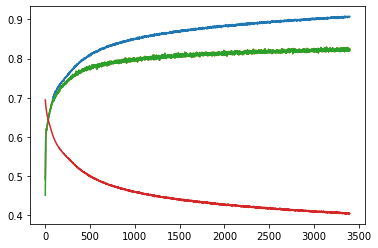

epoch: 0
train_acc: 0.9066944444444445
test_acc: 0.8193333333333334
f1: 0.8193286939688592

epoch: 1
train_acc: 0.9072222222222223
test_acc: 0.8182222222222222
f1: 0.8182205705117265

epoch: 2
train_acc: 0.9075555555555556
test_acc: 0.8233333333333334
f1: 0.8233363083305337

epoch: 3
train_acc: 0.9051388888888889
test_acc: 0.8195555555555556
f1: 0.8195519912095854

epoch: 4
train_acc: 0.9055555555555556
test_acc: 0.8222222222222222
f1: 0.8222206068574343

epoch: 5
train_acc: 0.9066666666666666
test_acc: 0.8213333333333334
f1: 0.8213367920005546

epoch: 6
train_acc: 0.9069444444444444
test_acc: 0.8195555555555556
f1: 0.8195592625873996

epoch: 7
train_acc: 0.90675
test_acc: 0.824
f1: 0.8240013210874636

epoch: 8
train_acc: 0.9053333333333333
test_acc: 0.8217777777777778
f1: 0.8217791155456386

epoch: 9
train_acc: 0.9087777777777778
test_acc: 0.8246666666666667
f1: 0.8246673593417005

epoch: 10
train_acc: 0.90775
test_acc: 0.8244444444444444
f1: 0.8244457621958285

epoch: 11
train_acc: 0

epoch: 91
train_acc: 0.908
test_acc: 0.8252222222222222
f1: 0.8252257674480971

epoch: 92
train_acc: 0.9064722222222222
test_acc: 0.8214444444444444
f1: 0.8214421408538977

epoch: 93
train_acc: 0.9074722222222222
test_acc: 0.8217777777777778
f1: 0.8217816591462559

epoch: 94
train_acc: 0.9062222222222223
test_acc: 0.8234444444444444
f1: 0.8234464564311137

epoch: 95
train_acc: 0.9078611111111111
test_acc: 0.8237777777777778
f1: 0.8237813980687291

epoch: 96
train_acc: 0.9085555555555556
test_acc: 0.8248888888888889
f1: 0.8248904887775704

epoch: 97
train_acc: 0.9082222222222223
test_acc: 0.8243333333333334
f1: 0.8243360117197559

epoch: 98
train_acc: 0.9072222222222223
test_acc: 0.8274444444444444
f1: 0.8274412809171383

epoch: 99
train_acc: 0.9067222222222222
test_acc: 0.8264444444444444
f1: 0.8264193907561783

epoch: 100
train_acc: 0.9080555555555555
test_acc: 0.8266666666666667
f1: 0.8266679677376536

epoch: 101
train_acc: 0.9083333333333333
test_acc: 0.8235555555555556
f1: 0.823557

epoch: 181
train_acc: 0.9104722222222222
test_acc: 0.8254444444444444
f1: 0.8254474679388133

epoch: 182
train_acc: 0.9104722222222222
test_acc: 0.8222222222222222
f1: 0.8222192109666505

epoch: 183
train_acc: 0.9080833333333334
test_acc: 0.826
f1: 0.8260033683288984

epoch: 184
train_acc: 0.9108055555555555
test_acc: 0.8218888888888889
f1: 0.8218925896917305

epoch: 185
train_acc: 0.9082777777777777
test_acc: 0.825
f1: 0.8250036362278744

epoch: 186
train_acc: 0.9081388888888889
test_acc: 0.8237777777777778
f1: 0.8237816068953615

epoch: 187
train_acc: 0.9071111111111111
test_acc: 0.8268888888888889
f1: 0.8268898890868642

epoch: 188
train_acc: 0.9070277777777778
test_acc: 0.821
f1: 0.8210014916681583

epoch: 189
train_acc: 0.9089444444444444
test_acc: 0.8193333333333334
f1: 0.8193368307169787

epoch: 190
train_acc: 0.9091111111111111
test_acc: 0.8266666666666667
f1: 0.8266685155588425

epoch: 191
train_acc: 0.90725
test_acc: 0.8278888888888889
f1: 0.8278917000523422

epoch: 192
train

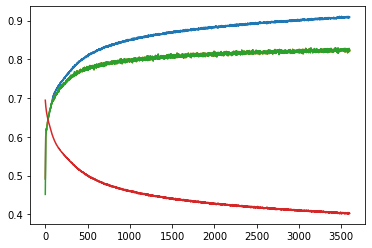

epoch: 0
train_acc: 0.9091944444444444
test_acc: 0.8206666666666667
f1: 0.8206662858600634

epoch: 1
train_acc: 0.9076944444444445
test_acc: 0.8226666666666667
f1: 0.8226676912597146

epoch: 2
train_acc: 0.9096944444444445
test_acc: 0.8202222222222222
f1: 0.8202241398552611

epoch: 3
train_acc: 0.9086666666666666
test_acc: 0.8258888888888889
f1: 0.8258913372007792

epoch: 4
train_acc: 0.9081666666666667
test_acc: 0.8205555555555556
f1: 0.8205557394307292

epoch: 5
train_acc: 0.9115555555555556
test_acc: 0.8201111111111111
f1: 0.8201145290307612

epoch: 6
train_acc: 0.9079722222222222
test_acc: 0.8202222222222222
f1: 0.8202218404718603

epoch: 7
train_acc: 0.9100277777777778
test_acc: 0.824
f1: 0.8239996262715865

epoch: 8
train_acc: 0.9116944444444445
test_acc: 0.8208888888888889
f1: 0.8208858550489003

epoch: 9
train_acc: 0.9102777777777777
test_acc: 0.8246666666666667
f1: 0.8246704504707466

epoch: 10
train_acc: 0.9086111111111111
test_acc: 0.8261111111111111
f1: 0.8261148444183786



epoch: 91
train_acc: 0.9097777777777778
test_acc: 0.821
f1: 0.8210035248847256

epoch: 92
train_acc: 0.9121944444444444
test_acc: 0.8211111111111111
f1: 0.82111429138064

epoch: 93
train_acc: 0.9104166666666667
test_acc: 0.8255555555555556
f1: 0.8255581142116729

epoch: 94
train_acc: 0.9078888888888889
test_acc: 0.8245555555555556
f1: 0.8245564111182339

epoch: 95
train_acc: 0.9086944444444445
test_acc: 0.8215555555555556
f1: 0.8215539341331496

epoch: 96
train_acc: 0.9103055555555556
test_acc: 0.8211111111111111
f1: 0.821107056280077

epoch: 97
train_acc: 0.9116944444444445
test_acc: 0.8262222222222222
f1: 0.8262259724564308

epoch: 98
train_acc: 0.9074166666666666
test_acc: 0.8271111111111111
f1: 0.8271071917928817

epoch: 99
train_acc: 0.9102222222222223
test_acc: 0.8273333333333334
f1: 0.8273358659139743

epoch: 100
train_acc: 0.9093611111111111
test_acc: 0.8255555555555556
f1: 0.8255571492475093

epoch: 101
train_acc: 0.9095
test_acc: 0.825
f1: 0.8250031867529843

epoch: 102
train

epoch: 182
train_acc: 0.9101666666666667
test_acc: 0.8202222222222222
f1: 0.8202243974429729

epoch: 183
train_acc: 0.9111944444444444
test_acc: 0.8285555555555556
f1: 0.8285591856288645

epoch: 184
train_acc: 0.9118333333333334
test_acc: 0.8217777777777778
f1: 0.8217812278413494

epoch: 185
train_acc: 0.9123888888888889
test_acc: 0.8252222222222222
f1: 0.825223954898336

epoch: 186
train_acc: 0.9103888888888889
test_acc: 0.8261111111111111
f1: 0.8261145352550308

epoch: 187
train_acc: 0.9124722222222222
test_acc: 0.8285555555555556
f1: 0.828556069888946

epoch: 188
train_acc: 0.9128888888888889
test_acc: 0.8243333333333334
f1: 0.8243363761932817

epoch: 189
train_acc: 0.9115833333333333
test_acc: 0.8211111111111111
f1: 0.8211150069984241

epoch: 190
train_acc: 0.9116666666666666
test_acc: 0.8236666666666667
f1: 0.8236675265640513

epoch: 191
train_acc: 0.9110555555555555
test_acc: 0.8232222222222222
f1: 0.8232244810556573

epoch: 192
train_acc: 0.9101944444444444
test_acc: 0.821333333

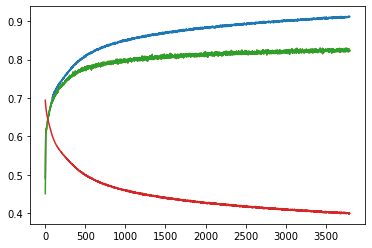

epoch: 0
train_acc: 0.9127222222222222
test_acc: 0.8258888888888889
f1: 0.8258926613906088

epoch: 1
train_acc: 0.9114444444444444
test_acc: 0.8278888888888889
f1: 0.8278894052222796

epoch: 2
train_acc: 0.9099722222222222
test_acc: 0.8187777777777778
f1: 0.8187792879644732

epoch: 3
train_acc: 0.9111666666666667
test_acc: 0.826
f1: 0.8260000000000001

epoch: 4
train_acc: 0.9127222222222222
test_acc: 0.8264444444444444
f1: 0.826446989936108

epoch: 5
train_acc: 0.9106388888888889
test_acc: 0.8232222222222222
f1: 0.8232258953895545

epoch: 6
train_acc: 0.9109166666666667
test_acc: 0.8221111111111111
f1: 0.8221057063282138

epoch: 7
train_acc: 0.9122222222222223
test_acc: 0.8255555555555556
f1: 0.8255565634572382

epoch: 8
train_acc: 0.9118333333333334
test_acc: 0.8208888888888889
f1: 0.8208927100346163

epoch: 9
train_acc: 0.9121666666666667
test_acc: 0.8254444444444444
f1: 0.8254456059938439

epoch: 10
train_acc: 0.9109444444444444
test_acc: 0.8201111111111111
f1: 0.8201134096977432

e

epoch: 91
train_acc: 0.9118333333333334
test_acc: 0.8232222222222222
f1: 0.8232162750226982

epoch: 92
train_acc: 0.9130555555555555
test_acc: 0.8227777777777778
f1: 0.8227665644106351

epoch: 93
train_acc: 0.9128333333333334
test_acc: 0.8257777777777778
f1: 0.8257761947202855

epoch: 94
train_acc: 0.9118888888888889
test_acc: 0.8221111111111111
f1: 0.8221149830280283

epoch: 95
train_acc: 0.9120277777777778
test_acc: 0.8241111111111111
f1: 0.8241131155005997

epoch: 96
train_acc: 0.91125
test_acc: 0.8257777777777778
f1: 0.8257814344064117

epoch: 97
train_acc: 0.9127222222222222
test_acc: 0.8246666666666667
f1: 0.8246626919339122

epoch: 98
train_acc: 0.9110555555555555
test_acc: 0.8264444444444444
f1: 0.8264480098777215

epoch: 99
train_acc: 0.9123333333333333
test_acc: 0.8224444444444444
f1: 0.822433571691951

epoch: 100
train_acc: 0.9130277777777778
test_acc: 0.824
f1: 0.8240016079032197

epoch: 101
train_acc: 0.9128333333333334
test_acc: 0.83
f1: 0.8300018133365571

epoch: 102
tra

epoch: 182
train_acc: 0.91325
test_acc: 0.8228888888888889
f1: 0.8228872795817188

epoch: 183
train_acc: 0.9134444444444444
test_acc: 0.8242222222222222
f1: 0.8242206250302881

epoch: 184
train_acc: 0.9121111111111111
test_acc: 0.8224444444444444
f1: 0.8224451458986297

epoch: 185
train_acc: 0.9139444444444444
test_acc: 0.8267777777777777
f1: 0.8267813769990068

epoch: 186
train_acc: 0.9151388888888888
test_acc: 0.824
f1: 0.8240023640568542

epoch: 187
train_acc: 0.9139722222222222
test_acc: 0.8225555555555556
f1: 0.8225567363285606

epoch: 188
train_acc: 0.9136666666666666
test_acc: 0.829
f1: 0.8290032490292413

epoch: 189
train_acc: 0.9132222222222223
test_acc: 0.8234444444444444
f1: 0.8234459157422119

epoch: 190
train_acc: 0.9143055555555556
test_acc: 0.8266666666666667
f1: 0.8266698936894831

epoch: 191
train_acc: 0.9138888888888889
test_acc: 0.8267777777777777
f1: 0.8267809321573985

epoch: 192
train_acc: 0.9145277777777778
test_acc: 0.8245555555555556
f1: 0.8245577973519063

epo

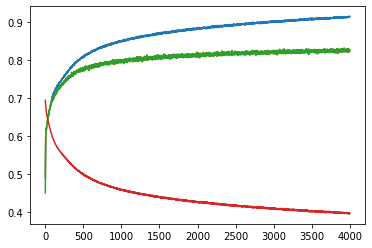

epoch: 0
train_acc: 0.9138888888888889
test_acc: 0.8283333333333334
f1: 0.8283217573039945

epoch: 1
train_acc: 0.9138055555555555
test_acc: 0.8262222222222222
f1: 0.8262258694622029

epoch: 2
train_acc: 0.913
test_acc: 0.8262222222222222
f1: 0.8262172191086508

epoch: 3
train_acc: 0.9138888888888889
test_acc: 0.826
f1: 0.825997052733609

epoch: 4
train_acc: 0.9148611111111111
test_acc: 0.8258888888888889
f1: 0.825892661367135

epoch: 5
train_acc: 0.9124166666666667
test_acc: 0.8295555555555556
f1: 0.8295590570758162

epoch: 6
train_acc: 0.9142222222222223
test_acc: 0.8235555555555556
f1: 0.8235562526751086

epoch: 7
train_acc: 0.9132777777777777
test_acc: 0.8262222222222222
f1: 0.8262258694622029

epoch: 8
train_acc: 0.91375
test_acc: 0.824
f1: 0.8240006953635842

epoch: 9
train_acc: 0.9129722222222222
test_acc: 0.8282222222222222
f1: 0.8282251148924561

epoch: 10
train_acc: 0.9141388888888888
test_acc: 0.824
f1: 0.8240003563456966

epoch: 11
train_acc: 0.9126944444444445
test_acc: 0.

epoch: 92
train_acc: 0.9153055555555556
test_acc: 0.8263333333333334
f1: 0.8263353123988865

epoch: 93
train_acc: 0.91575
test_acc: 0.8264444444444444
f1: 0.8264481470682821

epoch: 94
train_acc: 0.915
test_acc: 0.823
f1: 0.8230024890638692

epoch: 95
train_acc: 0.9148611111111111
test_acc: 0.8301111111111111
f1: 0.8301101777706309

epoch: 96
train_acc: 0.9142222222222223
test_acc: 0.8273333333333334
f1: 0.8273365479445236

epoch: 97
train_acc: 0.9151388888888888
test_acc: 0.828
f1: 0.828003057913685

epoch: 98
train_acc: 0.9148333333333334
test_acc: 0.8292222222222222
f1: 0.8292241683666592

epoch: 99
train_acc: 0.91625
test_acc: 0.8255555555555556
f1: 0.8255593201768519

epoch: 100
train_acc: 0.9138888888888889
test_acc: 0.8272222222222222
f1: 0.8272250443975459

epoch: 101
train_acc: 0.9158333333333334
test_acc: 0.8282222222222222
f1: 0.8282137137990101

epoch: 102
train_acc: 0.9147777777777778
test_acc: 0.8234444444444444
f1: 0.8234446253593987

epoch: 103
train_acc: 0.916111111111

epoch: 183
train_acc: 0.9155
test_acc: 0.8225555555555556
f1: 0.822557034260738

epoch: 184
train_acc: 0.9157777777777778
test_acc: 0.824
f1: 0.8240035201267245

epoch: 185
train_acc: 0.91575
test_acc: 0.8244444444444444
f1: 0.8244468026586275

epoch: 186
train_acc: 0.9142777777777777
test_acc: 0.8275555555555556
f1: 0.8275582807413735

epoch: 187
train_acc: 0.9158333333333334
test_acc: 0.8281111111111111
f1: 0.8281146826949345

epoch: 188
train_acc: 0.9155277777777778
test_acc: 0.8265555555555556
f1: 0.826555733282581

epoch: 189
train_acc: 0.9158333333333334
test_acc: 0.8272222222222222
f1: 0.8272230647807813

epoch: 190
train_acc: 0.9156944444444445
test_acc: 0.8267777777777777
f1: 0.8267782974445023

epoch: 191
train_acc: 0.9151666666666667
test_acc: 0.8261111111111111
f1: 0.8261135562981617

epoch: 192
train_acc: 0.9166111111111112
test_acc: 0.8293333333333334
f1: 0.8293329708969475

epoch: 193
train_acc: 0.9178611111111111
test_acc: 0.8293333333333334
f1: 0.8293360303013843

epoc

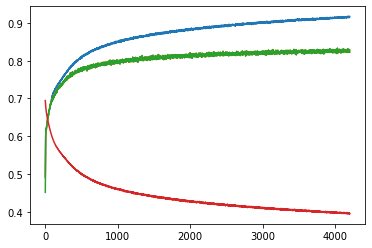

epoch: 0
train_acc: 0.9162222222222223
test_acc: 0.8278888888888889
f1: 0.8278918700427891

epoch: 1
train_acc: 0.9153333333333333
test_acc: 0.8235555555555556
f1: 0.8235579255822504

epoch: 2
train_acc: 0.9151666666666667
test_acc: 0.8225555555555556
f1: 0.82255862908866

epoch: 3
train_acc: 0.9152222222222223
test_acc: 0.828
f1: 0.8280028964123687

epoch: 4
train_acc: 0.9166111111111112
test_acc: 0.8283333333333334
f1: 0.8283359508566959

epoch: 5
train_acc: 0.9159444444444444
test_acc: 0.8277777777777777
f1: 0.827781111692077

epoch: 6
train_acc: 0.9145833333333333
test_acc: 0.8258888888888889
f1: 0.8258875196438904

epoch: 7
train_acc: 0.9173333333333333
test_acc: 0.8265555555555556
f1: 0.8265472879258833

epoch: 8
train_acc: 0.9160555555555555
test_acc: 0.8267777777777777
f1: 0.8267701537710014

epoch: 9
train_acc: 0.9163611111111111
test_acc: 0.8248888888888889
f1: 0.8248926246523649

epoch: 10
train_acc: 0.9162777777777777
test_acc: 0.8257777777777778
f1: 0.8257752996686636

epo

epoch: 91
train_acc: 0.9176111111111112
test_acc: 0.8243333333333334
f1: 0.8243347973238881

epoch: 92
train_acc: 0.9170555555555555
test_acc: 0.8301111111111111
f1: 0.8301138860989373

epoch: 93
train_acc: 0.9173333333333333
test_acc: 0.8245555555555556
f1: 0.8245553714471856

epoch: 94
train_acc: 0.9181111111111111
test_acc: 0.8276666666666667
f1: 0.827663507213446

epoch: 95
train_acc: 0.9173333333333333
test_acc: 0.825
f1: 0.8250038090296663

epoch: 96
train_acc: 0.9173333333333333
test_acc: 0.8283333333333334
f1: 0.8283369002331401

epoch: 97
train_acc: 0.9159722222222222
test_acc: 0.8244444444444444
f1: 0.8244451379973935

epoch: 98
train_acc: 0.91725
test_acc: 0.8214444444444444
f1: 0.8214449801545035

epoch: 99
train_acc: 0.9168055555555555
test_acc: 0.8258888888888889
f1: 0.825892661367135

epoch: 100
train_acc: 0.9174166666666667
test_acc: 0.8255555555555556
f1: 0.8255593201768519

epoch: 101
train_acc: 0.9169722222222222
test_acc: 0.8275555555555556
f1: 0.8275500372940924

e

epoch: 181
train_acc: 0.9175555555555556
test_acc: 0.8277777777777777
f1: 0.827781111692077

epoch: 182
train_acc: 0.9190555555555555
test_acc: 0.8291111111111111
f1: 0.8291123939241232

epoch: 183
train_acc: 0.9180555555555555
test_acc: 0.8286666666666667
f1: 0.8286689680401952

epoch: 184
train_acc: 0.9195
test_acc: 0.8268888888888889
f1: 0.8268768520360354

epoch: 185
train_acc: 0.9186666666666666
test_acc: 0.8278888888888889
f1: 0.8278910880925286

epoch: 186
train_acc: 0.9171388888888888
test_acc: 0.8244444444444444
f1: 0.8244436815362004

epoch: 187
train_acc: 0.9185277777777778
test_acc: 0.825
f1: 0.8250028584733986

epoch: 188
train_acc: 0.917
test_acc: 0.8287777777777777
f1: 0.828763220613527

epoch: 189
train_acc: 0.9180555555555555
test_acc: 0.8272222222222222
f1: 0.8272204366611936

epoch: 190
train_acc: 0.9180555555555555
test_acc: 0.8256666666666667
f1: 0.8256613699119096

epoch: 191
train_acc: 0.9165277777777778
test_acc: 0.8284444444444444
f1: 0.8284469606026573

epoch:

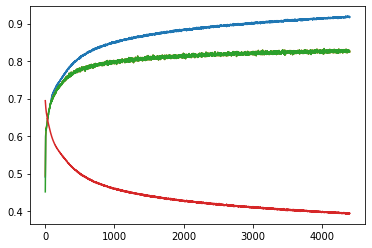

epoch: 0
train_acc: 0.9176111111111112
test_acc: 0.8264444444444444
f1: 0.8264323766882461

epoch: 1
train_acc: 0.9174444444444444
test_acc: 0.8274444444444444
f1: 0.82743684977958

epoch: 2
train_acc: 0.9184166666666667
test_acc: 0.8235555555555556
f1: 0.823557167519137

epoch: 3
train_acc: 0.9175555555555556
test_acc: 0.8258888888888889
f1: 0.8258879322589887

epoch: 4
train_acc: 0.9187777777777778
test_acc: 0.83
f1: 0.8300036267698281

epoch: 5
train_acc: 0.9172777777777777
test_acc: 0.8246666666666667
f1: 0.8246703465545756

epoch: 6
train_acc: 0.9188888888888889
test_acc: 0.8273333333333334
f1: 0.8273343309634063

epoch: 7
train_acc: 0.9189166666666667
test_acc: 0.829
f1: 0.829002185128437

epoch: 8
train_acc: 0.9187777777777778
test_acc: 0.8274444444444444
f1: 0.8274481832416181

epoch: 9
train_acc: 0.9191111111111111
test_acc: 0.8284444444444444
f1: 0.8284462743736236

epoch: 10
train_acc: 0.9194166666666667
test_acc: 0.8248888888888889
f1: 0.8248926246988556

epoch: 11
train_ac

epoch: 91
train_acc: 0.9182777777777777
test_acc: 0.829
f1: 0.8290037219738509

epoch: 92
train_acc: 0.9188055555555555
test_acc: 0.829
f1: 0.8289821877900703

epoch: 93
train_acc: 0.9191388888888888
test_acc: 0.8254444444444444
f1: 0.8254407442844662

epoch: 94
train_acc: 0.9192777777777777
test_acc: 0.8266666666666667
f1: 0.8266616763487823

epoch: 95
train_acc: 0.9200555555555555
test_acc: 0.8284444444444444
f1: 0.8284481806245756

epoch: 96
train_acc: 0.9195277777777778
test_acc: 0.8334444444444444
f1: 0.8334480532383679

epoch: 97
train_acc: 0.9181388888888888
test_acc: 0.8256666666666667
f1: 0.8256691181033967

epoch: 98
train_acc: 0.9185277777777778
test_acc: 0.8278888888888889
f1: 0.8278918700427891

epoch: 99
train_acc: 0.91975
test_acc: 0.8278888888888889
f1: 0.8278800388442089

epoch: 100
train_acc: 0.9203611111111111
test_acc: 0.8264444444444444
f1: 0.8264377249939474

epoch: 101
train_acc: 0.9195555555555556
test_acc: 0.8285555555555556
f1: 0.8285553756447166

epoch: 102
t

epoch: 181
train_acc: 0.9208888888888889
test_acc: 0.8291111111111111
f1: 0.8291148243411512

epoch: 182
train_acc: 0.9205833333333333
test_acc: 0.8218888888888889
f1: 0.8218927480594422

epoch: 183
train_acc: 0.9201388888888888
test_acc: 0.8312222222222222
f1: 0.8312243788331511

epoch: 184
train_acc: 0.9213055555555556
test_acc: 0.8244444444444444
f1: 0.8244454588416245

epoch: 185
train_acc: 0.9189444444444445
test_acc: 0.832
f1: 0.832002654827925

epoch: 186
train_acc: 0.9198055555555555
test_acc: 0.8264444444444444
f1: 0.826446030015675

epoch: 187
train_acc: 0.9193611111111111
test_acc: 0.8267777777777777
f1: 0.8267764155231815

epoch: 188
train_acc: 0.9206666666666666
test_acc: 0.8272222222222222
f1: 0.8272204368500665

epoch: 189
train_acc: 0.9195555555555556
test_acc: 0.8293333333333334
f1: 0.8293313527547564

epoch: 190
train_acc: 0.9195277777777778
test_acc: 0.8298888888888889
f1: 0.8298814018110346

epoch: 191
train_acc: 0.9196666666666666
test_acc: 0.8286666666666667
f1: 0

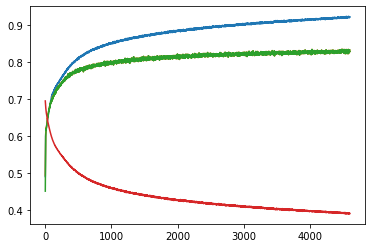

epoch: 0
train_acc: 0.9198888888888889
test_acc: 0.8291111111111111
f1: 0.8291129340425936

epoch: 1
train_acc: 0.9203055555555556
test_acc: 0.8317777777777777
f1: 0.8317813665759393

epoch: 2
train_acc: 0.9222777777777778
test_acc: 0.825
f1: 0.8250028583488954

epoch: 3
train_acc: 0.9197777777777778
test_acc: 0.8272222222222222
f1: 0.8272208634628269

epoch: 4
train_acc: 0.9219166666666667
test_acc: 0.827
f1: 0.8269952905299152

epoch: 5
train_acc: 0.9220833333333334
test_acc: 0.8281111111111111
f1: 0.8281147505420091

epoch: 6
train_acc: 0.9200833333333334
test_acc: 0.8302222222222222
f1: 0.8302245028242929

epoch: 7
train_acc: 0.9190833333333334
test_acc: 0.8256666666666667
f1: 0.8256661048734295

epoch: 8
train_acc: 0.9198611111111111
test_acc: 0.8288888888888889
f1: 0.828892074539618

epoch: 9
train_acc: 0.9211388888888888
test_acc: 0.8324444444444444
f1: 0.8324433274069108

epoch: 10
train_acc: 0.9213611111111111
test_acc: 0.8284444444444444
f1: 0.8284420045388722

epoch: 11
trai

epoch: 91
train_acc: 0.9227777777777778
test_acc: 0.8287777777777777
f1: 0.8287812509613246

epoch: 92
train_acc: 0.9215
test_acc: 0.8251111111111111
f1: 0.8251142202690231

epoch: 93
train_acc: 0.9216388888888889
test_acc: 0.8268888888888889
f1: 0.8268926247670042

epoch: 94
train_acc: 0.92025
test_acc: 0.8284444444444444
f1: 0.8284447917915123

epoch: 95
train_acc: 0.9216944444444445
test_acc: 0.8311111111111111
f1: 0.8311143804980368

epoch: 96
train_acc: 0.9217777777777778
test_acc: 0.8298888888888889
f1: 0.829885770176522

epoch: 97
train_acc: 0.9202222222222223
test_acc: 0.83
f1: 0.8300032908960503

epoch: 98
train_acc: 0.9214722222222222
test_acc: 0.8297777777777777
f1: 0.8297790554962085

epoch: 99
train_acc: 0.9216388888888889
test_acc: 0.8292222222222222
f1: 0.8292258381273874

epoch: 100
train_acc: 0.9214166666666667
test_acc: 0.8294444444444444
f1: 0.8294455794589376

epoch: 101
train_acc: 0.9223055555555556
test_acc: 0.83
f1: 0.8300024933433067

epoch: 102
train_acc: 0.920

epoch: 182
train_acc: 0.9222777777777778
test_acc: 0.8284444444444444
f1: 0.8284410552743137

epoch: 183
train_acc: 0.9227222222222222
test_acc: 0.828
f1: 0.828000679506307

epoch: 184
train_acc: 0.9231944444444444
test_acc: 0.8262222222222222
f1: 0.8262206432031419

epoch: 185
train_acc: 0.9230833333333334
test_acc: 0.8276666666666667
f1: 0.8276619753448288

epoch: 186
train_acc: 0.9218888888888889
test_acc: 0.829
f1: 0.8290016952247546

epoch: 187
train_acc: 0.9216388888888889
test_acc: 0.8265555555555556
f1: 0.8265592793594416

epoch: 188
train_acc: 0.9235833333333333
test_acc: 0.832
f1: 0.832003526034754

epoch: 189
train_acc: 0.9230277777777778
test_acc: 0.8254444444444444
f1: 0.825443881935091

epoch: 190
train_acc: 0.9231111111111111
test_acc: 0.8313333333333334
f1: 0.8313369316579079

epoch: 191
train_acc: 0.92325
test_acc: 0.8302222222222222
f1: 0.8302257855695135

epoch: 192
train_acc: 0.9224166666666667
test_acc: 0.8325555555555556
f1: 0.8325576951294001

epoch: 193
train_ac

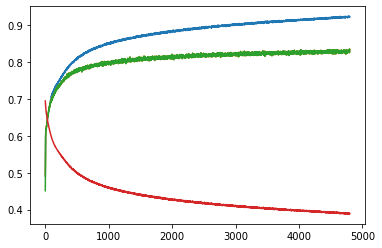

epoch: 0
train_acc: 0.9233333333333333
test_acc: 0.8254444444444444
f1: 0.8254296067457672

epoch: 1
train_acc: 0.9229722222222222
test_acc: 0.8297777777777777
f1: 0.8297734066176458

epoch: 2
train_acc: 0.9220277777777778
test_acc: 0.8303333333333334
f1: 0.8303344624324416

epoch: 3
train_acc: 0.9225555555555556
test_acc: 0.8236666666666667
f1: 0.8236660984283828

epoch: 4
train_acc: 0.9236944444444445
test_acc: 0.8258888888888889
f1: 0.8258894112645346

epoch: 5
train_acc: 0.9232222222222223
test_acc: 0.8315555555555556
f1: 0.8315562210152205

epoch: 6
train_acc: 0.9230555555555555
test_acc: 0.8271111111111111
f1: 0.8271081826650676

epoch: 7
train_acc: 0.9215833333333333
test_acc: 0.8285555555555556
f1: 0.8285546136691194

epoch: 8
train_acc: 0.9229444444444445
test_acc: 0.8267777777777777
f1: 0.8267779552770941

epoch: 9
train_acc: 0.9216666666666666
test_acc: 0.8271111111111111
f1: 0.8271147396951328

epoch: 10
train_acc: 0.9235
test_acc: 0.8288888888888889
f1: 0.828891398653488



epoch: 93
train_acc: 0.9234166666666667
test_acc: 0.829
f1: 0.8290029619082326

epoch: 94
train_acc: 0.9233055555555556
test_acc: 0.8312222222222222
f1: 0.8312220450939399

epoch: 95
train_acc: 0.9239166666666667
test_acc: 0.8278888888888889
f1: 0.8278921590294313

epoch: 96
train_acc: 0.9236111111111112
test_acc: 0.829
f1: 0.8290019485596212

epoch: 97
train_acc: 0.9236388888888889
test_acc: 0.8297777777777777
f1: 0.8297728770297015

epoch: 98
train_acc: 0.9235277777777777
test_acc: 0.8294444444444444
f1: 0.8294435074414118

epoch: 99
train_acc: 0.9233333333333333
test_acc: 0.8306666666666667
f1: 0.8306679377129386

epoch: 100
train_acc: 0.9231944444444444
test_acc: 0.8301111111111111
f1: 0.830108919331431

epoch: 101
train_acc: 0.9248888888888889
test_acc: 0.8274444444444444
f1: 0.8274466494505931

epoch: 102
train_acc: 0.9228888888888889
test_acc: 0.8267777777777777
f1: 0.8267804188938012

epoch: 103
train_acc: 0.9226388888888889
test_acc: 0.8284444444444444
f1: 0.8284481721449642



epoch: 184
train_acc: 0.9247222222222222
test_acc: 0.8292222222222222
f1: 0.8292257707188844

epoch: 185
train_acc: 0.9250555555555555
test_acc: 0.8264444444444444
f1: 0.826448087080877

epoch: 186
train_acc: 0.9248055555555555
test_acc: 0.8314444444444444
f1: 0.8314480965727847

epoch: 187
train_acc: 0.9252777777777778
test_acc: 0.8297777777777777
f1: 0.829780946879672

epoch: 188
train_acc: 0.9257777777777778
test_acc: 0.8284444444444444
f1: 0.8284433007402325

epoch: 189
train_acc: 0.9251666666666667
test_acc: 0.8322222222222222
f1: 0.8322218659533432

epoch: 190
train_acc: 0.9236666666666666
test_acc: 0.8297777777777777
f1: 0.8297798372614993

epoch: 191
train_acc: 0.9246111111111112
test_acc: 0.83
f1: 0.8300026864330196

epoch: 192
train_acc: 0.9248333333333333
test_acc: 0.8312222222222222
f1: 0.8312257958329523

epoch: 193
train_acc: 0.9235277777777777
test_acc: 0.8263333333333334
f1: 0.826335312279849

epoch: 194
train_acc: 0.9257222222222222
test_acc: 0.833
f1: 0.83300234843879

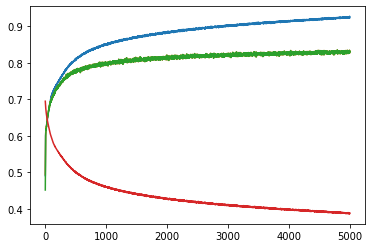

epoch: 0
train_acc: 0.9238888888888889
test_acc: 0.8293333333333334
f1: 0.829335836454457

epoch: 1
train_acc: 0.9243055555555556
test_acc: 0.8288888888888889
f1: 0.8288907141908934

epoch: 2
train_acc: 0.9248611111111111
test_acc: 0.8314444444444444
f1: 0.8314458491716246

epoch: 3
train_acc: 0.9243888888888889
test_acc: 0.8341111111111111
f1: 0.8341144760330633

epoch: 4
train_acc: 0.9251111111111111
test_acc: 0.8314444444444444
f1: 0.8314330802110944

epoch: 5
train_acc: 0.9252222222222222
test_acc: 0.8328888888888889
f1: 0.8328772692311922

epoch: 6
train_acc: 0.9247222222222222
test_acc: 0.8231111111111111
f1: 0.8231048653525387

epoch: 7
train_acc: 0.9243055555555556
test_acc: 0.8318888888888889
f1: 0.831886720044771

epoch: 8
train_acc: 0.9246666666666666
test_acc: 0.8311111111111111
f1: 0.8311146557433174

epoch: 9
train_acc: 0.92425
test_acc: 0.8322222222222222
f1: 0.8322252050708426

epoch: 10
train_acc: 0.92525
test_acc: 0.8273333333333334
f1: 0.8273358657879076

epoch: 11
t

epoch: 91
train_acc: 0.9241944444444444
test_acc: 0.8256666666666667
f1: 0.8256648652204209

epoch: 92
train_acc: 0.92525
test_acc: 0.8314444444444444
f1: 0.8314480965727847

epoch: 93
train_acc: 0.927
test_acc: 0.8272222222222222
f1: 0.8272236621370312

epoch: 94
train_acc: 0.9258611111111111
test_acc: 0.8294444444444444
f1: 0.8294478029498225

epoch: 95
train_acc: 0.9262777777777778
test_acc: 0.8346666666666667
f1: 0.8346681771212063

epoch: 96
train_acc: 0.9245833333333333
test_acc: 0.8297777777777777
f1: 0.8297699768780615

epoch: 97
train_acc: 0.9258611111111111
test_acc: 0.8274444444444444
f1: 0.8274422182614206

epoch: 98
train_acc: 0.9260555555555555
test_acc: 0.8304444444444444
f1: 0.8304406011698121

epoch: 99
train_acc: 0.9242222222222222
test_acc: 0.8311111111111111
f1: 0.8311147808833225

epoch: 100
train_acc: 0.9247777777777778
test_acc: 0.8306666666666667
f1: 0.8306693425646545

epoch: 101
train_acc: 0.9241666666666667
test_acc: 0.8304444444444444
f1: 0.8304476011347124


epoch: 181
train_acc: 0.9273888888888889
test_acc: 0.8246666666666667
f1: 0.8246702686963773

epoch: 182
train_acc: 0.9278611111111111
test_acc: 0.8322222222222222
f1: 0.8322184192440473

epoch: 183
train_acc: 0.9260555555555555
test_acc: 0.8338888888888889
f1: 0.8338917661161845

epoch: 184
train_acc: 0.9261111111111111
test_acc: 0.8303333333333334
f1: 0.8303366744251869

epoch: 185
train_acc: 0.9266944444444445
test_acc: 0.8273333333333334
f1: 0.8273343310379017

epoch: 186
train_acc: 0.9272222222222222
test_acc: 0.8283333333333334
f1: 0.8283370189688259

epoch: 187
train_acc: 0.9255277777777777
test_acc: 0.8284444444444444
f1: 0.8284359470282481

epoch: 188
train_acc: 0.92625
test_acc: 0.8332222222222222
f1: 0.8332230355215129

epoch: 189
train_acc: 0.9266666666666666
test_acc: 0.8322222222222222
f1: 0.8322211037032066

epoch: 190
train_acc: 0.9251666666666667
test_acc: 0.8335555555555556
f1: 0.8335579967505055

epoch: 191
train_acc: 0.9260833333333334
test_acc: 0.8311111111111111
f

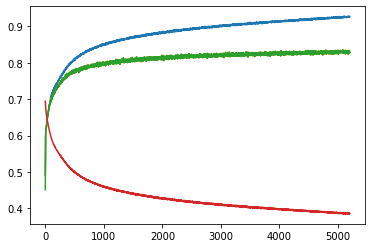

epoch: 0
train_acc: 0.927
test_acc: 0.8287777777777777
f1: 0.8287814876622558

epoch: 1
train_acc: 0.9272777777777778
test_acc: 0.8332222222222222
f1: 0.8332154748586134

epoch: 2
train_acc: 0.9264166666666667
test_acc: 0.8305555555555556
f1: 0.8305419221953317

epoch: 3
train_acc: 0.9278333333333333
test_acc: 0.8305555555555556
f1: 0.830557486389488

epoch: 4
train_acc: 0.9263611111111111
test_acc: 0.8323333333333334
f1: 0.8323320147687499

epoch: 5
train_acc: 0.9269722222222222
test_acc: 0.833
f1: 0.8330031730285573

epoch: 6
train_acc: 0.9272777777777778
test_acc: 0.8317777777777777
f1: 0.8317811423433465

epoch: 7
train_acc: 0.9280277777777778
test_acc: 0.8311111111111111
f1: 0.8311147558702481

epoch: 8
train_acc: 0.9247222222222222
test_acc: 0.8277777777777777
f1: 0.8277812222604942

epoch: 9
train_acc: 0.9266944444444445
test_acc: 0.8263333333333334
f1: 0.826335312279849

epoch: 10
train_acc: 0.9262777777777778
test_acc: 0.8313333333333334
f1: 0.831336931613128

epoch: 11
train_

epoch: 92
train_acc: 0.9281666666666667
test_acc: 0.8285555555555556
f1: 0.8285528865198085

epoch: 93
train_acc: 0.9279722222222222
test_acc: 0.8297777777777777
f1: 0.8297748945005676

epoch: 94
train_acc: 0.9282777777777778
test_acc: 0.8333333333333334
f1: 0.8333295555404444

epoch: 95
train_acc: 0.9264444444444444
test_acc: 0.83
f1: 0.830001553088337

epoch: 96
train_acc: 0.9278611111111111
test_acc: 0.8314444444444444
f1: 0.8314480133499594

epoch: 97
train_acc: 0.9269722222222222
test_acc: 0.8347777777777777
f1: 0.8347813576598148

epoch: 98
train_acc: 0.9263888888888889
test_acc: 0.828
f1: 0.8279966024583979

epoch: 99
train_acc: 0.9268333333333333
test_acc: 0.8332222222222222
f1: 0.8332148818539274

epoch: 100
train_acc: 0.9278888888888889
test_acc: 0.8331111111111111
f1: 0.8331145395879244

epoch: 101
train_acc: 0.9275833333333333
test_acc: 0.8311111111111111
f1: 0.8311131545817793

epoch: 102
train_acc: 0.9276111111111112
test_acc: 0.8295555555555556
f1: 0.8295565403461167

ep

epoch: 183
train_acc: 0.9290833333333334
test_acc: 0.8308888888888889
f1: 0.8308840201300297

epoch: 184
train_acc: 0.92875
test_acc: 0.8296666666666667
f1: 0.829665327130877

epoch: 185
train_acc: 0.9281666666666667
test_acc: 0.8287777777777777
f1: 0.828781149410864

epoch: 186
train_acc: 0.9287222222222222
test_acc: 0.8283333333333334
f1: 0.8283335092536451

epoch: 187
train_acc: 0.9279166666666666
test_acc: 0.8337777777777777
f1: 0.8337735093342025

epoch: 188
train_acc: 0.92825
test_acc: 0.8306666666666667
f1: 0.8306703209869569

epoch: 189
train_acc: 0.92875
test_acc: 0.8277777777777777
f1: 0.8277796148180806

epoch: 190
train_acc: 0.9276944444444445
test_acc: 0.8313333333333334
f1: 0.8313300016355608

epoch: 191
train_acc: 0.9271666666666667
test_acc: 0.8273333333333334
f1: 0.8273198265787708

epoch: 192
train_acc: 0.9296666666666666
test_acc: 0.8362222222222222
f1: 0.8362185099110767

epoch: 193
train_acc: 0.9285
test_acc: 0.8304444444444444
f1: 0.8304360460913903

epoch: 194
tr

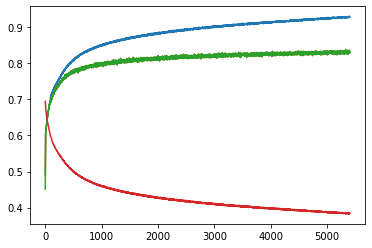

epoch: 0
train_acc: 0.9278888888888889
test_acc: 0.8362222222222222
f1: 0.8362248104463817

epoch: 1
train_acc: 0.9276666666666666
test_acc: 0.8296666666666667
f1: 0.8296678002023136

epoch: 2
train_acc: 0.9276944444444445
test_acc: 0.8291111111111111
f1: 0.8291142927302149

epoch: 3
train_acc: 0.9296111111111112
test_acc: 0.8315555555555556
f1: 0.8315568200188367

epoch: 4
train_acc: 0.9285555555555556
test_acc: 0.831
f1: 0.8309948652874537

epoch: 5
train_acc: 0.9286111111111112
test_acc: 0.8298888888888889
f1: 0.8298774197779734

epoch: 6
train_acc: 0.9296666666666666
test_acc: 0.8306666666666667
f1: 0.8306676450374719

epoch: 7
train_acc: 0.9281666666666667
test_acc: 0.8275555555555556
f1: 0.8275586213708264

epoch: 8
train_acc: 0.9293611111111111
test_acc: 0.8342222222222222
f1: 0.834225537897142

epoch: 9
train_acc: 0.9278055555555556
test_acc: 0.8298888888888889
f1: 0.8298924906786141

epoch: 10
train_acc: 0.9288055555555556
test_acc: 0.8347777777777777
f1: 0.8347804764221

epoc

epoch: 92
train_acc: 0.9289444444444445
test_acc: 0.8314444444444444
f1: 0.8314475139522148

epoch: 93
train_acc: 0.9280555555555555
test_acc: 0.831
f1: 0.830999455444384

epoch: 94
train_acc: 0.9306388888888889
test_acc: 0.8306666666666667
f1: 0.8306569747737231

epoch: 95
train_acc: 0.9285277777777777
test_acc: 0.8283333333333334
f1: 0.828326981609501

epoch: 96
train_acc: 0.92975
test_acc: 0.8358888888888889
f1: 0.8358890570521282

epoch: 97
train_acc: 0.9303611111111111
test_acc: 0.8342222222222222
f1: 0.8342184645775621

epoch: 98
train_acc: 0.9286388888888889
test_acc: 0.8324444444444444
f1: 0.8324470923698397

epoch: 99
train_acc: 0.9289444444444445
test_acc: 0.8337777777777777
f1: 0.8337800106185486

epoch: 100
train_acc: 0.9295833333333333
test_acc: 0.8328888888888889
f1: 0.8328924540273345

epoch: 101
train_acc: 0.9288611111111111
test_acc: 0.8305555555555556
f1: 0.8305538046278788

epoch: 102
train_acc: 0.9283611111111111
test_acc: 0.8333333333333334
f1: 0.8333313991745669



epoch: 182
train_acc: 0.9307222222222222
test_acc: 0.8327777777777777
f1: 0.8327814010165069

epoch: 183
train_acc: 0.9296944444444445
test_acc: 0.8318888888888889
f1: 0.8318858064788803

epoch: 184
train_acc: 0.9306944444444445
test_acc: 0.8248888888888889
f1: 0.8248910076453184

epoch: 185
train_acc: 0.9307222222222222
test_acc: 0.8295555555555556
f1: 0.8295501012945474

epoch: 186
train_acc: 0.9297777777777778
test_acc: 0.8324444444444444
f1: 0.8324440886474447

epoch: 187
train_acc: 0.9289722222222222
test_acc: 0.8332222222222222
f1: 0.8332116697055568

epoch: 188
train_acc: 0.9304166666666667
test_acc: 0.8315555555555556
f1: 0.8315551978710386

epoch: 189
train_acc: 0.9309444444444445
test_acc: 0.831
f1: 0.8309973690192021

epoch: 190
train_acc: 0.9307222222222222
test_acc: 0.8344444444444444
f1: 0.8344466682100461

epoch: 191
train_acc: 0.9305555555555556
test_acc: 0.829
f1: 0.8290035530477688

epoch: 192
train_acc: 0.9288333333333333
test_acc: 0.8353333333333334
f1: 0.8353251771

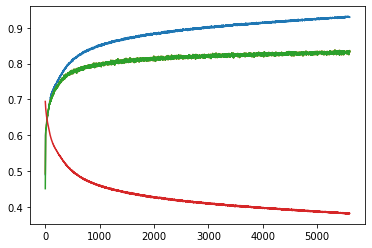

epoch: 0
train_acc: 0.9318888888888889
test_acc: 0.8302222222222222
f1: 0.8302138128621522

epoch: 1
train_acc: 0.9294444444444444
test_acc: 0.8262222222222222
f1: 0.8262245564298739

epoch: 2
train_acc: 0.93125
test_acc: 0.8302222222222222
f1: 0.8302193464731511

epoch: 3
train_acc: 0.9293888888888889
test_acc: 0.8322222222222222
f1: 0.8322225619204556

epoch: 4
train_acc: 0.9303611111111111
test_acc: 0.8347777777777777
f1: 0.8347727578451305

epoch: 5
train_acc: 0.9310833333333334
test_acc: 0.8348888888888889
f1: 0.8348911066846499

epoch: 6
train_acc: 0.9319166666666666
test_acc: 0.8302222222222222
f1: 0.8302257855103874

epoch: 7
train_acc: 0.9304444444444444
test_acc: 0.8302222222222222
f1: 0.830224502701309

epoch: 8
train_acc: 0.9305555555555556
test_acc: 0.8321111111111111
f1: 0.8321145166791444

epoch: 9
train_acc: 0.9302222222222222
test_acc: 0.8373333333333334
f1: 0.8373368679034106

epoch: 10
train_acc: 0.9316666666666666
test_acc: 0.8293333333333334
f1: 0.8293289507602506


epoch: 91
train_acc: 0.9322222222222222
test_acc: 0.8328888888888889
f1: 0.8328923219309177

epoch: 92
train_acc: 0.9323888888888889
test_acc: 0.8341111111111111
f1: 0.8341093969242118

epoch: 93
train_acc: 0.9312777777777778
test_acc: 0.829
f1: 0.8290036712842714

epoch: 94
train_acc: 0.9311388888888888
test_acc: 0.8306666666666667
f1: 0.8306700533709633

epoch: 95
train_acc: 0.9309722222222222
test_acc: 0.8325555555555556
f1: 0.8325591835866449

epoch: 96
train_acc: 0.9313611111111111
test_acc: 0.8345555555555556
f1: 0.8345450874027809

epoch: 97
train_acc: 0.9323055555555556
test_acc: 0.8362222222222222
f1: 0.8362218744471707

epoch: 98
train_acc: 0.9319444444444445
test_acc: 0.8285555555555556
f1: 0.8285583558300609

epoch: 99
train_acc: 0.93125
test_acc: 0.8317777777777777
f1: 0.8317800374842796

epoch: 100
train_acc: 0.9330555555555555
test_acc: 0.8337777777777777
f1: 0.8337805770107577

epoch: 101
train_acc: 0.9325555555555556
test_acc: 0.8322222222222222
f1: 0.8322255778985822


epoch: 182
train_acc: 0.9321388888888889
test_acc: 0.8322222222222222
f1: 0.832225204959482

epoch: 183
train_acc: 0.9326111111111111
test_acc: 0.8293333333333334
f1: 0.8293358365790634

epoch: 184
train_acc: 0.9332222222222222
test_acc: 0.8362222222222222
f1: 0.8362257890159484

epoch: 185
train_acc: 0.9315833333333333
test_acc: 0.8316666666666667
f1: 0.8316668391563806

epoch: 186
train_acc: 0.9331944444444444
test_acc: 0.8352222222222222
f1: 0.8352213169613119

epoch: 187
train_acc: 0.9339444444444445
test_acc: 0.8336666666666667
f1: 0.8336621386790513

epoch: 188
train_acc: 0.9320555555555555
test_acc: 0.8318888888888889
f1: 0.8318924483322947

epoch: 189
train_acc: 0.9310555555555555
test_acc: 0.8314444444444444
f1: 0.8314477635666975

epoch: 190
train_acc: 0.9321666666666667
test_acc: 0.8254444444444444
f1: 0.8254468990060142

epoch: 191
train_acc: 0.9335555555555556
test_acc: 0.8297777777777777
f1: 0.8297717674121164

epoch: 192
train_acc: 0.9317222222222222
test_acc: 0.83277777

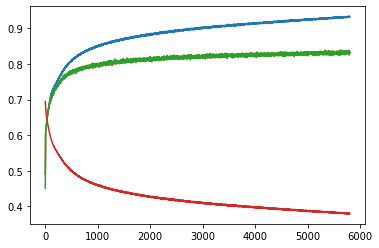

epoch: 0
train_acc: 0.9323055555555556
test_acc: 0.8342222222222222
f1: 0.8342250139706218

epoch: 1
train_acc: 0.9332777777777778
test_acc: 0.8323333333333334
f1: 0.832336071903799

epoch: 2
train_acc: 0.9330277777777778
test_acc: 0.8326666666666667
f1: 0.8326666666666667

epoch: 3
train_acc: 0.9327777777777778
test_acc: 0.8338888888888889
f1: 0.8338715859299254

epoch: 4
train_acc: 0.9323333333333333
test_acc: 0.8337777777777777
f1: 0.8337777777777776

epoch: 5
train_acc: 0.9341944444444444
test_acc: 0.8347777777777777
f1: 0.8347747486952897

epoch: 6
train_acc: 0.9316944444444445
test_acc: 0.83
f1: 0.8300024933433067

epoch: 7
train_acc: 0.9325277777777777
test_acc: 0.833
f1: 0.8330011113529533

epoch: 8
train_acc: 0.9328333333333333
test_acc: 0.8337777777777777
f1: 0.8337811023419066

epoch: 9
train_acc: 0.9317777777777778
test_acc: 0.8316666666666667
f1: 0.8316610035571262

epoch: 10
train_acc: 0.9327222222222222
test_acc: 0.8353333333333334
f1: 0.8353365209855858

epoch: 11
train

epoch: 92
train_acc: 0.9343611111111111
test_acc: 0.8327777777777777
f1: 0.8327810706446142

epoch: 93
train_acc: 0.9341111111111111
test_acc: 0.8317777777777777
f1: 0.8317814330488832

epoch: 94
train_acc: 0.93375
test_acc: 0.8296666666666667
f1: 0.8296603642766117

epoch: 95
train_acc: 0.9348333333333333
test_acc: 0.8268888888888889
f1: 0.826890188291836

epoch: 96
train_acc: 0.9331388888888889
test_acc: 0.8342222222222222
f1: 0.834221870200257

epoch: 97
train_acc: 0.9339166666666666
test_acc: 0.8321111111111111
f1: 0.8321147653611594

epoch: 98
train_acc: 0.9333888888888889
test_acc: 0.8334444444444444
f1: 0.8334463424734042

epoch: 99
train_acc: 0.93475
test_acc: 0.8384444444444444
f1: 0.8384479309153774

epoch: 100
train_acc: 0.9338333333333333
test_acc: 0.8296666666666667
f1: 0.8296661178147539

epoch: 101
train_acc: 0.9329722222222222
test_acc: 0.8344444444444444
f1: 0.8344314939526182

epoch: 102
train_acc: 0.9340833333333334
test_acc: 0.8323333333333334
f1: 0.832321316921812


epoch: 182
train_acc: 0.9335277777777777
test_acc: 0.8291111111111111
f1: 0.8291144193105221

epoch: 183
train_acc: 0.9347222222222222
test_acc: 0.8341111111111111
f1: 0.8341127556663798

epoch: 184
train_acc: 0.9333055555555556
test_acc: 0.8321111111111111
f1: 0.832112228298344

epoch: 185
train_acc: 0.9350555555555555
test_acc: 0.8344444444444444
f1: 0.8344470606439209

epoch: 186
train_acc: 0.934
test_acc: 0.8313333333333334
f1: 0.8313336748312925

epoch: 187
train_acc: 0.9338055555555556
test_acc: 0.8315555555555556
f1: 0.8315558966035834

epoch: 188
train_acc: 0.9325
test_acc: 0.8314444444444444
f1: 0.8314480632852485

epoch: 189
train_acc: 0.9332777777777778
test_acc: 0.8362222222222222
f1: 0.8362244221084616

epoch: 190
train_acc: 0.9343333333333333
test_acc: 0.8318888888888889
f1: 0.8318814898367703

epoch: 191
train_acc: 0.9343888888888889
test_acc: 0.8344444444444444
f1: 0.8344380347253403

epoch: 192
train_acc: 0.9334444444444444
test_acc: 0.8366666666666667
f1: 0.8366699333

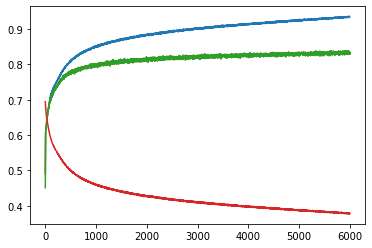

epoch: 0
train_acc: 0.9345
test_acc: 0.8327777777777777
f1: 0.8327782794445001

epoch: 1
train_acc: 0.9339444444444445
test_acc: 0.8362222222222222
f1: 0.8362239691882909

epoch: 2
train_acc: 0.9336111111111111
test_acc: 0.8337777777777777
f1: 0.8337766696291371

epoch: 3
train_acc: 0.9328611111111111
test_acc: 0.8365555555555556
f1: 0.8365409035645858

epoch: 4
train_acc: 0.9337777777777778
test_acc: 0.8307777777777777
f1: 0.8307772325061122

epoch: 5
train_acc: 0.93575
test_acc: 0.8323333333333334
f1: 0.8323307231097804

epoch: 6
train_acc: 0.9345555555555556
test_acc: 0.834
f1: 0.8340036069997919

epoch: 7
train_acc: 0.9338333333333333
test_acc: 0.8364444444444444
f1: 0.8364471986556892

epoch: 8
train_acc: 0.9344722222222223
test_acc: 0.8326666666666667
f1: 0.8326691208987058

epoch: 9
train_acc: 0.9340277777777778
test_acc: 0.8392222222222222
f1: 0.8392235620383769

epoch: 10
train_acc: 0.9338333333333333
test_acc: 0.8346666666666667
f1: 0.8346702591656131

epoch: 11
train_acc: 0.

epoch: 92
train_acc: 0.9341944444444444
test_acc: 0.8328888888888889
f1: 0.8328855879182369

epoch: 93
train_acc: 0.9346944444444445
test_acc: 0.8325555555555556
f1: 0.8325566697853105

epoch: 94
train_acc: 0.9352777777777778
test_acc: 0.8335555555555556
f1: 0.8335583585308254

epoch: 95
train_acc: 0.9355
test_acc: 0.8355555555555556
f1: 0.8355591368681166

epoch: 96
train_acc: 0.9347222222222222
test_acc: 0.834
f1: 0.8340033201195243

epoch: 97
train_acc: 0.9350277777777778
test_acc: 0.8307777777777777
f1: 0.8307814443509235

epoch: 98
train_acc: 0.93525
test_acc: 0.8325555555555556
f1: 0.8325587370286333

epoch: 99
train_acc: 0.9338611111111111
test_acc: 0.8407777777777777
f1: 0.8407748586955952

epoch: 100
train_acc: 0.9341388888888889
test_acc: 0.8336666666666667
f1: 0.8336574730009942

epoch: 101
train_acc: 0.9357777777777778
test_acc: 0.8322222222222222
f1: 0.8322218659533432

epoch: 102
train_acc: 0.9351666666666667
test_acc: 0.8341111111111111
f1: 0.8341147054378638

epoch: 103

epoch: 182
train_acc: 0.9359166666666666
test_acc: 0.8294444444444444
f1: 0.8294431031610542

epoch: 183
train_acc: 0.9362222222222222
test_acc: 0.8283333333333334
f1: 0.8283350351671513

epoch: 184
train_acc: 0.9358888888888889
test_acc: 0.8341111111111111
f1: 0.8341146726993252

epoch: 185
train_acc: 0.9355
test_acc: 0.8343333333333334
f1: 0.8343369392147508

epoch: 186
train_acc: 0.9359166666666666
test_acc: 0.8368888888888889
f1: 0.8368888888888888

epoch: 187
train_acc: 0.9356388888888889
test_acc: 0.8382222222222222
f1: 0.8382211437032243

epoch: 188
train_acc: 0.9362222222222222
test_acc: 0.8313333333333334
f1: 0.831330934514254

epoch: 189
train_acc: 0.9356111111111111
test_acc: 0.8351111111111111
f1: 0.8351087660205223

epoch: 190
train_acc: 0.9360277777777778
test_acc: 0.8356666666666667
f1: 0.8356664942181049

epoch: 191
train_acc: 0.9361666666666667
test_acc: 0.8353333333333334
f1: 0.8353368869440092

epoch: 192
train_acc: 0.9367222222222222
test_acc: 0.8315555555555556
f1:

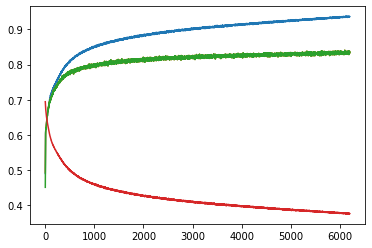

epoch: 0
train_acc: 0.9356944444444445
test_acc: 0.8371111111111111
f1: 0.8371107652235769

epoch: 1
train_acc: 0.9364722222222223
test_acc: 0.8323333333333334
f1: 0.832335243909336

epoch: 2
train_acc: 0.938
test_acc: 0.8326666666666667
f1: 0.8326702365459876

epoch: 3
train_acc: 0.9354722222222223
test_acc: 0.8301111111111111
f1: 0.8301148089005965

epoch: 4
train_acc: 0.9362222222222222
test_acc: 0.8358888888888889
f1: 0.8358922987989307

epoch: 5
train_acc: 0.9376944444444445
test_acc: 0.8348888888888889
f1: 0.8348885382825615

epoch: 6
train_acc: 0.9362222222222222
test_acc: 0.8328888888888889
f1: 0.832875065691328

epoch: 7
train_acc: 0.9353888888888889
test_acc: 0.834
f1: 0.8339929910332338

epoch: 8
train_acc: 0.9353611111111111
test_acc: 0.8322222222222222
f1: 0.8322255778150621

epoch: 9
train_acc: 0.9356944444444445
test_acc: 0.8321111111111111
f1: 0.8321116148185781

epoch: 10
train_acc: 0.9355833333333333
test_acc: 0.8341111111111111
f1: 0.8341132309270671

epoch: 11
train

epoch: 91
train_acc: 0.9377222222222222
test_acc: 0.834
f1: 0.8340006558025986

epoch: 92
train_acc: 0.9371388888888889
test_acc: 0.8325555555555556
f1: 0.8325591835866449

epoch: 93
train_acc: 0.9364722222222223
test_acc: 0.8353333333333334
f1: 0.8353355452785355

epoch: 94
train_acc: 0.9371388888888889
test_acc: 0.8351111111111111
f1: 0.8351133259219518

epoch: 95
train_acc: 0.9377777777777778
test_acc: 0.8344444444444444
f1: 0.8344242087883146

epoch: 96
train_acc: 0.9365277777777777
test_acc: 0.8345555555555556
f1: 0.8345366388138203

epoch: 97
train_acc: 0.9364444444444444
test_acc: 0.8351111111111111
f1: 0.8351078540363452

epoch: 98
train_acc: 0.93575
test_acc: 0.8365555555555556
f1: 0.8365566432469689

epoch: 99
train_acc: 0.9371944444444444
test_acc: 0.834
f1: 0.8340036069848292

epoch: 100
train_acc: 0.93625
test_acc: 0.8398888888888889
f1: 0.839892278947017

epoch: 101
train_acc: 0.9388611111111111
test_acc: 0.836
f1: 0.835997222116735

epoch: 102
train_acc: 0.93716666666666

epoch: 181
train_acc: 0.9376666666666666
test_acc: 0.8333333333333334
f1: 0.8333333333333334

epoch: 182
train_acc: 0.9380277777777778
test_acc: 0.8335555555555556
f1: 0.8335536239756675

epoch: 183
train_acc: 0.9379722222222222
test_acc: 0.8374444444444444
f1: 0.8374449321111652

epoch: 184
train_acc: 0.9372222222222222
test_acc: 0.8315555555555556
f1: 0.8315562210676728

epoch: 185
train_acc: 0.9367777777777778
test_acc: 0.8338888888888889
f1: 0.8338919138817147

epoch: 186
train_acc: 0.9385833333333333
test_acc: 0.837
f1: 0.8370007948767886

epoch: 187
train_acc: 0.9377777777777778
test_acc: 0.8358888888888889
f1: 0.835887987290531

epoch: 188
train_acc: 0.9373055555555555
test_acc: 0.8338888888888889
f1: 0.8338858435100591

epoch: 189
train_acc: 0.9373888888888889
test_acc: 0.8331111111111111
f1: 0.8331087375760273

epoch: 190
train_acc: 0.9371388888888889
test_acc: 0.8386666666666667
f1: 0.8386643721440691

epoch: 191
train_acc: 0.938
test_acc: 0.8331111111111111
f1: 0.83310221022

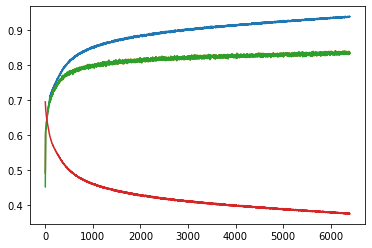

epoch: 0
train_acc: 0.9373888888888889
test_acc: 0.8327777777777777
f1: 0.8327726970793015

epoch: 1
train_acc: 0.9378611111111111
test_acc: 0.8315555555555556
f1: 0.8315568199296686

epoch: 2
train_acc: 0.9388333333333333
test_acc: 0.8341111111111111
f1: 0.8341142630283672

epoch: 3
train_acc: 0.9400555555555555
test_acc: 0.8352222222222222
f1: 0.8352137492614343

epoch: 4
train_acc: 0.9388888888888889
test_acc: 0.8352222222222222
f1: 0.8352166787295169

epoch: 5
train_acc: 0.9380555555555555
test_acc: 0.8323333333333334
f1: 0.8323316007760453

epoch: 6
train_acc: 0.93875
test_acc: 0.8365555555555556
f1: 0.8365569175939547

epoch: 7
train_acc: 0.9373888888888889
test_acc: 0.8335555555555556
f1: 0.8335575693327192

epoch: 8
train_acc: 0.9383611111111111
test_acc: 0.8371111111111111
f1: 0.8371135001577045

epoch: 9
train_acc: 0.9395277777777777
test_acc: 0.8381111111111111
f1: 0.8381124601865342

epoch: 10
train_acc: 0.9384166666666667
test_acc: 0.8353333333333334
f1: 0.8353369113612394

epoch: 91
train_acc: 0.9384722222222223
test_acc: 0.8384444444444444
f1: 0.8384456571948471

epoch: 92
train_acc: 0.9377222222222222
test_acc: 0.8326666666666667
f1: 0.8326694846110968

epoch: 93
train_acc: 0.9389166666666666
test_acc: 0.8327777777777777
f1: 0.8327814010165069

epoch: 94
train_acc: 0.9378055555555556
test_acc: 0.8341111111111111
f1: 0.8341065952223271

epoch: 95
train_acc: 0.9396388888888889
test_acc: 0.8407777777777777
f1: 0.8407734433714633

epoch: 96
train_acc: 0.9382777777777778
test_acc: 0.8388888888888889
f1: 0.838886159938527

epoch: 97
train_acc: 0.94
test_acc: 0.8307777777777777
f1: 0.830781210313701

epoch: 98
train_acc: 0.9383333333333334
test_acc: 0.8352222222222222
f1: 0.8352196566800374

epoch: 99
train_acc: 0.9396944444444445
test_acc: 0.8333333333333334
f1: 0.8333355721442667

epoch: 100
train_acc: 0.9398888888888889
test_acc: 0.8363333333333334
f1: 0.8363368956829833

epoch: 101
train_acc: 0.9383055555555555
test_acc: 0.8347777777777777
f1: 0.834778273

epoch: 182
train_acc: 0.9391111111111111
test_acc: 0.8324444444444444
f1: 0.8324464717824493

epoch: 183
train_acc: 0.9394166666666667
test_acc: 0.8311111111111111
f1: 0.8311143805929736

epoch: 184
train_acc: 0.9406388888888889
test_acc: 0.8382222222222222
f1: 0.8382222222222223

epoch: 185
train_acc: 0.9396388888888889
test_acc: 0.8332222222222222
f1: 0.8332171550272635

epoch: 186
train_acc: 0.9403611111111111
test_acc: 0.8378888888888889
f1: 0.8378887187722887

epoch: 187
train_acc: 0.9403333333333334
test_acc: 0.8343333333333334
f1: 0.8343347138902696

epoch: 188
train_acc: 0.93975
test_acc: 0.8346666666666667
f1: 0.8346679077757445

epoch: 189
train_acc: 0.9398333333333333
test_acc: 0.8392222222222222
f1: 0.8392254835438264

epoch: 190
train_acc: 0.9408611111111111
test_acc: 0.8353333333333334
f1: 0.835336911346397

epoch: 191
train_acc: 0.9403055555555555
test_acc: 0.8337777777777777
f1: 0.8337735093342025

epoch: 192
train_acc: 0.9406388888888889
test_acc: 0.8353333333333334
f1

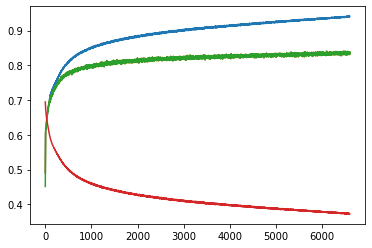

epoch: 0
train_acc: 0.9400555555555555
test_acc: 0.8366666666666667
f1: 0.836670191532411

epoch: 1
train_acc: 0.9391666666666667
test_acc: 0.835
f1: 0.8350030046528136

epoch: 2
train_acc: 0.9400277777777778
test_acc: 0.8357777777777777
f1: 0.8357770641205723

epoch: 3
train_acc: 0.9399166666666666
test_acc: 0.8363333333333334
f1: 0.8363368956829833

epoch: 4
train_acc: 0.9389722222222222
test_acc: 0.8374444444444444
f1: 0.8374400192968952

epoch: 5
train_acc: 0.9411666666666667
test_acc: 0.8333333333333334
f1: 0.8333365597020099

epoch: 6
train_acc: 0.9404166666666667
test_acc: 0.8321111111111111
f1: 0.8321144171947985

epoch: 7
train_acc: 0.9399722222222222
test_acc: 0.8366666666666667
f1: 0.8366699334509377

epoch: 8
train_acc: 0.9401666666666667
test_acc: 0.8414444444444444
f1: 0.8414478798793247

epoch: 9
train_acc: 0.9401666666666667
test_acc: 0.8358888888888889
f1: 0.8358871930723782

epoch: 10
train_acc: 0.9401944444444444
test_acc: 0.8352222222222222
f1: 0.8352200963822839

e

epoch: 92
train_acc: 0.9415
test_acc: 0.8394444444444444
f1: 0.8394470669803561

epoch: 93
train_acc: 0.9416388888888889
test_acc: 0.8348888888888889
f1: 0.8348923542907704

epoch: 94
train_acc: 0.9413611111111111
test_acc: 0.833
f1: 0.8330031730285573

epoch: 95
train_acc: 0.9403055555555555
test_acc: 0.8323333333333334
f1: 0.832336071903799

epoch: 96
train_acc: 0.9417777777777778
test_acc: 0.8356666666666667
f1: 0.835668539259051

epoch: 97
train_acc: 0.9417222222222222
test_acc: 0.841
f1: 0.8410034450646907

epoch: 98
train_acc: 0.9411666666666667
test_acc: 0.8332222222222222
f1: 0.8332256051745668

epoch: 99
train_acc: 0.94025
test_acc: 0.8324444444444444
f1: 0.8324480604291671

epoch: 100
train_acc: 0.9411111111111111
test_acc: 0.8392222222222222
f1: 0.8392217041604363

epoch: 101
train_acc: 0.9414166666666667
test_acc: 0.8355555555555556
f1: 0.8355480194383362

epoch: 102
train_acc: 0.9414722222222223
test_acc: 0.8347777777777777
f1: 0.8347742754621268

epoch: 103
train_acc: 0.9

epoch: 183
train_acc: 0.9422777777777778
test_acc: 0.8401111111111111
f1: 0.8401140227931687

epoch: 184
train_acc: 0.9408333333333333
test_acc: 0.8392222222222222
f1: 0.8392254835438264

epoch: 185
train_acc: 0.9421111111111111
test_acc: 0.8373333333333334
f1: 0.83733680361108

epoch: 186
train_acc: 0.9424166666666667
test_acc: 0.8354444444444444
f1: 0.8354471321998186

epoch: 187
train_acc: 0.9423888888888889
test_acc: 0.8347777777777777
f1: 0.834779660499127

epoch: 188
train_acc: 0.9422222222222222
test_acc: 0.8372222222222222
f1: 0.8372192379546733

epoch: 189
train_acc: 0.9426388888888889
test_acc: 0.8371111111111111
f1: 0.8370997850351913

epoch: 190
train_acc: 0.9431388888888889
test_acc: 0.8356666666666667
f1: 0.8356649685538574

epoch: 191
train_acc: 0.942
test_acc: 0.8356666666666667
f1: 0.8356680361124805

epoch: 192
train_acc: 0.9414722222222223
test_acc: 0.8345555555555556
f1: 0.8345588135030146

epoch: 193
train_acc: 0.9411666666666667
test_acc: 0.8334444444444444
f1: 0.

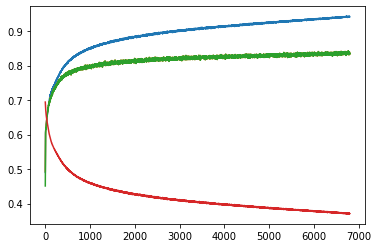

epoch: 0
train_acc: 0.9418611111111111
test_acc: 0.8353333333333334
f1: 0.835330991403244

epoch: 1
train_acc: 0.9423611111111111
test_acc: 0.8341111111111111
f1: 0.8340912750901718

epoch: 2
train_acc: 0.9431944444444444
test_acc: 0.8364444444444444
f1: 0.8364444444444444

epoch: 3
train_acc: 0.9426666666666667
test_acc: 0.8373333333333334
f1: 0.8373353014039393

epoch: 4
train_acc: 0.9404444444444444
test_acc: 0.8346666666666667
f1: 0.8346702591805157

epoch: 5
train_acc: 0.9411388888888889
test_acc: 0.8366666666666667
f1: 0.8366694171357764

epoch: 6
train_acc: 0.9418611111111111
test_acc: 0.8348888888888889
f1: 0.8348851463554001

epoch: 7
train_acc: 0.9409444444444445
test_acc: 0.834
f1: 0.8339946879622255

epoch: 8
train_acc: 0.9425555555555556
test_acc: 0.8363333333333334
f1: 0.8363278272208892

epoch: 9
train_acc: 0.94125
test_acc: 0.8388888888888889
f1: 0.8388888888888889

epoch: 10
train_acc: 0.9424444444444444
test_acc: 0.835
f1: 0.8350035913782772

epoch: 11
train_acc: 0.94

epoch: 92
train_acc: 0.943
test_acc: 0.8317777777777777
f1: 0.8317729346102923

epoch: 93
train_acc: 0.94325
test_acc: 0.8352222222222222
f1: 0.8352182410919963

epoch: 94
train_acc: 0.9434722222222223
test_acc: 0.8405555555555555
f1: 0.8405501914881031

epoch: 95
train_acc: 0.9436944444444444
test_acc: 0.8351111111111111
f1: 0.835110760976663

epoch: 96
train_acc: 0.9429722222222222
test_acc: 0.8346666666666667
f1: 0.8346670014156544

epoch: 97
train_acc: 0.942
test_acc: 0.8364444444444444
f1: 0.8364466413457636

epoch: 98
train_acc: 0.9424444444444444
test_acc: 0.8376666666666667
f1: 0.8376653900444953

epoch: 99
train_acc: 0.9420555555555555
test_acc: 0.8347777777777777
f1: 0.8347742754621268

epoch: 100
train_acc: 0.9425555555555556
test_acc: 0.8427777777777777
f1: 0.8427665099034882

epoch: 101
train_acc: 0.9439444444444445
test_acc: 0.836
f1: 0.8359615826210567

epoch: 102
train_acc: 0.9423055555555555
test_acc: 0.8435555555555555
f1: 0.8435478066164336

epoch: 103
train_acc: 0.9

epoch: 183
train_acc: 0.9430833333333334
test_acc: 0.8347777777777777
f1: 0.8347806396085394

epoch: 184
train_acc: 0.9421388888888889
test_acc: 0.8337777777777777
f1: 0.8337795508179668

epoch: 185
train_acc: 0.9431388888888889
test_acc: 0.8357777777777777
f1: 0.8357683784222854

epoch: 186
train_acc: 0.9425833333333333
test_acc: 0.8353333333333334
f1: 0.8353114171104177

epoch: 187
train_acc: 0.9433611111111111
test_acc: 0.8365555555555556
f1: 0.8365401286488374

epoch: 188
train_acc: 0.9439722222222222
test_acc: 0.8366666666666667
f1: 0.8366697075150898

epoch: 189
train_acc: 0.9453333333333334
test_acc: 0.8365555555555556
f1: 0.8365550289011761

epoch: 190
train_acc: 0.9441666666666667
test_acc: 0.837
f1: 0.8369998289353587

epoch: 191
train_acc: 0.9439722222222222
test_acc: 0.8372222222222222
f1: 0.8372256687421096

epoch: 192
train_acc: 0.9425
test_acc: 0.8344444444444444
f1: 0.8344401931202952

epoch: 193
train_acc: 0.9435833333333333
test_acc: 0.8396666666666667
f1: 0.839666498

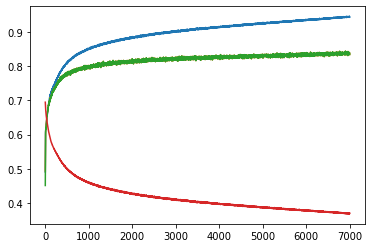

epoch: 0
train_acc: 0.9443611111111111
test_acc: 0.8397777777777777
f1: 0.8397784107545833

epoch: 1
train_acc: 0.9429444444444445
test_acc: 0.8361111111111111
f1: 0.8361145164673744

epoch: 2
train_acc: 0.9423333333333334
test_acc: 0.8423333333333334
f1: 0.8423351300665514

epoch: 3
train_acc: 0.9446666666666667
test_acc: 0.839
f1: 0.8390032658293052

epoch: 4
train_acc: 0.9436944444444444
test_acc: 0.8381111111111111
f1: 0.8381033943036592

epoch: 5
train_acc: 0.94375
test_acc: 0.8371111111111111
f1: 0.8371092207932768

epoch: 6
train_acc: 0.9438333333333333
test_acc: 0.8323333333333334
f1: 0.8323183028408973

epoch: 7
train_acc: 0.943
test_acc: 0.8384444444444444
f1: 0.8384437423757187

epoch: 8
train_acc: 0.9436388888888889
test_acc: 0.8345555555555556
f1: 0.8345591566075791

epoch: 9
train_acc: 0.9435833333333333
test_acc: 0.8371111111111111
f1: 0.8371146263562196

epoch: 10
train_acc: 0.9432222222222222
test_acc: 0.837
f1: 0.8370035478390607

epoch: 11
train_acc: 0.94402777777777

epoch: 91
train_acc: 0.9441666666666667
test_acc: 0.8366666666666667
f1: 0.836670191532411

epoch: 92
train_acc: 0.9443611111111111
test_acc: 0.8333333333333334
f1: 0.8333369548040455

epoch: 93
train_acc: 0.9439722222222222
test_acc: 0.8357777777777777
f1: 0.8357805432154269

epoch: 94
train_acc: 0.9436666666666667
test_acc: 0.8393333333333334
f1: 0.8393329921645922

epoch: 95
train_acc: 0.9441111111111111
test_acc: 0.8347777777777777
f1: 0.8347794157239831

epoch: 96
train_acc: 0.9444444444444444
test_acc: 0.8377777777777777
f1: 0.8377806618565763

epoch: 97
train_acc: 0.9450555555555555
test_acc: 0.8348888888888889
f1: 0.8348881713003937

epoch: 98
train_acc: 0.9445
test_acc: 0.8376666666666667
f1: 0.8376693181255469

epoch: 99
train_acc: 0.9445833333333333
test_acc: 0.8367777777777777
f1: 0.8367743178573399

epoch: 100
train_acc: 0.9451944444444444
test_acc: 0.8395555555555556
f1: 0.8395295654636088

epoch: 101
train_acc: 0.9439722222222222
test_acc: 0.8383333333333334
f1: 0.838317

epoch: 182
train_acc: 0.9460277777777778
test_acc: 0.8341111111111111
f1: 0.8341101997459466

epoch: 183
train_acc: 0.9460277777777778
test_acc: 0.8364444444444444
f1: 0.836442546389975

epoch: 184
train_acc: 0.9446111111111111
test_acc: 0.8387777777777777
f1: 0.8387805703241362

epoch: 185
train_acc: 0.9458055555555556
test_acc: 0.8383333333333334
f1: 0.8383341217080623

epoch: 186
train_acc: 0.946
test_acc: 0.8366666666666667
f1: 0.8366695703910191

epoch: 187
train_acc: 0.9460555555555555
test_acc: 0.8398888888888889
f1: 0.8398854949165601

epoch: 188
train_acc: 0.94575
test_acc: 0.8394444444444444
f1: 0.8394446089643368

epoch: 189
train_acc: 0.9453611111111111
test_acc: 0.8445555555555555
f1: 0.8445361392764924

epoch: 190
train_acc: 0.9465555555555556
test_acc: 0.8393333333333334
f1: 0.8393185514678528

epoch: 191
train_acc: 0.9439166666666666
test_acc: 0.8357777777777777
f1: 0.8357719792657363

epoch: 192
train_acc: 0.9443611111111111
test_acc: 0.8397777777777777
f1: 0.839781259

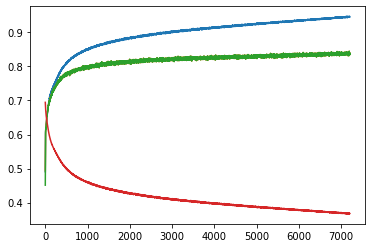

epoch: 0
train_acc: 0.9445833333333333
test_acc: 0.843
f1: 0.8430028590734869

epoch: 1
train_acc: 0.9448611111111112
test_acc: 0.8388888888888889
f1: 0.838892365797276

epoch: 2
train_acc: 0.9456666666666667
test_acc: 0.8384444444444444
f1: 0.8384397932122623

epoch: 3
train_acc: 0.9450833333333334
test_acc: 0.8385555555555556
f1: 0.8385506504028074

epoch: 4
train_acc: 0.9466944444444444
test_acc: 0.8353333333333334
f1: 0.8353225748768157

epoch: 5
train_acc: 0.9447777777777778
test_acc: 0.8367777777777777
f1: 0.8367808790279113

epoch: 6
train_acc: 0.9456944444444444
test_acc: 0.8377777777777777
f1: 0.8377811103850662

epoch: 7
train_acc: 0.9448333333333333
test_acc: 0.841
f1: 0.8410001629259279

epoch: 8
train_acc: 0.9453611111111111
test_acc: 0.8384444444444444
f1: 0.8384345514643909

epoch: 9
train_acc: 0.9451388888888889
test_acc: 0.8384444444444444
f1: 0.8384387400895675

epoch: 10
train_acc: 0.9451111111111111
test_acc: 0.8394444444444444
f1: 0.8394300514281621

epoch: 11
trai

epoch: 91
train_acc: 0.9459722222222222
test_acc: 0.8395555555555556
f1: 0.8395590180480091

epoch: 92
train_acc: 0.9470277777777778
test_acc: 0.839
f1: 0.8389991154935542

epoch: 93
train_acc: 0.9460277777777778
test_acc: 0.8373333333333334
f1: 0.8373305780344852

epoch: 94
train_acc: 0.9454722222222223
test_acc: 0.8376666666666667
f1: 0.8376674582924254

epoch: 95
train_acc: 0.9457222222222222
test_acc: 0.8404444444444444
f1: 0.8404450747875045

epoch: 96
train_acc: 0.9477222222222222
test_acc: 0.8383333333333334
f1: 0.8383366924525689

epoch: 97
train_acc: 0.9482222222222222
test_acc: 0.8392222222222222
f1: 0.8392250070703137

epoch: 98
train_acc: 0.9471388888888889
test_acc: 0.8385555555555556
f1: 0.8385550353456211

epoch: 99
train_acc: 0.9464722222222223
test_acc: 0.8357777777777777
f1: 0.8357719792657363

epoch: 100
train_acc: 0.94675
test_acc: 0.8352222222222222
f1: 0.8352192012879047

epoch: 101
train_acc: 0.9460833333333334
test_acc: 0.8364444444444444
f1: 0.8364412137072104


epoch: 181
train_acc: 0.9471666666666667
test_acc: 0.8367777777777777
f1: 0.8367764941652043

epoch: 182
train_acc: 0.9486944444444444
test_acc: 0.8358888888888889
f1: 0.8358920070280633

epoch: 183
train_acc: 0.9472777777777778
test_acc: 0.8381111111111111
f1: 0.8381144748476926

epoch: 184
train_acc: 0.9461944444444444
test_acc: 0.8371111111111111
f1: 0.837112052247332

epoch: 185
train_acc: 0.9475
test_acc: 0.8391111111111111
f1: 0.8391107694704907

epoch: 186
train_acc: 0.9465833333333333
test_acc: 0.8373333333333334
f1: 0.8373213238014957

epoch: 187
train_acc: 0.9480833333333333
test_acc: 0.8366666666666667
f1: 0.8366516394590205

epoch: 188
train_acc: 0.94825
test_acc: 0.8385555555555556
f1: 0.8385557209862846

epoch: 189
train_acc: 0.9467222222222222
test_acc: 0.8377777777777777
f1: 0.8377774333058816

epoch: 190
train_acc: 0.9475277777777777
test_acc: 0.8376666666666667
f1: 0.8376698632636421

epoch: 191
train_acc: 0.9492222222222222
test_acc: 0.8391111111111111
f1: 0.83911382

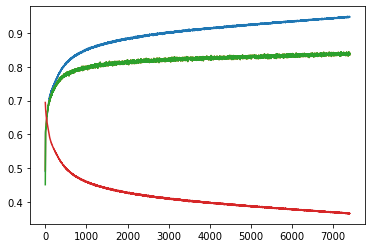

epoch: 0
train_acc: 0.9469444444444445
test_acc: 0.8366666666666667
f1: 0.8366608995403468

epoch: 1
train_acc: 0.9465555555555556
test_acc: 0.8396666666666667
f1: 0.8396571711920664

epoch: 2
train_acc: 0.9467222222222222
test_acc: 0.8353333333333334
f1: 0.8353350897809002

epoch: 3
train_acc: 0.9490277777777778
test_acc: 0.839
f1: 0.8390007851236991

epoch: 4
train_acc: 0.94775
test_acc: 0.839
f1: 0.8390034566251319

epoch: 5
train_acc: 0.9476388888888889
test_acc: 0.8407777777777777
f1: 0.8407805356819346

epoch: 6
train_acc: 0.94775
test_acc: 0.8331111111111111
f1: 0.8331015591273833

epoch: 7
train_acc: 0.9471388888888889
test_acc: 0.8391111111111111
f1: 0.8391059626300552

epoch: 8
train_acc: 0.9476944444444444
test_acc: 0.8362222222222222
f1: 0.8362218744471707

epoch: 9
train_acc: 0.9483888888888888
test_acc: 0.839
f1: 0.8390020572279369

epoch: 10
train_acc: 0.9478611111111112
test_acc: 0.8371111111111111
f1: 0.8371145298723212

epoch: 11
train_acc: 0.9467222222222222
test_acc

epoch: 92
train_acc: 0.94825
test_acc: 0.8402222222222222
f1: 0.8402254178132844

epoch: 93
train_acc: 0.9481388888888889
test_acc: 0.8362222222222222
f1: 0.8362194481030266

epoch: 94
train_acc: 0.94775
test_acc: 0.8394444444444444
f1: 0.8394405653256471

epoch: 95
train_acc: 0.9478333333333333
test_acc: 0.8415555555555555
f1: 0.8415541158616883

epoch: 96
train_acc: 0.9478888888888889
test_acc: 0.8363333333333334
f1: 0.8363320462255589

epoch: 97
train_acc: 0.9480555555555555
test_acc: 0.8395555555555556
f1: 0.8395532736749557

epoch: 98
train_acc: 0.9478611111111112
test_acc: 0.8426666666666667
f1: 0.8426681040346963

epoch: 99
train_acc: 0.9486388888888889
test_acc: 0.8395555555555556
f1: 0.8395570213461169

epoch: 100
train_acc: 0.9483611111111111
test_acc: 0.8362222222222222
f1: 0.8362153070836589

epoch: 101
train_acc: 0.9497777777777778
test_acc: 0.8388888888888889
f1: 0.8388832002268727

epoch: 102
train_acc: 0.9479444444444445
test_acc: 0.838
f1: 0.8380019600047427

epoch: 10

epoch: 184
train_acc: 0.9494166666666667
test_acc: 0.8374444444444444
f1: 0.8374478220330641

epoch: 185
train_acc: 0.9486388888888889
test_acc: 0.8403333333333334
f1: 0.8403360989357572

epoch: 186
train_acc: 0.9494722222222223
test_acc: 0.8451111111111111
f1: 0.8451122737348006

epoch: 187
train_acc: 0.9489444444444445
test_acc: 0.8354444444444444
f1: 0.8354423214714514

epoch: 188
train_acc: 0.9490277777777778
test_acc: 0.8436666666666667
f1: 0.8436561264713314

epoch: 189
train_acc: 0.9489444444444445
test_acc: 0.8368888888888889
f1: 0.8368738821264232

epoch: 190
train_acc: 0.9481388888888889
test_acc: 0.8414444444444444
f1: 0.8414475667352597

epoch: 191
train_acc: 0.9494444444444444
test_acc: 0.8357777777777777
f1: 0.8357813218264649

epoch: 192
train_acc: 0.9483055555555555
test_acc: 0.8387777777777777
f1: 0.8387805703241362

epoch: 193
train_acc: 0.9491944444444445
test_acc: 0.8363333333333334
f1: 0.8363341314611517

epoch: 194
train_acc: 0.9498055555555556
test_acc: 0.8375555

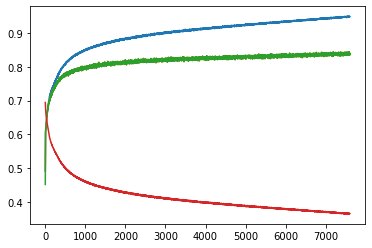

epoch: 0
train_acc: 0.9486388888888889
test_acc: 0.8378888888888889
f1: 0.8378872137390656

epoch: 1
train_acc: 0.9485555555555556
test_acc: 0.8368888888888889
f1: 0.8368878014809982

epoch: 2
train_acc: 0.9503333333333334
test_acc: 0.8388888888888889
f1: 0.8388903607699927

epoch: 3
train_acc: 0.9496666666666667
test_acc: 0.8393333333333334
f1: 0.8393367609437307

epoch: 4
train_acc: 0.9495277777777777
test_acc: 0.8394444444444444
f1: 0.8394423730764667

epoch: 5
train_acc: 0.94875
test_acc: 0.8391111111111111
f1: 0.8391143289246424

epoch: 6
train_acc: 0.9494444444444444
test_acc: 0.8396666666666667
f1: 0.8396674485393361

epoch: 7
train_acc: 0.9494444444444444
test_acc: 0.8362222222222222
f1: 0.8362248103282814

epoch: 8
train_acc: 0.9493888888888888
test_acc: 0.8375555555555556
f1: 0.8375581225915519

epoch: 9
train_acc: 0.9486944444444444
test_acc: 0.8381111111111111
f1: 0.8381039859168371

epoch: 10
train_acc: 0.949
test_acc: 0.8391111111111111
f1: 0.8391074642817091

epoch: 11
t

epoch: 93
train_acc: 0.9492222222222222
test_acc: 0.8414444444444444
f1: 0.8414474570271132

epoch: 94
train_acc: 0.9501111111111111
test_acc: 0.8406666666666667
f1: 0.840652007472269

epoch: 95
train_acc: 0.9505277777777777
test_acc: 0.8382222222222222
f1: 0.8382159587651646

epoch: 96
train_acc: 0.9498888888888889
test_acc: 0.8377777777777777
f1: 0.8377792598097858

epoch: 97
train_acc: 0.95
test_acc: 0.8395555555555556
f1: 0.8395585426202652

epoch: 98
train_acc: 0.9502222222222222
test_acc: 0.8374444444444444
f1: 0.8374452372147176

epoch: 99
train_acc: 0.9499444444444445
test_acc: 0.8433333333333334
f1: 0.8433366215006636

epoch: 100
train_acc: 0.9497222222222222
test_acc: 0.8381111111111111
f1: 0.8381105894690778

epoch: 101
train_acc: 0.9504166666666667
test_acc: 0.8428888888888889
f1: 0.8428870656218916

epoch: 102
train_acc: 0.9511111111111111
test_acc: 0.8372222222222222
f1: 0.8371991886560866

epoch: 103
train_acc: 0.9505555555555556
test_acc: 0.8395555555555556
f1: 0.839554

epoch: 183
train_acc: 0.9505555555555556
test_acc: 0.8407777777777777
f1: 0.8407802054360597

epoch: 184
train_acc: 0.9503333333333334
test_acc: 0.8417777777777777
f1: 0.8417802782060023

epoch: 185
train_acc: 0.9511666666666667
test_acc: 0.8331111111111111
f1: 0.8331146715086809

epoch: 186
train_acc: 0.9505555555555556
test_acc: 0.8403333333333334
f1: 0.8403289868281876

epoch: 187
train_acc: 0.9496666666666667
test_acc: 0.8397777777777777
f1: 0.8397652444830035

epoch: 188
train_acc: 0.9509444444444445
test_acc: 0.841
f1: 0.8410001629259279

epoch: 189
train_acc: 0.9516111111111111
test_acc: 0.8378888888888889
f1: 0.8378867974522941

epoch: 190
train_acc: 0.95
test_acc: 0.8408888888888889
f1: 0.8408915682574366

epoch: 191
train_acc: 0.9500833333333333
test_acc: 0.8428888888888889
f1: 0.8428913716446336

epoch: 192
train_acc: 0.9492222222222222
test_acc: 0.8437777777777777
f1: 0.8437806862355214

epoch: 193
train_acc: 0.95025
test_acc: 0.8385555555555556
f1: 0.8385590695438632

epoc

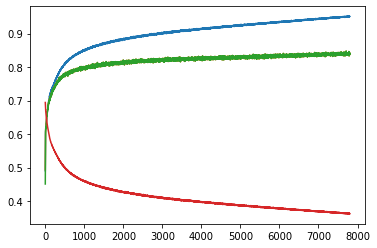

epoch: 0
train_acc: 0.9499722222222222
test_acc: 0.8394444444444444
f1: 0.8394460361272061

epoch: 1
train_acc: 0.9488333333333333
test_acc: 0.8414444444444444
f1: 0.8414442780589828

epoch: 2
train_acc: 0.9503611111111111
test_acc: 0.8394444444444444
f1: 0.839440073741636

epoch: 3
train_acc: 0.9500555555555555
test_acc: 0.8374444444444444
f1: 0.8374405170044441

epoch: 4
train_acc: 0.9507222222222222
test_acc: 0.8413333333333334
f1: 0.8413364048363134

epoch: 5
train_acc: 0.9508333333333333
test_acc: 0.838
f1: 0.8380021761242272

epoch: 6
train_acc: 0.9503611111111111
test_acc: 0.8405555555555555
f1: 0.8405581599424298

epoch: 7
train_acc: 0.9501944444444445
test_acc: 0.838
f1: 0.8380027280163007

epoch: 8
train_acc: 0.9501111111111111
test_acc: 0.84
f1: 0.839995393552722

epoch: 9
train_acc: 0.9527777777777777
test_acc: 0.8391111111111111
f1: 0.8391005994747837

epoch: 10
train_acc: 0.9503888888888888
test_acc: 0.8431111111111111
f1: 0.8431075549487383

epoch: 11
train_acc: 0.950666

epoch: 91
train_acc: 0.9529722222222222
test_acc: 0.8406666666666667
f1: 0.8406691845391829

epoch: 92
train_acc: 0.9513055555555555
test_acc: 0.8427777777777777
f1: 0.8427808737289895

epoch: 93
train_acc: 0.9525555555555556
test_acc: 0.839
f1: 0.8390033452671976

epoch: 94
train_acc: 0.9518611111111112
test_acc: 0.8388888888888889
f1: 0.8388916019366502

epoch: 95
train_acc: 0.9507777777777778
test_acc: 0.8403333333333334
f1: 0.8403263059454322

epoch: 96
train_acc: 0.9508611111111112
test_acc: 0.8407777777777777
f1: 0.8407718865025341

epoch: 97
train_acc: 0.9513888888888888
test_acc: 0.8423333333333334
f1: 0.8423269545798618

epoch: 98
train_acc: 0.9515833333333333
test_acc: 0.8383333333333334
f1: 0.8383328124073495

epoch: 99
train_acc: 0.9504166666666667
test_acc: 0.8446666666666667
f1: 0.8446697733678522

epoch: 100
train_acc: 0.9522777777777778
test_acc: 0.8384444444444444
f1: 0.8384477633560865

epoch: 101
train_acc: 0.952
test_acc: 0.8367777777777777
f1: 0.8367756720064565

e

epoch: 181
train_acc: 0.9522222222222222
test_acc: 0.8423333333333334
f1: 0.8423246186963333

epoch: 182
train_acc: 0.9524444444444444
test_acc: 0.8391111111111111
f1: 0.8391107694704907

epoch: 183
train_acc: 0.9525
test_acc: 0.837
f1: 0.8370029682327796

epoch: 184
train_acc: 0.9529722222222222
test_acc: 0.8404444444444444
f1: 0.8404467846019532

epoch: 185
train_acc: 0.9525277777777778
test_acc: 0.8413333333333334
f1: 0.8413342500744815

epoch: 186
train_acc: 0.9524166666666667
test_acc: 0.8462222222222222
f1: 0.8462222222222222

epoch: 187
train_acc: 0.9521666666666667
test_acc: 0.8424444444444444
f1: 0.8424354266595403

epoch: 188
train_acc: 0.95275
test_acc: 0.843
f1: 0.8429759694879393

epoch: 189
train_acc: 0.9512222222222222
test_acc: 0.8413333333333334
f1: 0.841328765273116

epoch: 190
train_acc: 0.9527222222222222
test_acc: 0.8416666666666667
f1: 0.8416696750270752

epoch: 191
train_acc: 0.9516944444444444
test_acc: 0.8394444444444444
f1: 0.8394477011840433

epoch: 192
train

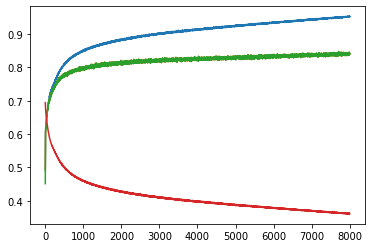

epoch: 0
train_acc: 0.9529166666666666
test_acc: 0.8402222222222222
f1: 0.840216036198013

epoch: 1
train_acc: 0.9532777777777778
test_acc: 0.8387777777777777
f1: 0.8387782614444982

epoch: 2
train_acc: 0.9530555555555555
test_acc: 0.8432222222222222
f1: 0.8432237764536249

epoch: 3
train_acc: 0.9525555555555556
test_acc: 0.8382222222222222
f1: 0.8382252341101842

epoch: 4
train_acc: 0.9524166666666667
test_acc: 0.8397777777777777
f1: 0.8397808794835975

epoch: 5
train_acc: 0.9531388888888889
test_acc: 0.8396666666666667
f1: 0.8396668309588496

epoch: 6
train_acc: 0.9536388888888889
test_acc: 0.8402222222222222
f1: 0.8402247471180928

epoch: 7
train_acc: 0.9537222222222222
test_acc: 0.8402222222222222
f1: 0.8402143081778631

epoch: 8
train_acc: 0.9523611111111111
test_acc: 0.8458888888888889
f1: 0.8458826539832757

epoch: 9
train_acc: 0.9523611111111111
test_acc: 0.8367777777777777
f1: 0.8367807500572279

epoch: 10
train_acc: 0.9536666666666667
test_acc: 0.8406666666666667
f1: 0.840667

epoch: 91
train_acc: 0.9526388888888889
test_acc: 0.8415555555555555
f1: 0.8415533021194507

epoch: 92
train_acc: 0.9516111111111111
test_acc: 0.8437777777777777
f1: 0.8437662440334038

epoch: 93
train_acc: 0.9529722222222222
test_acc: 0.8402222222222222
f1: 0.8402075221374635

epoch: 94
train_acc: 0.9538055555555556
test_acc: 0.8417777777777777
f1: 0.8417721911193564

epoch: 95
train_acc: 0.9532222222222222
test_acc: 0.8402222222222222
f1: 0.8402186005781062

epoch: 96
train_acc: 0.9529166666666666
test_acc: 0.8426666666666667
f1: 0.8426681040346963

epoch: 97
train_acc: 0.9518611111111112
test_acc: 0.8384444444444444
f1: 0.8384463990719452

epoch: 98
train_acc: 0.9527777777777777
test_acc: 0.8406666666666667
f1: 0.840662079412919

epoch: 99
train_acc: 0.9529444444444445
test_acc: 0.8418888888888889
f1: 0.8418716227527769

epoch: 100
train_acc: 0.954
test_acc: 0.8392222222222222
f1: 0.8392133356262116

epoch: 101
train_acc: 0.9533333333333334
test_acc: 0.8415555555555555
f1: 0.8415555

epoch: 180
train_acc: 0.9555555555555556
test_acc: 0.8412222222222222
f1: 0.8412253488047532

epoch: 181
train_acc: 0.954
test_acc: 0.8426666666666667
f1: 0.8426693160981357

epoch: 182
train_acc: 0.9543611111111111
test_acc: 0.8453333333333334
f1: 0.845330713540986

epoch: 183
train_acc: 0.9547222222222222
test_acc: 0.8402222222222222
f1: 0.8402181192664325

epoch: 184
train_acc: 0.9539444444444445
test_acc: 0.8423333333333334
f1: 0.8423295240118291

epoch: 185
train_acc: 0.9536388888888889
test_acc: 0.839
f1: 0.8389998310493806

epoch: 186
train_acc: 0.9533055555555555
test_acc: 0.8361111111111111
f1: 0.8361139498470717

epoch: 187
train_acc: 0.9536388888888889
test_acc: 0.8411111111111111
f1: 0.8411130334751593

epoch: 188
train_acc: 0.9541111111111111
test_acc: 0.8397777777777777
f1: 0.8397812671377188

epoch: 189
train_acc: 0.9539166666666666
test_acc: 0.8456666666666667
f1: 0.845668425308196

epoch: 190
train_acc: 0.9540833333333333
test_acc: 0.8407777777777777
f1: 0.840780378421

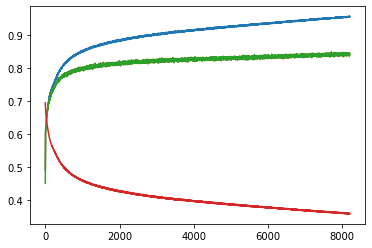

epoch: 0
train_acc: 0.9542777777777778
test_acc: 0.8435555555555555
f1: 0.843545975558365

epoch: 1
train_acc: 0.9535277777777778
test_acc: 0.8425555555555555
f1: 0.8425539286280026

epoch: 2
train_acc: 0.9547222222222222
test_acc: 0.837
f1: 0.8369945163157123

epoch: 3
train_acc: 0.9538333333333333
test_acc: 0.8402222222222222
f1: 0.8402254178132844

epoch: 4
train_acc: 0.9547222222222222
test_acc: 0.8443333333333334
f1: 0.8443348765496304

epoch: 5
train_acc: 0.9545277777777778
test_acc: 0.844
f1: 0.8440000000000001

epoch: 6
train_acc: 0.9539722222222222
test_acc: 0.8434444444444444
f1: 0.8434424246814821

epoch: 7
train_acc: 0.9548888888888889
test_acc: 0.8458888888888889
f1: 0.8458797619150354

epoch: 8
train_acc: 0.9544444444444444
test_acc: 0.8427777777777777
f1: 0.8427810445500927

epoch: 9
train_acc: 0.9537222222222222
test_acc: 0.8401111111111111
f1: 0.8401137226438479

epoch: 10
train_acc: 0.9543888888888888
test_acc: 0.8411111111111111
f1: 0.8411143752401676

epoch: 11
trai

epoch: 91
train_acc: 0.9543888888888888
test_acc: 0.8436666666666667
f1: 0.8436642328796957

epoch: 92
train_acc: 0.9550555555555555
test_acc: 0.8415555555555555
f1: 0.8415445385130851

epoch: 93
train_acc: 0.9542777777777778
test_acc: 0.8445555555555555
f1: 0.8445550546789568

epoch: 94
train_acc: 0.9551388888888889
test_acc: 0.8441111111111111
f1: 0.8441144887881457

epoch: 95
train_acc: 0.9550277777777778
test_acc: 0.8435555555555555
f1: 0.8435567298555232

epoch: 96
train_acc: 0.9546388888888889
test_acc: 0.8428888888888889
f1: 0.8428862276917773

epoch: 97
train_acc: 0.9541111111111111
test_acc: 0.8415555555555555
f1: 0.8415509938931816

epoch: 98
train_acc: 0.9546944444444444
test_acc: 0.844
f1: 0.8440003158518674

epoch: 99
train_acc: 0.9554166666666667
test_acc: 0.8423333333333334
f1: 0.8423334948930062

epoch: 100
train_acc: 0.9542777777777778
test_acc: 0.8435555555555555
f1: 0.8435537400251933

epoch: 101
train_acc: 0.9555555555555556
test_acc: 0.8416666666666667
f1: 0.841664

epoch: 182
train_acc: 0.9564166666666667
test_acc: 0.8421111111111111
f1: 0.8420887693380881

epoch: 183
train_acc: 0.9553611111111111
test_acc: 0.8418888888888889
f1: 0.8418887229698195

epoch: 184
train_acc: 0.9559444444444445
test_acc: 0.8412222222222222
f1: 0.841216347391571

epoch: 185
train_acc: 0.9557222222222223
test_acc: 0.8394444444444444
f1: 0.8394367911934025

epoch: 186
train_acc: 0.9556111111111111
test_acc: 0.8434444444444444
f1: 0.8434439399875984

epoch: 187
train_acc: 0.9553333333333334
test_acc: 0.8427777777777777
f1: 0.8427809669761674

epoch: 188
train_acc: 0.9556944444444444
test_acc: 0.8428888888888889
f1: 0.8428857854497251

epoch: 189
train_acc: 0.9560555555555555
test_acc: 0.8465555555555555
f1: 0.8465387990313317

epoch: 190
train_acc: 0.9555
test_acc: 0.8406666666666667
f1: 0.8406599391845094

epoch: 191
train_acc: 0.9558333333333333
test_acc: 0.8428888888888889
f1: 0.8428833414626192

epoch: 192
train_acc: 0.9554722222222222
test_acc: 0.8418888888888889
f1:

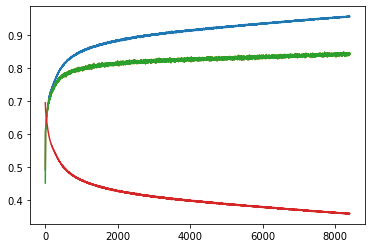

epoch: 0
train_acc: 0.9563055555555555
test_acc: 0.847
f1: 0.8470017435529537

epoch: 1
train_acc: 0.9556666666666667
test_acc: 0.8406666666666667
f1: 0.8406663283292014

epoch: 2
train_acc: 0.9551666666666667
test_acc: 0.839
f1: 0.8389991154935542

epoch: 3
train_acc: 0.9556944444444444
test_acc: 0.8398888888888889
f1: 0.8398806558905778

epoch: 4
train_acc: 0.9552777777777778
test_acc: 0.8416666666666667
f1: 0.8416579151813072

epoch: 5
train_acc: 0.956
test_acc: 0.8421111111111111
f1: 0.8421121617550937

epoch: 6
train_acc: 0.9548333333333333
test_acc: 0.8422222222222222
f1: 0.8422256505478298

epoch: 7
train_acc: 0.95575
test_acc: 0.836
f1: 0.8360035716333378

epoch: 8
train_acc: 0.9546944444444444
test_acc: 0.8427777777777777
f1: 0.842770857976887

epoch: 9
train_acc: 0.9549166666666666
test_acc: 0.8446666666666667
f1: 0.8446595480910772

epoch: 10
train_acc: 0.9560277777777778
test_acc: 0.842
f1: 0.8419862047740458

epoch: 11
train_acc: 0.9544166666666667
test_acc: 0.844666666666

epoch: 92
train_acc: 0.9566111111111111
test_acc: 0.8401111111111111
f1: 0.8401131541414776

epoch: 93
train_acc: 0.9556666666666667
test_acc: 0.8424444444444444
f1: 0.8424314116690845

epoch: 94
train_acc: 0.9569166666666666
test_acc: 0.8404444444444444
f1: 0.8404326646031065

epoch: 95
train_acc: 0.9565833333333333
test_acc: 0.8437777777777777
f1: 0.8437763582759704

epoch: 96
train_acc: 0.95725
test_acc: 0.8393333333333334
f1: 0.839336038896825

epoch: 97
train_acc: 0.9563333333333334
test_acc: 0.8431111111111111
f1: 0.8431141481994919

epoch: 98
train_acc: 0.9563611111111111
test_acc: 0.8447777777777777
f1: 0.84477881075188

epoch: 99
train_acc: 0.9561111111111111
test_acc: 0.8392222222222222
f1: 0.8392257058278308

epoch: 100
train_acc: 0.9566388888888889
test_acc: 0.8395555555555556
f1: 0.8395548583153629

epoch: 101
train_acc: 0.9578333333333333
test_acc: 0.8425555555555555
f1: 0.842553524324812

epoch: 102
train_acc: 0.9571944444444445
test_acc: 0.8436666666666667
f1: 0.8436580

epoch: 182
train_acc: 0.9563611111111111
test_acc: 0.8427777777777777
f1: 0.8427803457547219

epoch: 183
train_acc: 0.9565
test_acc: 0.837
f1: 0.8369974624268044

epoch: 184
train_acc: 0.9571111111111111
test_acc: 0.8421111111111111
f1: 0.8421086531073545

epoch: 185
train_acc: 0.9579722222222222
test_acc: 0.844
f1: 0.8439996687407244

epoch: 186
train_acc: 0.9565833333333333
test_acc: 0.8412222222222222
f1: 0.8412220556035646

epoch: 187
train_acc: 0.9577222222222223
test_acc: 0.8457777777777777
f1: 0.8457794228177394

epoch: 188
train_acc: 0.9565833333333333
test_acc: 0.8407777777777777
f1: 0.8407808031213498

epoch: 189
train_acc: 0.9568333333333333
test_acc: 0.8405555555555555
f1: 0.8405550417900663

epoch: 190
train_acc: 0.9581111111111111
test_acc: 0.839
f1: 0.839001834608766

epoch: 191
train_acc: 0.9575277777777778
test_acc: 0.8408888888888889
f1: 0.8408837972971265

epoch: 192
train_acc: 0.9571666666666667
test_acc: 0.8424444444444444
f1: 0.8424461250400248

epoch: 193
train_a

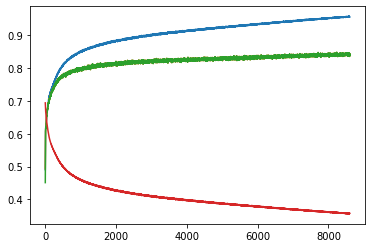

epoch: 0
train_acc: 0.9561111111111111
test_acc: 0.8451111111111111
f1: 0.8451045712853599

epoch: 1
train_acc: 0.9571944444444445
test_acc: 0.8437777777777777
f1: 0.8437792049949033

epoch: 2
train_acc: 0.9573888888888888
test_acc: 0.8406666666666667
f1: 0.8406693497773493

epoch: 3
train_acc: 0.9566666666666667
test_acc: 0.8415555555555555
f1: 0.8415558763566688

epoch: 4
train_acc: 0.9581388888888889
test_acc: 0.8441111111111111
f1: 0.8441082531402094

epoch: 5
train_acc: 0.9571944444444445
test_acc: 0.8454444444444444
f1: 0.8454424504839897

epoch: 6
train_acc: 0.9575833333333333
test_acc: 0.8448888888888889
f1: 0.8448839252980367

epoch: 7
train_acc: 0.9573333333333334
test_acc: 0.8424444444444444
f1: 0.8424383444567333

epoch: 8
train_acc: 0.9582777777777778
test_acc: 0.8428888888888889
f1: 0.8428833414626192

epoch: 9
train_acc: 0.9575833333333333
test_acc: 0.8436666666666667
f1: 0.843667706959477

epoch: 10
train_acc: 0.9570277777777778
test_acc: 0.8418888888888889
f1: 0.841891

epoch: 92
train_acc: 0.9570833333333333
test_acc: 0.8437777777777777
f1: 0.8437802464868139

epoch: 93
train_acc: 0.9573888888888888
test_acc: 0.844
f1: 0.8440003158518674

epoch: 94
train_acc: 0.95875
test_acc: 0.8456666666666667
f1: 0.8456697058130875

epoch: 95
train_acc: 0.9565555555555556
test_acc: 0.8482222222222222
f1: 0.8482255201748841

epoch: 96
train_acc: 0.9574722222222222
test_acc: 0.8455555555555555
f1: 0.8455434742242544

epoch: 97
train_acc: 0.9578333333333333
test_acc: 0.8412222222222222
f1: 0.8412240315085759

epoch: 98
train_acc: 0.9583611111111111
test_acc: 0.8455555555555555
f1: 0.8455246786939977

epoch: 99
train_acc: 0.9585
test_acc: 0.8396666666666667
f1: 0.8396687153760611

epoch: 100
train_acc: 0.9586388888888889
test_acc: 0.8406666666666667
f1: 0.8406691845391829

epoch: 101
train_acc: 0.9587777777777777
test_acc: 0.841
f1: 0.8409946508846519

epoch: 102
train_acc: 0.9581666666666667
test_acc: 0.845
f1: 0.8449987810486453

epoch: 103
train_acc: 0.958583333333

epoch: 183
train_acc: 0.9584444444444444
test_acc: 0.8404444444444444
f1: 0.840443380740268

epoch: 184
train_acc: 0.9580555555555555
test_acc: 0.8425555555555555
f1: 0.842558127162149

epoch: 185
train_acc: 0.9590555555555556
test_acc: 0.8446666666666667
f1: 0.8446606527154534

epoch: 186
train_acc: 0.9589444444444445
test_acc: 0.8424444444444444
f1: 0.8424453547658368

epoch: 187
train_acc: 0.9585277777777778
test_acc: 0.84
f1: 0.8399812889303636

epoch: 188
train_acc: 0.9585
test_acc: 0.8478888888888889
f1: 0.8478847480638753

epoch: 189
train_acc: 0.9593888888888888
test_acc: 0.8431111111111111
f1: 0.8431107779643182

epoch: 190
train_acc: 0.9581111111111111
test_acc: 0.8413333333333334
f1: 0.8413365929647824

epoch: 191
train_acc: 0.9586944444444444
test_acc: 0.8463333333333334
f1: 0.846336662861016

epoch: 192
train_acc: 0.9590833333333333
test_acc: 0.8455555555555555
f1: 0.8455583013566034

epoch: 193
train_acc: 0.9586666666666667
test_acc: 0.8435555555555555
f1: 0.8435576569394

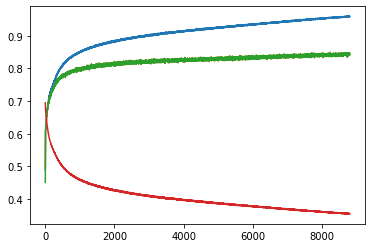

epoch: 0
train_acc: 0.9585277777777778
test_acc: 0.844
f1: 0.8439993220739401

epoch: 1
train_acc: 0.9591666666666666
test_acc: 0.8436666666666667
f1: 0.8436688649913825

epoch: 2
train_acc: 0.9586944444444444
test_acc: 0.845
f1: 0.8449962551067666

epoch: 3
train_acc: 0.9590277777777778
test_acc: 0.842
f1: 0.8420016853363295

epoch: 4
train_acc: 0.958
test_acc: 0.8412222222222222
f1: 0.841221349924285

epoch: 5
train_acc: 0.9585833333333333
test_acc: 0.8428888888888889
f1: 0.84289056474372

epoch: 6
train_acc: 0.9589722222222222
test_acc: 0.8427777777777777
f1: 0.8427753301526435

epoch: 7
train_acc: 0.9596666666666667
test_acc: 0.8422222222222222
f1: 0.8422231338275655

epoch: 8
train_acc: 0.9588333333333333
test_acc: 0.8437777777777777
f1: 0.8437717294119654

epoch: 9
train_acc: 0.9584722222222222
test_acc: 0.8431111111111111
f1: 0.843100202230348

epoch: 10
train_acc: 0.9583333333333334
test_acc: 0.8428888888888889
f1: 0.8428838612975816

epoch: 11
train_acc: 0.9586666666666667
tes

epoch: 92
train_acc: 0.9600277777777778
test_acc: 0.84
f1: 0.8399968394961842

epoch: 93
train_acc: 0.9585277777777778
test_acc: 0.8423333333333334
f1: 0.842326393971168

epoch: 94
train_acc: 0.9593611111111111
test_acc: 0.8413333333333334
f1: 0.84133189162026

epoch: 95
train_acc: 0.9594722222222222
test_acc: 0.8453333333333334
f1: 0.8453336464856122

epoch: 96
train_acc: 0.9589444444444445
test_acc: 0.8404444444444444
f1: 0.8404463748743557

epoch: 97
train_acc: 0.9605
test_acc: 0.8491111111111111
f1: 0.8491129366848016

epoch: 98
train_acc: 0.9596666666666667
test_acc: 0.843
f1: 0.8429913222113593

epoch: 99
train_acc: 0.9602777777777778
test_acc: 0.844
f1: 0.8439916798668778

epoch: 100
train_acc: 0.9596388888888889
test_acc: 0.842
f1: 0.8419933288147646

epoch: 101
train_acc: 0.9601944444444445
test_acc: 0.8406666666666667
f1: 0.8406604978497569

epoch: 102
train_acc: 0.9595555555555556
test_acc: 0.8421111111111111
f1: 0.8421112728984932

epoch: 103
train_acc: 0.9587222222222223
t

epoch: 183
train_acc: 0.9605277777777778
test_acc: 0.8446666666666667
f1: 0.8446611820118402

epoch: 184
train_acc: 0.96
test_acc: 0.8382222222222222
f1: 0.838214209114721

epoch: 185
train_acc: 0.9593055555555555
test_acc: 0.8435555555555555
f1: 0.843554512592129

epoch: 186
train_acc: 0.9607222222222223
test_acc: 0.8431111111111111
f1: 0.8431139002667476

epoch: 187
train_acc: 0.9593055555555555
test_acc: 0.8448888888888889
f1: 0.8448907655463791

epoch: 188
train_acc: 0.9598333333333333
test_acc: 0.8438888888888889
f1: 0.8438893572222742

epoch: 189
train_acc: 0.9604444444444444
test_acc: 0.8411111111111111
f1: 0.8411079725552383

epoch: 190
train_acc: 0.9605277777777778
test_acc: 0.8454444444444444
f1: 0.8454242995196297

epoch: 191
train_acc: 0.9600833333333333
test_acc: 0.8465555555555555
f1: 0.8465355554540682

epoch: 192
train_acc: 0.9601666666666666
test_acc: 0.8375555555555556
f1: 0.8375508787319996

epoch: 193
train_acc: 0.9593888888888888
test_acc: 0.843
f1: 0.8429987653202

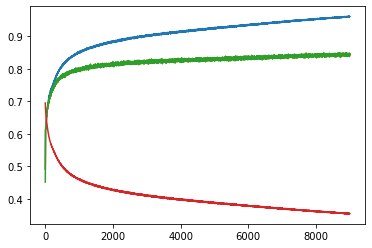

epoch: 0
train_acc: 0.9610555555555556
test_acc: 0.842
f1: 0.8420029416530335

epoch: 1
train_acc: 0.9596388888888889
test_acc: 0.8446666666666667
f1: 0.8446689450114132

epoch: 2
train_acc: 0.9600833333333333
test_acc: 0.8444444444444444
f1: 0.8444463264791767

epoch: 3
train_acc: 0.9594166666666667
test_acc: 0.8436666666666667
f1: 0.8436654372297089

epoch: 4
train_acc: 0.9597777777777777
test_acc: 0.8425555555555555
f1: 0.8425507719344653

epoch: 5
train_acc: 0.9603333333333334
test_acc: 0.8461111111111111
f1: 0.8461082898069778

epoch: 6
train_acc: 0.96
test_acc: 0.8432222222222222
f1: 0.8432153219826061

epoch: 7
train_acc: 0.9596388888888889
test_acc: 0.8436666666666667
f1: 0.8436682164920272

epoch: 8
train_acc: 0.9602222222222222
test_acc: 0.8478888888888889
f1: 0.847890622208006

epoch: 9
train_acc: 0.9601111111111111
test_acc: 0.8468888888888889
f1: 0.8468888888888889

epoch: 10
train_acc: 0.9595
test_acc: 0.8458888888888889
f1: 0.8458919235774617

epoch: 11
train_acc: 0.9605

epoch: 93
train_acc: 0.9602777777777778
test_acc: 0.8448888888888889
f1: 0.8448817804972415

epoch: 94
train_acc: 0.96075
test_acc: 0.8422222222222222
f1: 0.842215560419807

epoch: 95
train_acc: 0.9606944444444444
test_acc: 0.8441111111111111
f1: 0.8441109475240036

epoch: 96
train_acc: 0.9601111111111111
test_acc: 0.8443333333333334
f1: 0.8443346305568528

epoch: 97
train_acc: 0.9610277777777778
test_acc: 0.844
f1: 0.8439993220739401

epoch: 98
train_acc: 0.9606111111111111
test_acc: 0.8476666666666667
f1: 0.8476620383360282

epoch: 99
train_acc: 0.9598333333333333
test_acc: 0.8423333333333334
f1: 0.8423299911773758

epoch: 100
train_acc: 0.9605
test_acc: 0.8445555555555555
f1: 0.8445492667069955

epoch: 101
train_acc: 0.9604444444444444
test_acc: 0.8444444444444444
f1: 0.844447709237266

epoch: 102
train_acc: 0.9610833333333333
test_acc: 0.8421111111111111
f1: 0.8421121617550937

epoch: 103
train_acc: 0.9612777777777778
test_acc: 0.8432222222222222
f1: 0.8432252010268093

epoch: 104


epoch: 183
train_acc: 0.9610277777777778
test_acc: 0.8461111111111111
f1: 0.8461121351377938

epoch: 184
train_acc: 0.9622222222222222
test_acc: 0.8444444444444444
f1: 0.8444404499116867

epoch: 185
train_acc: 0.9613888888888888
test_acc: 0.8412222222222222
f1: 0.8412072357846286

epoch: 186
train_acc: 0.962
test_acc: 0.8425555555555555
f1: 0.842558127162149

epoch: 187
train_acc: 0.9611944444444445
test_acc: 0.8461111111111111
f1: 0.8461137766360639

epoch: 188
train_acc: 0.9605833333333333
test_acc: 0.8432222222222222
f1: 0.8432244267966174

epoch: 189
train_acc: 0.9613611111111111
test_acc: 0.8451111111111111
f1: 0.8451034392210997

epoch: 190
train_acc: 0.9608888888888889
test_acc: 0.8414444444444444
f1: 0.8414287115788138

epoch: 191
train_acc: 0.9613888888888888
test_acc: 0.8432222222222222
f1: 0.8432000376749066

epoch: 192
train_acc: 0.9621944444444445
test_acc: 0.841
f1: 0.8409899396060306

epoch: 193
train_acc: 0.9621111111111111
test_acc: 0.8454444444444444
f1: 0.84544284736

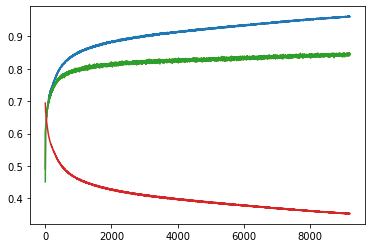

epoch: 0
train_acc: 0.9618333333333333
test_acc: 0.8471111111111111
f1: 0.8471122587224431

epoch: 1
train_acc: 0.9605555555555556
test_acc: 0.8411111111111111
f1: 0.841107030981223

epoch: 2
train_acc: 0.9618611111111111
test_acc: 0.8461111111111111
f1: 0.8461121351377938

epoch: 3
train_acc: 0.9613333333333334
test_acc: 0.8453333333333334
f1: 0.845330713540986

epoch: 4
train_acc: 0.9609722222222222
test_acc: 0.8428888888888889
f1: 0.8428862276917773

epoch: 5
train_acc: 0.9616666666666667
test_acc: 0.8458888888888889
f1: 0.845887296405815

epoch: 6
train_acc: 0.9607777777777777
test_acc: 0.8458888888888889
f1: 0.8458869006623249

epoch: 7
train_acc: 0.9606666666666667
test_acc: 0.8432222222222222
f1: 0.8432158794307153

epoch: 8
train_acc: 0.9620277777777778
test_acc: 0.8444444444444444
f1: 0.844441809595819

epoch: 9
train_acc: 0.9619444444444445
test_acc: 0.8418888888888889
f1: 0.841892096044909

epoch: 10
train_acc: 0.9618888888888889
test_acc: 0.8412222222222222
f1: 0.8412178999

epoch: 91
train_acc: 0.9615277777777778
test_acc: 0.8445555555555555
f1: 0.8445444150918588

epoch: 92
train_acc: 0.9619444444444445
test_acc: 0.843
f1: 0.8429913222113593

epoch: 93
train_acc: 0.9625277777777778
test_acc: 0.8438888888888889
f1: 0.843892286792242

epoch: 94
train_acc: 0.9620555555555556
test_acc: 0.8425555555555555
f1: 0.8425584227226686

epoch: 95
train_acc: 0.9621666666666666
test_acc: 0.8447777777777777
f1: 0.8447811563336386

epoch: 96
train_acc: 0.9619166666666666
test_acc: 0.8461111111111111
f1: 0.8461144150284056

epoch: 97
train_acc: 0.9629444444444445
test_acc: 0.8437777777777777
f1: 0.8437722617372296

epoch: 98
train_acc: 0.9624722222222222
test_acc: 0.8412222222222222
f1: 0.841211517219284

epoch: 99
train_acc: 0.9627222222222223
test_acc: 0.8447777777777777
f1: 0.8447782434444961

epoch: 100
train_acc: 0.9621111111111111
test_acc: 0.8427777777777777
f1: 0.8427719605032001

epoch: 101
train_acc: 0.96175
test_acc: 0.8454444444444444
f1: 0.8454442822565137

e

epoch: 182
train_acc: 0.9626666666666667
test_acc: 0.8428888888888889
f1: 0.8428909993413288

epoch: 183
train_acc: 0.9638055555555556
test_acc: 0.8433333333333334
f1: 0.8433354378156106

epoch: 184
train_acc: 0.9626666666666667
test_acc: 0.8442222222222222
f1: 0.8442204144284952

epoch: 185
train_acc: 0.9618055555555556
test_acc: 0.8475555555555555
f1: 0.8475429455641634

epoch: 186
train_acc: 0.96275
test_acc: 0.8445555555555555
f1: 0.8445385806262368

epoch: 187
train_acc: 0.9616111111111111
test_acc: 0.8474444444444444
f1: 0.8474347918092802

epoch: 188
train_acc: 0.963
test_acc: 0.8418888888888889
f1: 0.8418904563384183

epoch: 189
train_acc: 0.9626944444444444
test_acc: 0.8428888888888889
f1: 0.8428897966423786

epoch: 190
train_acc: 0.9628333333333333
test_acc: 0.8396666666666667
f1: 0.8396699981440144

epoch: 191
train_acc: 0.9625277777777778
test_acc: 0.8446666666666667
f1: 0.8446631457636943

epoch: 192
train_acc: 0.9619722222222222
test_acc: 0.8458888888888889
f1: 0.84587717

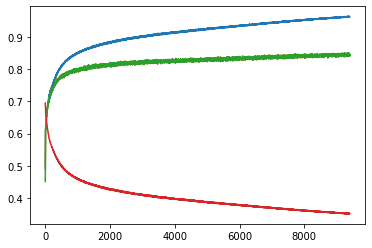

epoch: 0
train_acc: 0.9615
test_acc: 0.8445555555555555
f1: 0.8445487139997632

epoch: 1
train_acc: 0.9622222222222222
test_acc: 0.8444444444444444
f1: 0.8444399659540353

epoch: 2
train_acc: 0.9626666666666667
test_acc: 0.845
f1: 0.845003052192184

epoch: 3
train_acc: 0.9638888888888889
test_acc: 0.8448888888888889
f1: 0.8448882148256556

epoch: 4
train_acc: 0.96275
test_acc: 0.8437777777777777
f1: 0.8437811491799795

epoch: 5
train_acc: 0.9635
test_acc: 0.8448888888888889
f1: 0.8448892029410306

epoch: 6
train_acc: 0.9632777777777778
test_acc: 0.8443333333333334
f1: 0.8443363986532254

epoch: 7
train_acc: 0.9626944444444444
test_acc: 0.8481111111111111
f1: 0.8481130519189714

epoch: 8
train_acc: 0.9630555555555556
test_acc: 0.8472222222222222
f1: 0.8472255023185344

epoch: 9
train_acc: 0.9632777777777778
test_acc: 0.8461111111111111
f1: 0.8461121351377938

epoch: 10
train_acc: 0.9635833333333333
test_acc: 0.8431111111111111
f1: 0.8431060906309655

epoch: 11
train_acc: 0.9629722222222

epoch: 92
train_acc: 0.9640555555555556
test_acc: 0.8453333333333334
f1: 0.845332302221764

epoch: 93
train_acc: 0.9641388888888889
test_acc: 0.8415555555555555
f1: 0.8415509938931816

epoch: 94
train_acc: 0.9630555555555556
test_acc: 0.8484444444444444
f1: 0.8484466672681505

epoch: 95
train_acc: 0.9621944444444445
test_acc: 0.8442222222222222
f1: 0.8442233915180707

epoch: 96
train_acc: 0.9639722222222222
test_acc: 0.848
f1: 0.8479969975213748

epoch: 97
train_acc: 0.9639444444444445
test_acc: 0.8403333333333334
f1: 0.8403367140302517

epoch: 98
train_acc: 0.9643333333333334
test_acc: 0.8452222222222222
f1: 0.845225438203731

epoch: 99
train_acc: 0.9632777777777778
test_acc: 0.8426666666666667
f1: 0.8426640017054855

epoch: 100
train_acc: 0.9638055555555556
test_acc: 0.844
f1: 0.8439973576232357

epoch: 101
train_acc: 0.96375
test_acc: 0.845
f1: 0.8450019805610571

epoch: 102
train_acc: 0.9635
test_acc: 0.8428888888888889
f1: 0.842888206134296

epoch: 103
train_acc: 0.963055555555555

epoch: 183
train_acc: 0.9633333333333334
test_acc: 0.8451111111111111
f1: 0.845112985188816

epoch: 184
train_acc: 0.9636666666666667
test_acc: 0.8434444444444444
f1: 0.8434420069198738

epoch: 185
train_acc: 0.9650833333333333
test_acc: 0.8458888888888889
f1: 0.8458919235774617

epoch: 186
train_acc: 0.9636666666666667
test_acc: 0.8444444444444444
f1: 0.8444441141289274

epoch: 187
train_acc: 0.9635277777777778
test_acc: 0.8437777777777777
f1: 0.8437763582759704

epoch: 188
train_acc: 0.9637222222222223
test_acc: 0.8441111111111111
f1: 0.844110254684235

epoch: 189
train_acc: 0.9644444444444444
test_acc: 0.8482222222222222
f1: 0.8482135351318277

epoch: 190
train_acc: 0.9647222222222223
test_acc: 0.8468888888888889
f1: 0.8468913084344449

epoch: 191
train_acc: 0.9642222222222222
test_acc: 0.8443333333333334
f1: 0.8443351071683101

epoch: 192
train_acc: 0.9641666666666666
test_acc: 0.842
f1: 0.8419973237466105

epoch: 193
train_acc: 0.9639444444444445
test_acc: 0.8472222222222222
f1: 0

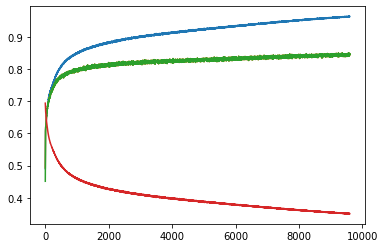

epoch: 0
train_acc: 0.9635
test_acc: 0.8443333333333334
f1: 0.8443355222835301

epoch: 1
train_acc: 0.9639444444444445
test_acc: 0.8406666666666667
f1: 0.8406635193316166

epoch: 2
train_acc: 0.964
test_acc: 0.8467777777777777
f1: 0.846769308796507

epoch: 3
train_acc: 0.964
test_acc: 0.845
f1: 0.8449882177650994

epoch: 4
train_acc: 0.9643055555555555
test_acc: 0.8435555555555555
f1: 0.8435555555555555

epoch: 5
train_acc: 0.9643055555555555
test_acc: 0.8472222222222222
f1: 0.8472189836990077

epoch: 6
train_acc: 0.9636111111111111
test_acc: 0.844
f1: 0.8440000000000001

epoch: 7
train_acc: 0.9632222222222222
test_acc: 0.8454444444444444
f1: 0.845446205618215

epoch: 8
train_acc: 0.9638055555555556
test_acc: 0.8443333333333334
f1: 0.8443295723330323

epoch: 9
train_acc: 0.9632222222222222
test_acc: 0.842
f1: 0.8419989466661985

epoch: 10
train_acc: 0.9633888888888889
test_acc: 0.8446666666666667
f1: 0.8446595480910772

epoch: 11
train_acc: 0.9633611111111111
test_acc: 0.84777777777777

epoch: 92
train_acc: 0.9631944444444445
test_acc: 0.8485555555555555
f1: 0.8485584331154222

epoch: 93
train_acc: 0.9645
test_acc: 0.8436666666666667
f1: 0.843662889559298

epoch: 94
train_acc: 0.9642777777777778
test_acc: 0.8461111111111111
f1: 0.8461078490350006

epoch: 95
train_acc: 0.9642777777777778
test_acc: 0.8403333333333334
f1: 0.8403294756906262

epoch: 96
train_acc: 0.9645277777777778
test_acc: 0.8451111111111111
f1: 0.8451071336977796

epoch: 97
train_acc: 0.9644166666666667
test_acc: 0.8482222222222222
f1: 0.8482253403290566

epoch: 98
train_acc: 0.9644166666666667
test_acc: 0.8432222222222222
f1: 0.8432247829398676

epoch: 99
train_acc: 0.9640555555555556
test_acc: 0.8433333333333334
f1: 0.8433326525101537

epoch: 100
train_acc: 0.96425
test_acc: 0.8454444444444444
f1: 0.8454160550879131

epoch: 101
train_acc: 0.9645277777777778
test_acc: 0.8447777777777777
f1: 0.8447592172143135

epoch: 102
train_acc: 0.9643333333333334
test_acc: 0.8423333333333334
f1: 0.8423184517693407

epoch: 184
train_acc: 0.9644166666666667
test_acc: 0.8461111111111111
f1: 0.8461118615571589

epoch: 185
train_acc: 0.9648055555555556
test_acc: 0.8497777777777777
f1: 0.8497806858114116

epoch: 186
train_acc: 0.9650277777777778
test_acc: 0.8454444444444444
f1: 0.8454475794788956

epoch: 187
train_acc: 0.9646666666666667
test_acc: 0.8447777777777777
f1: 0.8447725557553171

epoch: 188
train_acc: 0.9646111111111111
test_acc: 0.8436666666666667
f1: 0.843660341856142

epoch: 189
train_acc: 0.9655
test_acc: 0.8436666666666667
f1: 0.8436674290331572

epoch: 190
train_acc: 0.9645
test_acc: 0.8447777777777777
f1: 0.8447744874381918

epoch: 191
train_acc: 0.9660277777777778
test_acc: 0.8474444444444444
f1: 0.8474446007668057

epoch: 192
train_acc: 0.9649166666666666
test_acc: 0.8477777777777777
f1: 0.8477801832766252

epoch: 193
train_acc: 0.9649166666666666
test_acc: 0.8432222222222222
f1: 0.8432235287050102

epoch: 194
train_acc: 0.9646388888888889
test_acc: 0.8458888888888889
f1: 0.845884693

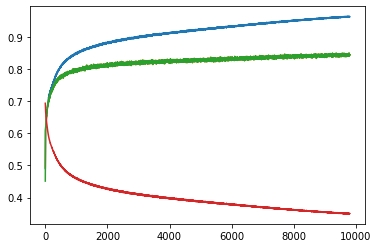

epoch: 0
train_acc: 0.96525
test_acc: 0.846
f1: 0.8459973914998609

epoch: 1
train_acc: 0.9649166666666666
test_acc: 0.844
f1: 0.8439989599995378

epoch: 2
train_acc: 0.9648055555555556
test_acc: 0.8402222222222222
f1: 0.8402211570365636

epoch: 3
train_acc: 0.9651388888888889
test_acc: 0.849
f1: 0.848981138868301

epoch: 4
train_acc: 0.9653611111111111
test_acc: 0.8474444444444444
f1: 0.8474270014045503

epoch: 5
train_acc: 0.9648888888888889
test_acc: 0.843
f1: 0.8429998352469116

epoch: 6
train_acc: 0.9644444444444444
test_acc: 0.8431111111111111
f1: 0.8431075549487383

epoch: 7
train_acc: 0.9653611111111111
test_acc: 0.8437777777777777
f1: 0.8437682113885376

epoch: 8
train_acc: 0.9651944444444445
test_acc: 0.8426666666666667
f1: 0.842664429033059

epoch: 9
train_acc: 0.9649166666666666
test_acc: 0.8416666666666667
f1: 0.8416591193429748

epoch: 10
train_acc: 0.9641666666666666
test_acc: 0.8493333333333334
f1: 0.8493360118708994

epoch: 11
train_acc: 0.9649444444444445
test_acc: 0.

epoch: 92
train_acc: 0.9656388888888889
test_acc: 0.8457777777777777
f1: 0.8457796436807837

epoch: 93
train_acc: 0.9652777777777778
test_acc: 0.847
f1: 0.8469984189984191

epoch: 94
train_acc: 0.9658888888888889
test_acc: 0.8477777777777777
f1: 0.847774770909564

epoch: 95
train_acc: 0.9655277777777778
test_acc: 0.8448888888888889
f1: 0.8448834120804926

epoch: 96
train_acc: 0.9653333333333334
test_acc: 0.8478888888888889
f1: 0.8478737954810062

epoch: 97
train_acc: 0.9652222222222222
test_acc: 0.8452222222222222
f1: 0.8452148443822906

epoch: 98
train_acc: 0.9649444444444445
test_acc: 0.847
f1: 0.8469909388298513

epoch: 99
train_acc: 0.9647222222222223
test_acc: 0.8413333333333334
f1: 0.8413358406708181

epoch: 100
train_acc: 0.9650833333333333
test_acc: 0.8474444444444444
f1: 0.847445715742012

epoch: 101
train_acc: 0.9658333333333333
test_acc: 0.8452222222222222
f1: 0.8452255910973493

epoch: 102
train_acc: 0.9655555555555555
test_acc: 0.8473333333333334
f1: 0.847328938014889

epo

epoch: 183
train_acc: 0.9658055555555556
test_acc: 0.847
f1: 0.8469943389490505

epoch: 184
train_acc: 0.9664166666666667
test_acc: 0.8433333333333334
f1: 0.8433333333333334

epoch: 185
train_acc: 0.9660555555555556
test_acc: 0.846
f1: 0.845998973332877

epoch: 186
train_acc: 0.9662777777777778
test_acc: 0.8473333333333334
f1: 0.8473365374942882

epoch: 187
train_acc: 0.9667222222222223
test_acc: 0.8505555555555555
f1: 0.8505562843280713

epoch: 188
train_acc: 0.9661944444444445
test_acc: 0.8451111111111111
f1: 0.8451071336977796

epoch: 189
train_acc: 0.9667777777777777
test_acc: 0.8478888888888889
f1: 0.847885664497412

epoch: 190
train_acc: 0.9663611111111111
test_acc: 0.8492222222222222
f1: 0.849223940347892

epoch: 191
train_acc: 0.9657222222222223
test_acc: 0.8463333333333334
f1: 0.8463242326809618

epoch: 192
train_acc: 0.9663611111111111
test_acc: 0.845
f1: 0.8450023632821377

epoch: 193
train_acc: 0.9658055555555556
test_acc: 0.8497777777777777
f1: 0.8497660267274764

epoch: 1

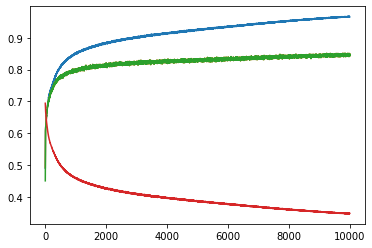

In [13]:
for i in range(50):
    for epoch in range(epochs):
        y_pred = net.forward(X_train)

        train_pred = y_pred.cpu().detach().numpy()
        train_pred = [np.argmax(sample) for sample in train_pred]
        train_accuracy = accuracy_score(y_train.cpu(), train_pred)
        train_accuracies.append(train_accuracy)

        test_pred = net.predict(X_test)
        test_accuracy = accuracy_score(y_test.cpu(), test_pred)
        test_accuracies.append(test_accuracy)
        
        f1 = f1_score(y_test.cpu(), test_pred, average='weighted')
        f1s.append(f1)

        loss = criterion(y_pred, y_train)
        losses.append(loss)
        
        print("epoch:", epoch)
        print("train_acc:", train_accuracy)
        print("test_acc:", test_accuracy)
        print("f1:", f1)
        print()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    plt.plot(train_accuracies)
    plt.plot(test_accuracies)
    plt.plot(f1s)
    plt.plot(losses)
    plt.show()
    
    torch.save(net.state_dict(), 'torch_01_dict.dict')

In [14]:
from sklearn.metrics import confusion_matrix
test_pred = net.predict(X_test)
confusion_matrix(y_test.cpu(), test_pred)

array([[3820,  722],
       [ 636, 3822]])